In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### This file contains all models tuned with Gridsearch CV and all of them are giving better results in terms of MAPE, RMSE, and R2.

### Note that Linear Regression model was already tune to its optimum hyperparameters so no changes have been made there.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [3]:
color=sns.palettes

In [4]:
#from google.colab import files
#uploaded = files.upload()
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone_Healthcare/Data.csv")

In [5]:
#import io
#df=pd.read_csv(io.BytesIO(uploaded['Data.csv']))

In [6]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [7]:
df.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

In [8]:
df.shape

(25000, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [10]:
df.isna().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports', 'Occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'Gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'Year_last_admitted',
       'Location', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [13]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [14]:
df.columns=df.columns.str.lower()

occupation:
Student     10169
Business    10020
Salried      4811

cholesterol_level:
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054

gender:
Male      16422
Female     8578

smoking_status:
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867

location:
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589

covered_by_any_other_company:
N    17418
Y     7582

alcohol:
Rare     13752
No        8541
Daily     2707

exercise:
Moderate    14638
Extreme      5248
No           5114

In [15]:
for c in df.columns:
    if df[c].dtype=='object':
        print(f"{c}:\n{df[c].value_counts(normalize=True)}\n")

occupation:
Student     0.40676
Business    0.40080
Salried     0.19244
Name: occupation, dtype: float64

cholesterol_level:
150 to 175    0.35052
125 to 150    0.33356
200 to 225    0.11852
175 to 200    0.11524
225 to 250    0.08216
Name: cholesterol_level, dtype: float64

gender:
Male      0.65688
Female    0.34312
Name: gender, dtype: float64

smoking_status:
never smoked       0.36996
Unknown            0.30220
formerly smoked    0.17316
smokes             0.15468
Name: smoking_status, dtype: float64

location:
Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: location, dtype: float64

covered_by_any_other_company:
N    0.69672
Y    0.30328
Name: covered_by_any_other_company, dtype: fl

In [16]:
df['occupation']=np.where(df['occupation']=='Salried','Salaried',df['occupation'])
df.rename(columns={'regular_checkup_lasy_year':'regular_checkup_last_year'},inplace=True)

In [17]:
df.occupation.value_counts()

Student     10169
Business    10020
Salaried     4811
Name: occupation, dtype: int64

In [18]:
df.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_last_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_last_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

In [19]:
df.drop(['applicant_id'],axis=1,inplace=True)

In [20]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [21]:
df_num_temp=df_num.drop(['adventure_sports','heart_decs_history','other_major_decs_history'],axis=1)

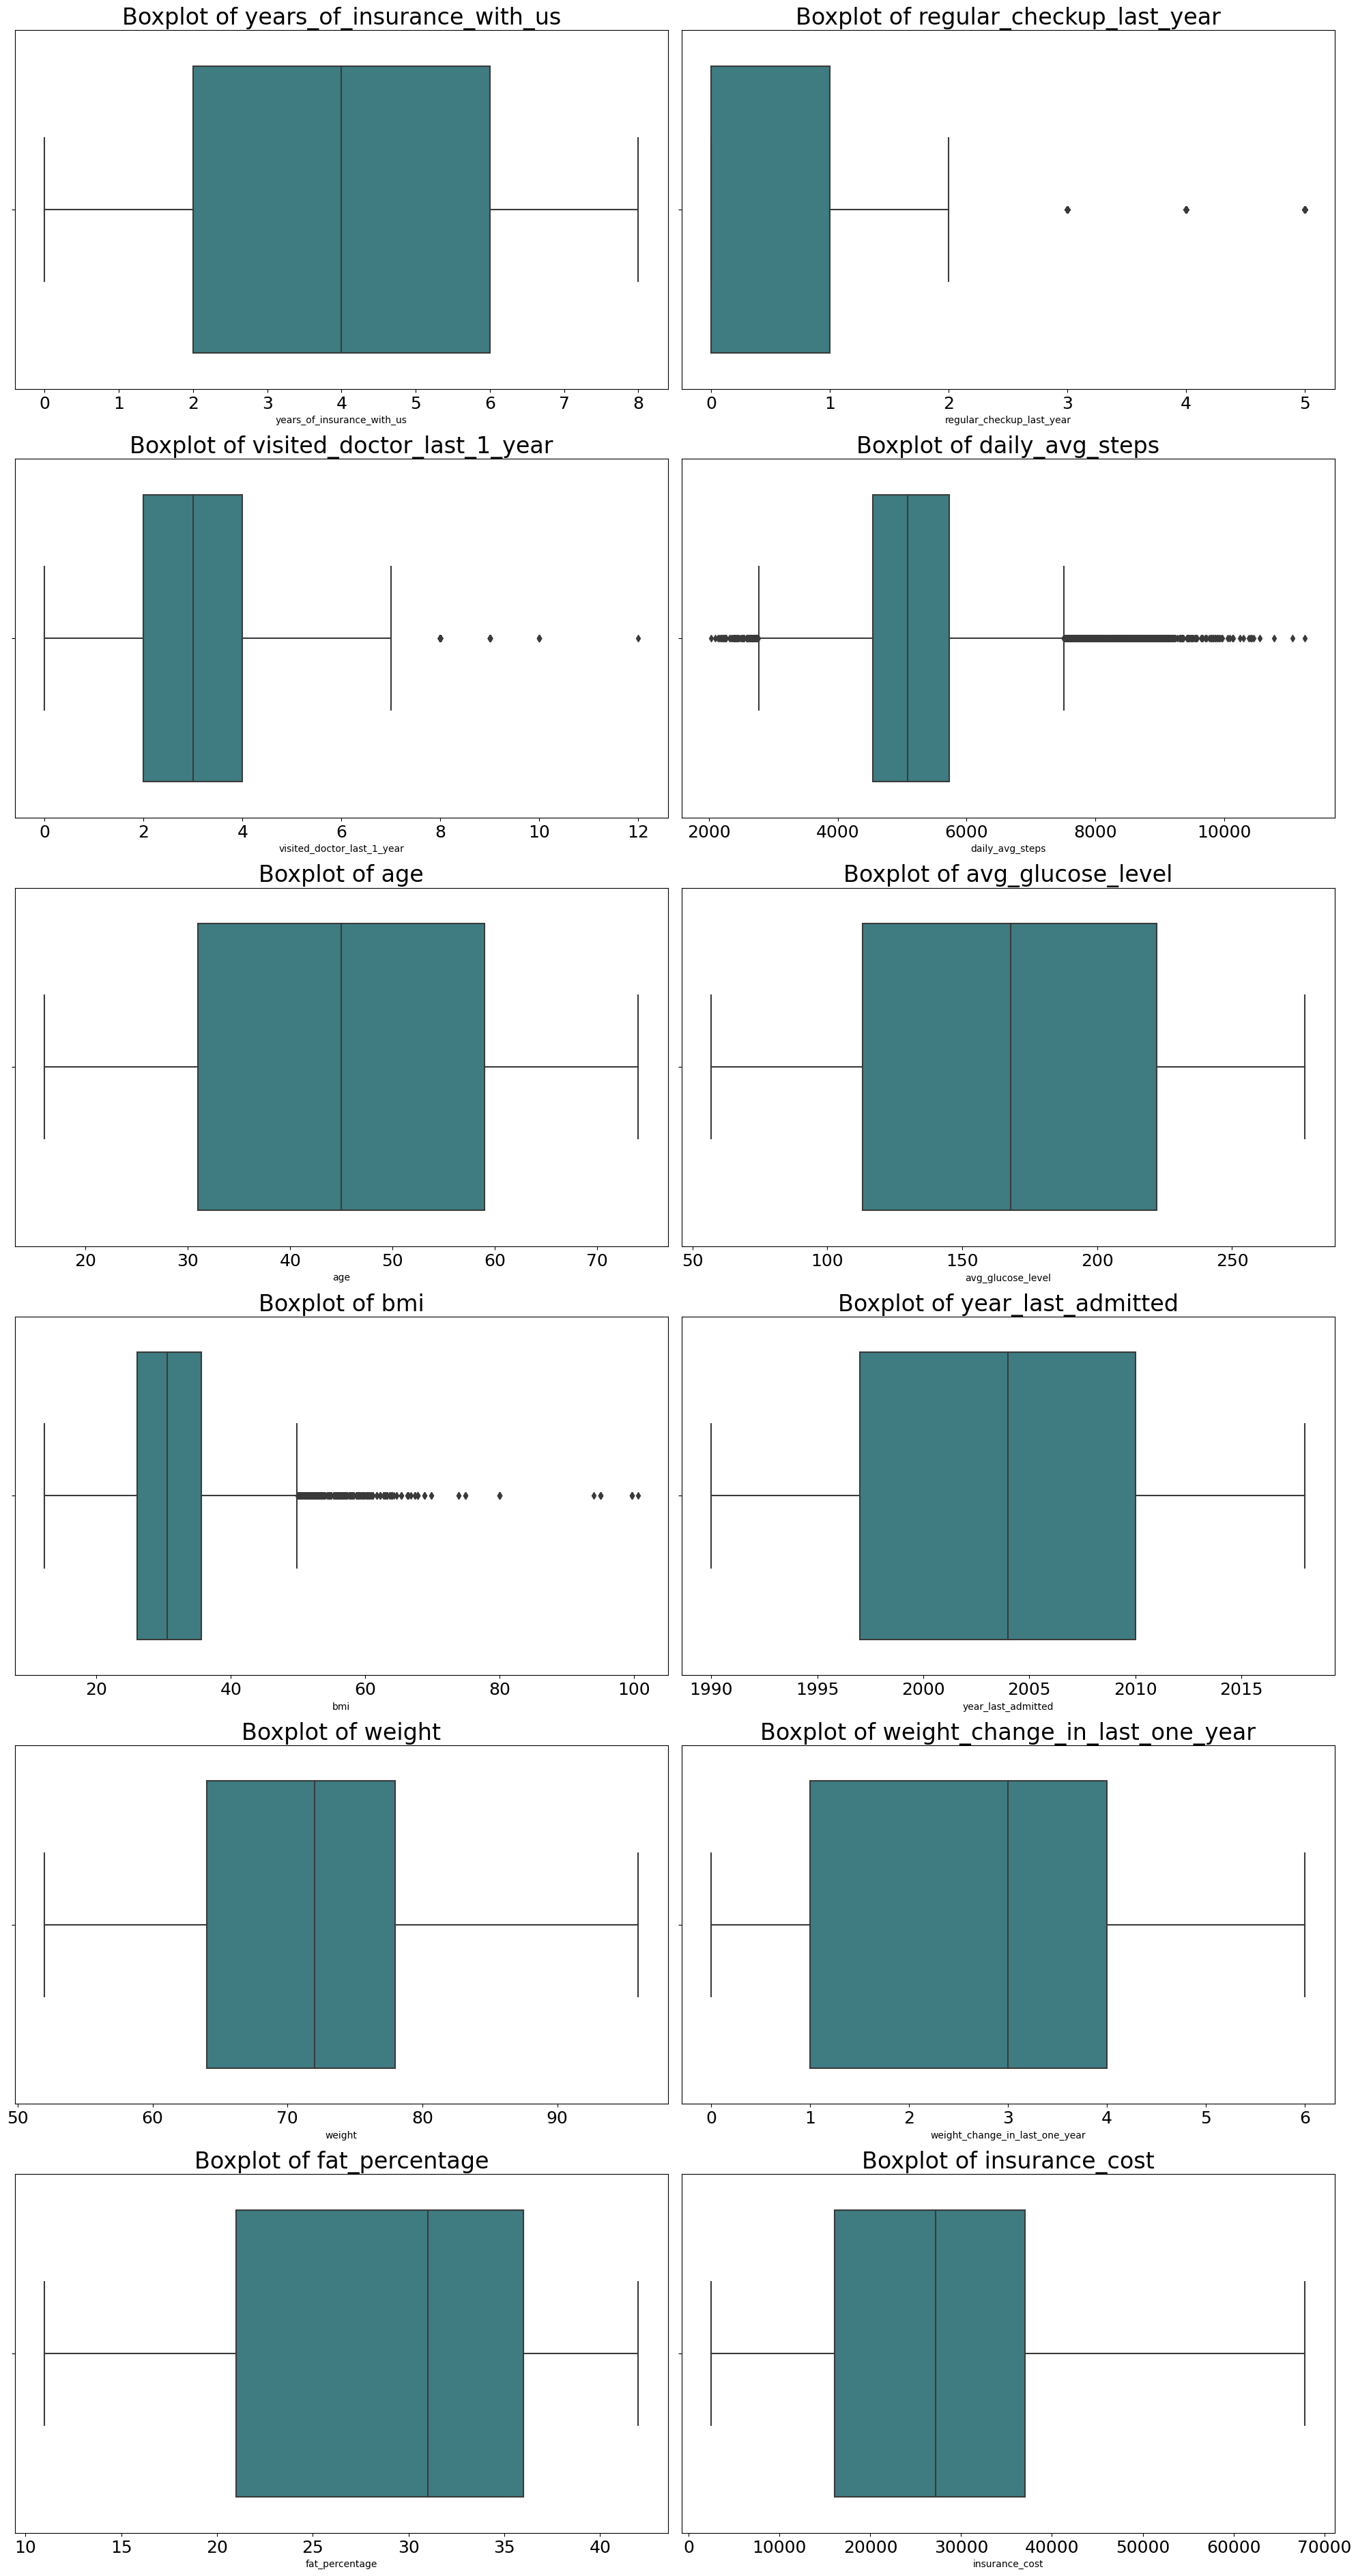

In [22]:
plt.figure(figsize=(20,75))
features_temp=df_num_temp.columns
for f in range(0,len(features_temp)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num_temp,x=df_num_temp.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num_temp.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

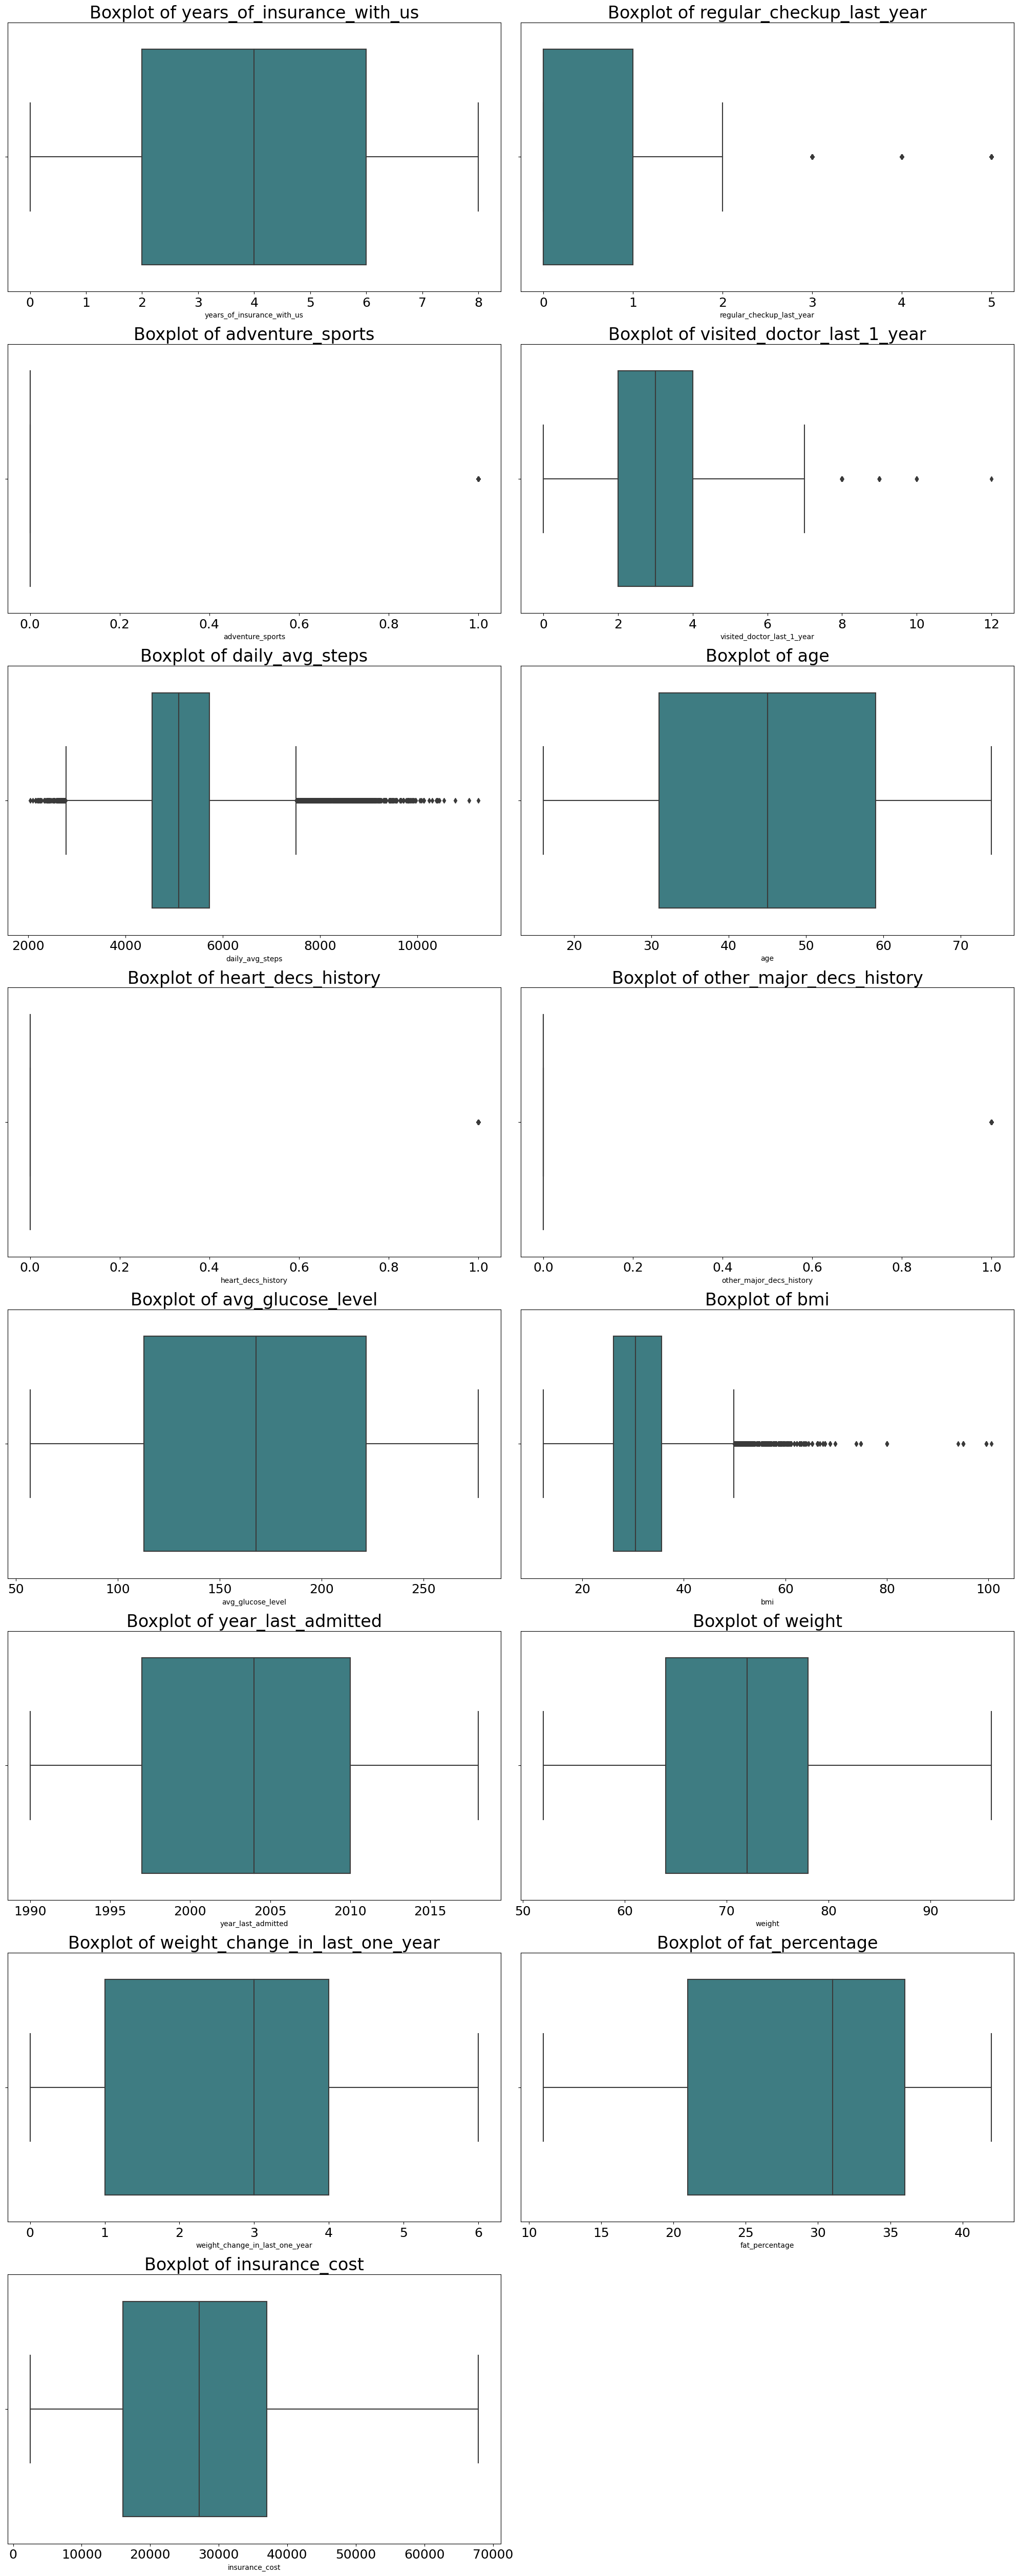

In [23]:
plt.figure(figsize=(20,75))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num,x=df_num.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

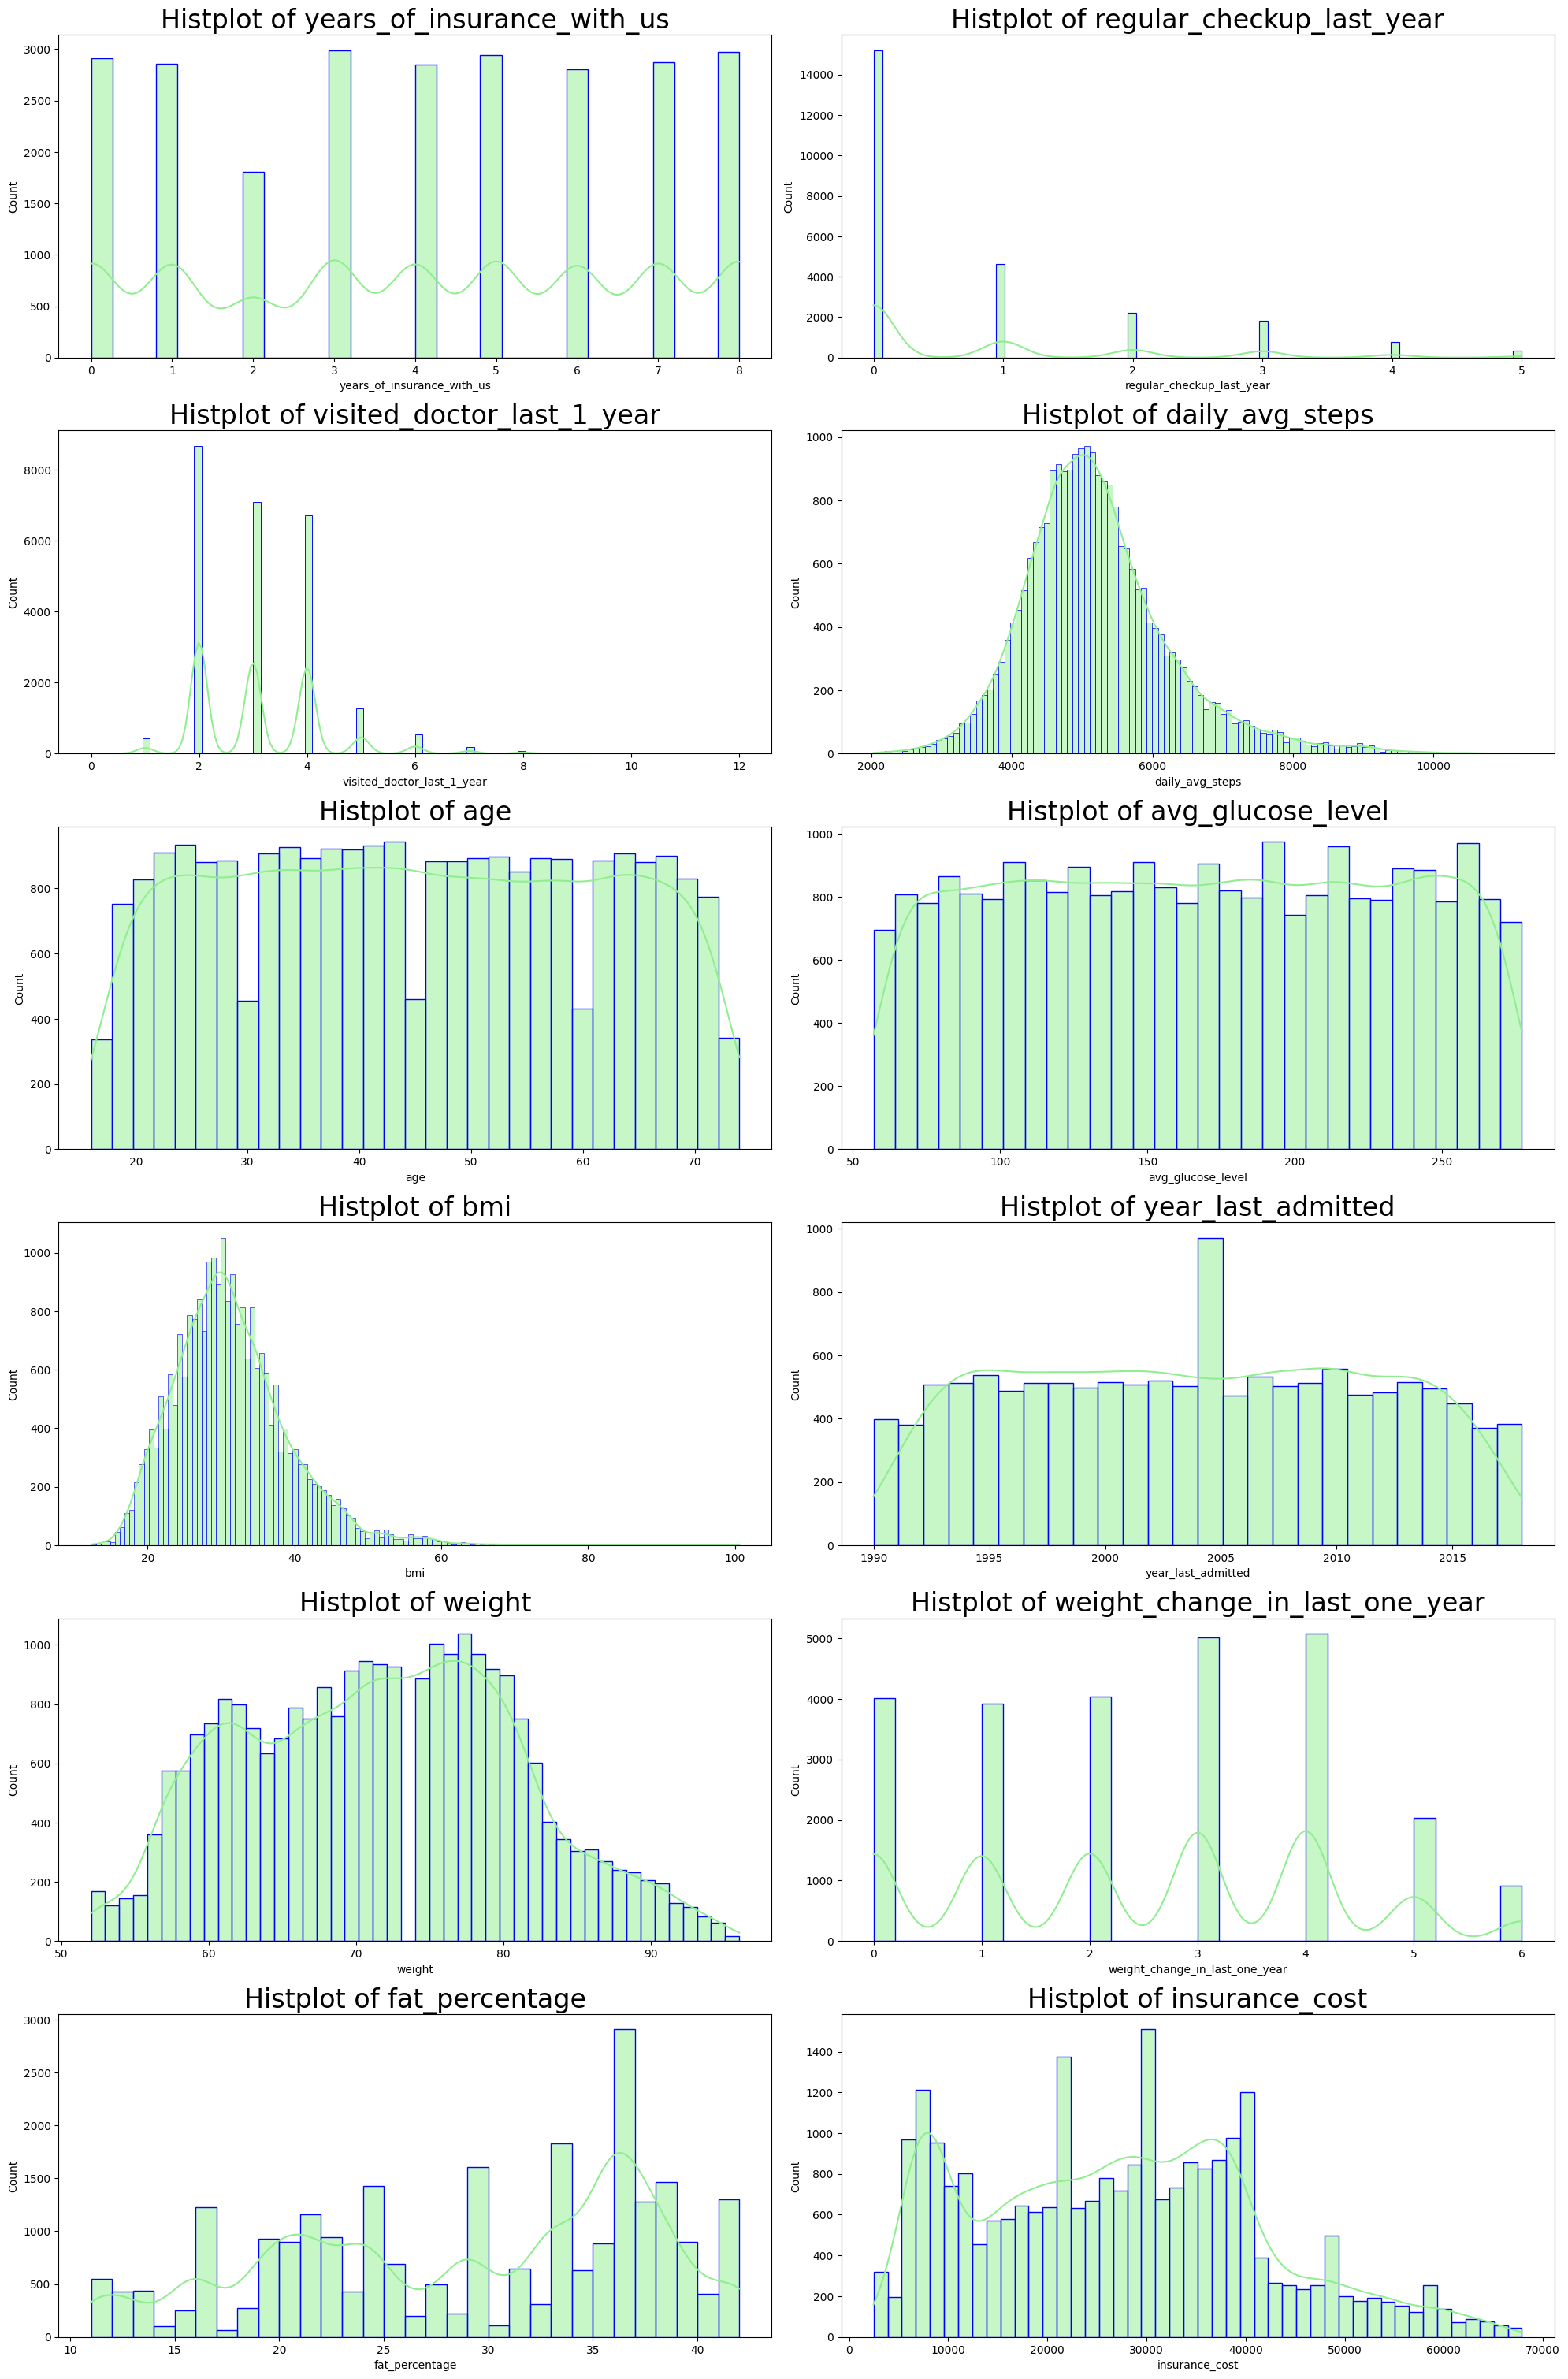

In [24]:
plt.figure(figsize=(20,60))
features_temp=df_num_temp.columns
for f in range(0,len(features_temp)):
    plt.subplot(12,2,f+1)
    sns.histplot(data=df_num_temp,x=df_num_temp.columns[f],kde=True,color='lightgreen',edgecolor='blue')
    plt.title(f"Histplot of {df_num_temp.columns[f]}",fontsize=24)
    plt.tight_layout();

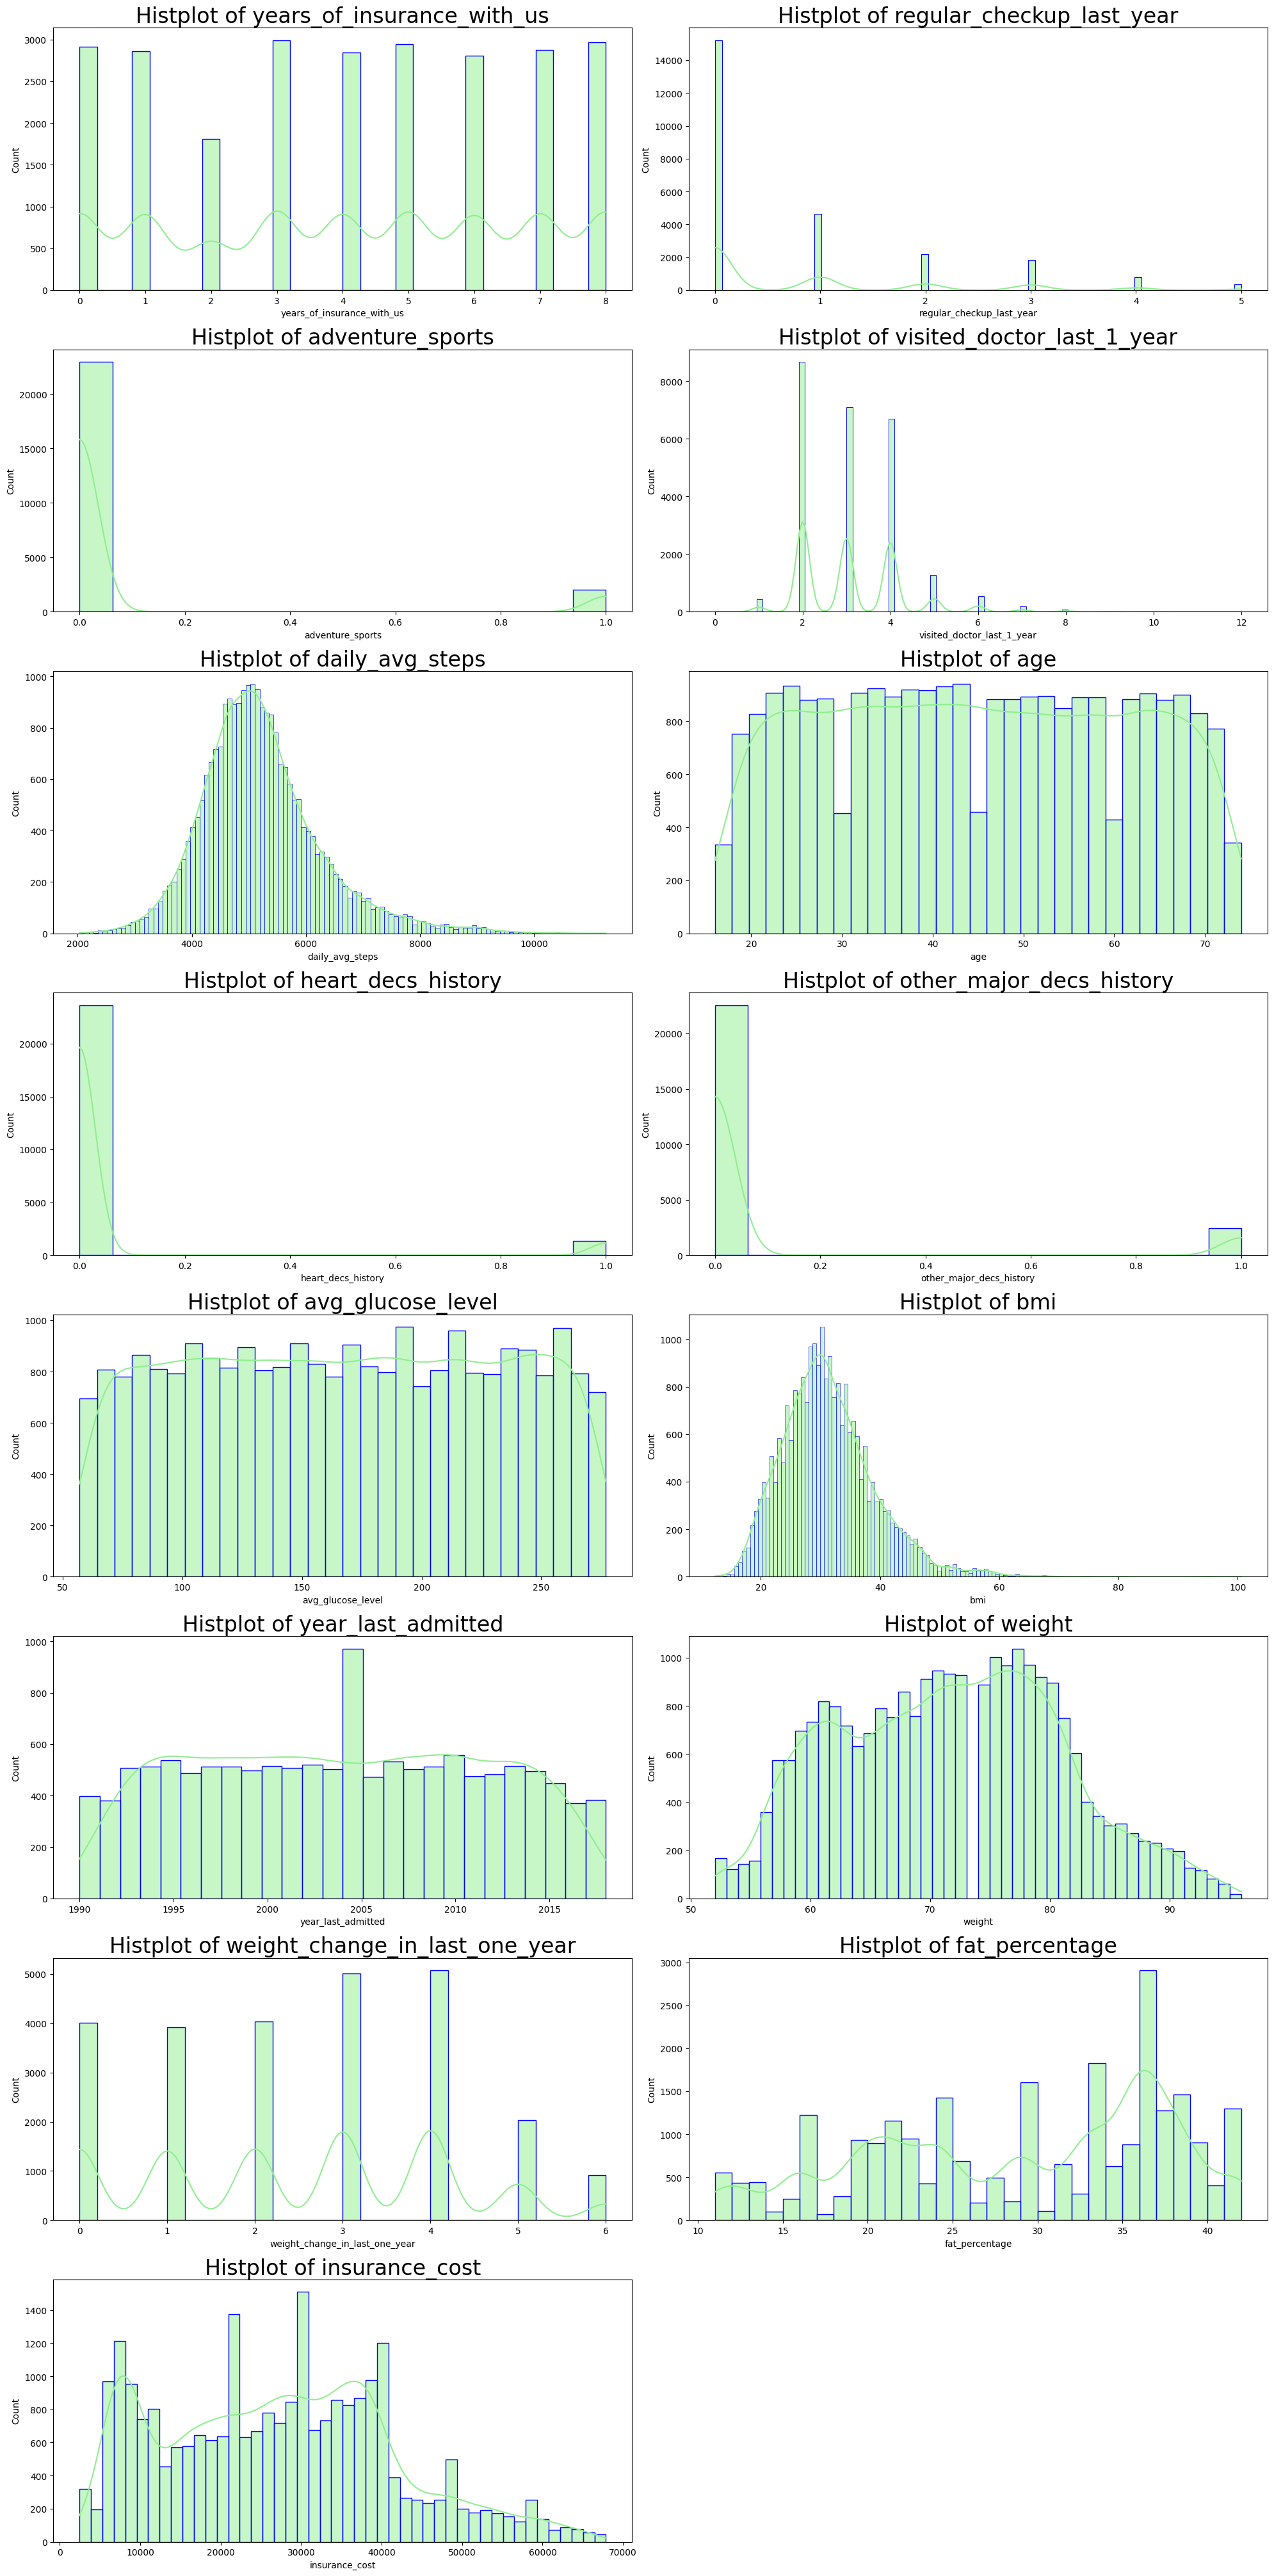

In [25]:
plt.figure(figsize=(20,60))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.histplot(data=df_num,x=df_num.columns[f],kde=True,color='lightgreen',edgecolor='blue')
    plt.title(f"Histplot of {df_num.columns[f]}",fontsize=24)
    plt.tight_layout();

In [26]:
df_cat.head()

occupation cholesterol_level  gender   smoking_status   location  \
0   Salaried        125 to 150    Male          Unknown    Chennai   
1    Student        150 to 175    Male  formerly smoked     Jaipur   
2   Business        200 to 225  Female  formerly smoked     Jaipur   
3   Business        175 to 200  Female          Unknown    Chennai   
4    Student        150 to 175    Male     never smoked  Bangalore   

  covered_by_any_other_company alcohol  exercise  
0                            N    Rare  Moderate  
1                            N    Rare  Moderate  
2                            N   Daily   Extreme  
3                            Y    Rare        No  
4                            N      No   Extreme

In [27]:
df_cat.describe().T

count unique           top   freq
occupation                    25000      3       Student  10169
cholesterol_level             25000      5    150 to 175   8763
gender                        25000      2          Male  16422
smoking_status                25000      4  never smoked   9249
location                      25000     15     Bangalore   1742
covered_by_any_other_company  25000      2             N  17418
alcohol                       25000      3          Rare  13752
exercise                      25000      3      Moderate  14638

In [28]:
df_num.head()

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
0                           3                          1                 1   
1                           0                          0                 0   
2                           1                          0                 0   
3                           7                          4                 0   
4                           3                          1                 0   

   visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
0                           2             4866   28                   1   
1                           4             6411   50                   0   
2                           4             4509   68                   0   
3                           2             6214   51                   0   
4                           2             4938   44                   0   

   other_major_decs_history  avg_glucose_level   bmi  year_last_admitted  \
0                         0                 97  31.2                 NaN   
1                         0                212  34.2                 NaN   
2                         0                166  40.4                 NaN   
3                         0                109  22.9                 NaN   
4                         1                118  26.5              2004.0   

   weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  
0      67                               1              25           20978  
1      58                               3              27            6170  
2      73                               0              32           28382  
3      71                               3              37           27148  
4      74                               0              34           29616

In [29]:
df_num.describe().T

count          mean           std     min  \
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_last_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                    25%      50%      75%      max  
years_of_insurance_with_us          2.0      4.0      6.0      8.0  
regular_checkup_last_year           0.0      0.0      1.0      5.0  
adventure_sports                    0.0      0.0      0.0      1.0  
visited_doctor_last_1_year          2.0      3.0      4.0     12.0  
daily_avg_steps                  4543.0   5089.0   5730.0  11255.0  
age                                31.0     45.0     59.0     74.0  
heart_decs_history                  0.0      0.0      0.0      1.0  
other_major_decs_history            0.0      0.0      0.0      1.0  
avg_glucose_level                 113.0    168.0    222.0    277.0  
bmi                                26.1     30.5     35.6    100.6  
year_last_admitted               1997.0   2004.0   2010.0   2018.0  
weight                             64.0     72.0     78.0     96.0  
weight_change_in_last_one_year      1.0      3.0      4.0      6.0  
fat_percentage                     21.0     31.0     36.0     42.0  
insurance_cost                  16042.0  27148.0  37020.0  67870.0

1. Problem Understanding <br>
a) Defining problem statement <br>
b) Need of the study/project <br>
c) Understanding business/social opportunity
- 4 marks

2. Data Report <br>
a) Understanding how data was collected in terms of time, frequency and methodology <br>
b) Visual inspection of data (rows, columns, descriptive details) <br>
c) Understanding of attributes (variable info, renaming if required) <br>
- 2 marks

3. Exploratory Data Analysis <br>
a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones) <br>
b) Bivariate analysis (relationship between different variables, correlations) <br>
c) Removal of unwanted variables (if applicable) b) Missing Value treatment (if applicable) <br>
d) Outlier treatment (if required) <br>
e) Variable transformation (if applicable) f) Addition of new variables (if required) <br>
- 10 marks

4. Business insights from EDA <br>
a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business <br>
b) Any business insights using clustering (if applicable) <br>
c) Any other business insights <br>
- 4 marks

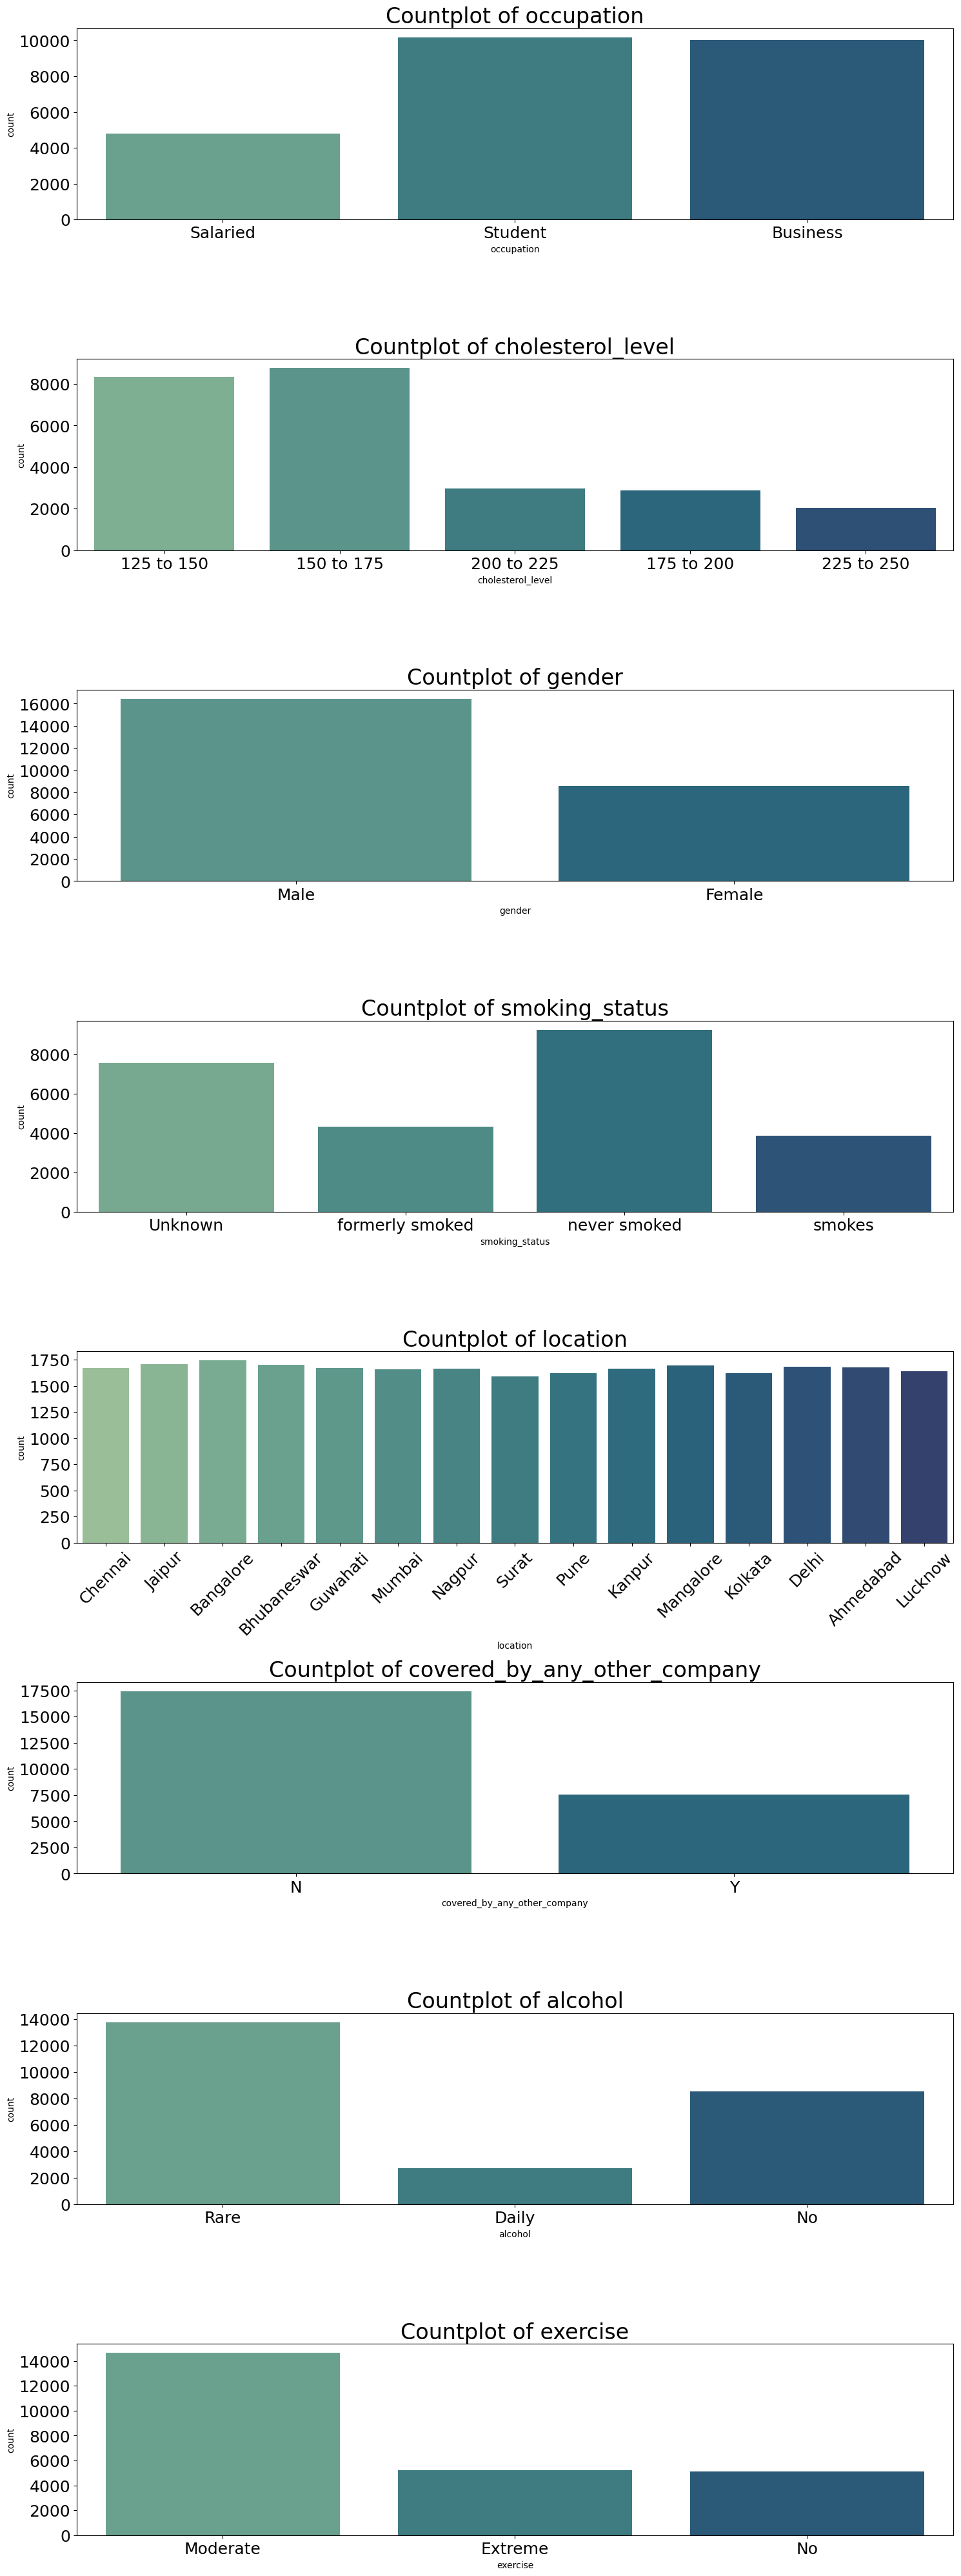

In [30]:
### df_cat EDA
plt.figure(figsize=(15,60))
for f in range(0,len(df_cat.columns)):
    plt.subplot(12,1,f+1)
    sns.countplot(data=df_cat,x=df_cat.columns[f],palette='crest')
    plt.title(f"Countplot of {df_cat.columns[f]}",fontsize=24)
    if df_cat.columns[f]=='location':
        plt.xticks(rotation=45,fontsize=18)
        plt.yticks(fontsize=18)
    else:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plt.tight_layout();

In [31]:
#sns.pairplot(data=df_num);

In [32]:
### typo in column name found and corrected
#df_num.rename(columns={'regular_checkup_lasy_year':'regular_checkup_last_year'},inplace=True)

In [33]:
df_num.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'year_last_admitted', 'weight',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [34]:
#df_num.drop(['applicant_id'],axis=1,inplace=True)

In [35]:
sns.pairplot(data=df_num[['years_of_insurance_with_us','regular_checkup_last_year',
                          'daily_avg_steps','age','avg_glucose_level','bmi',
                          'weight','weight_change_in_last_one_year','fat_percentage',
                          'insurance_cost']]);

Output hidden; open in https://colab.research.google.com to view.

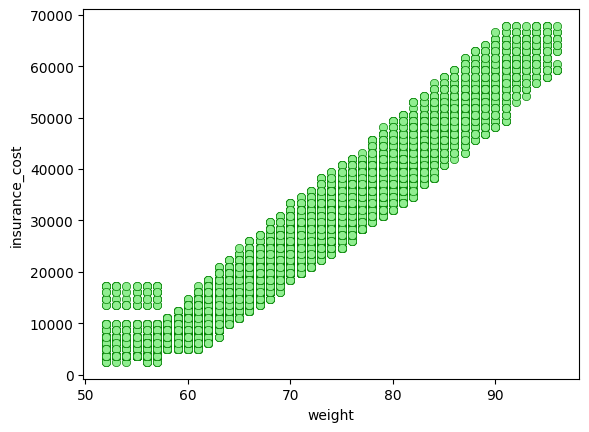

In [36]:
sns.scatterplot(data=df_num,x=df_num.weight,y=df_num.insurance_cost,color='lightgreen',edgecolor='g');

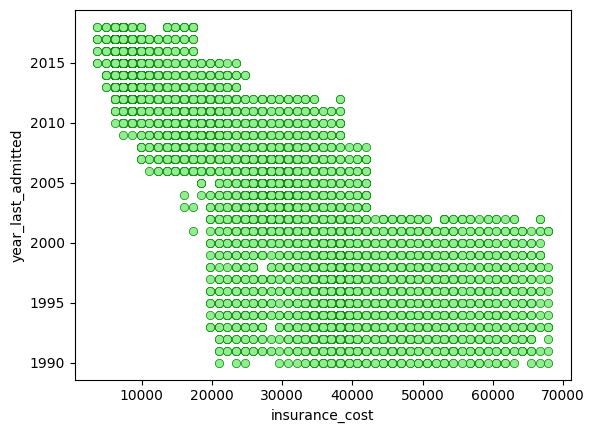

In [37]:
sns.scatterplot(data=df_num,x=df_num.insurance_cost,y=df_num.year_last_admitted,color='lightgreen',edgecolor='g');

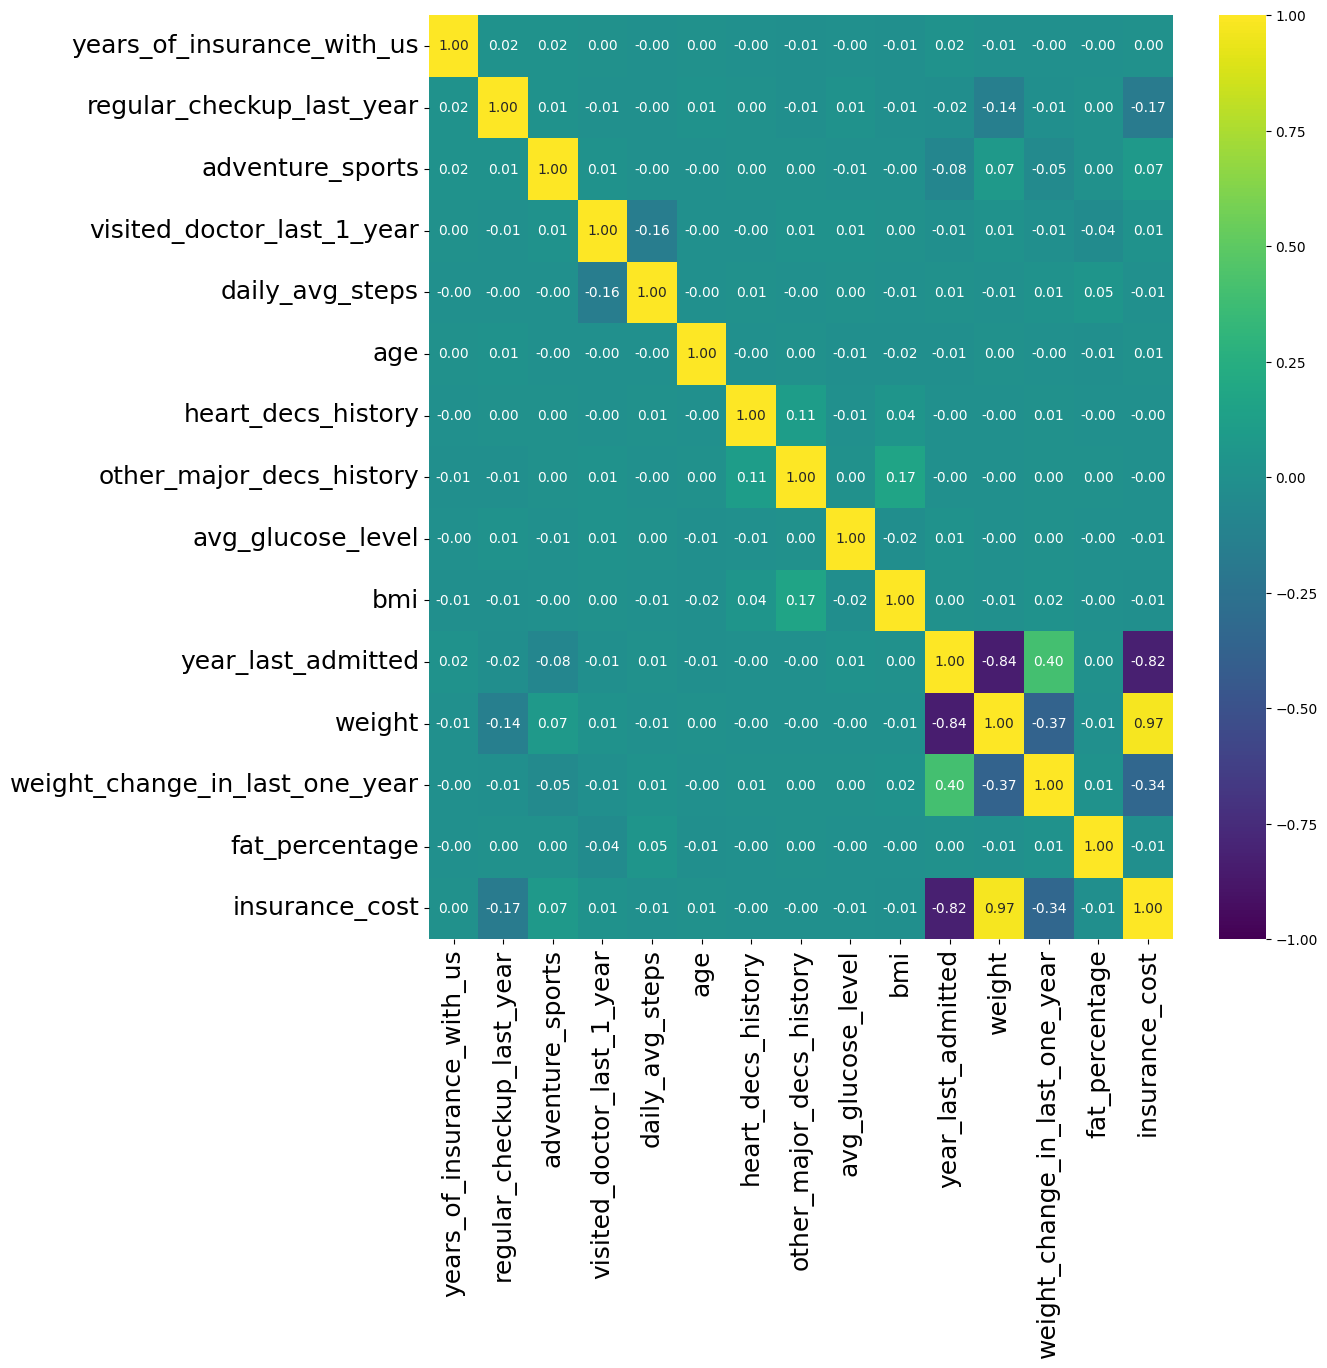

In [38]:
corr=df_num.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data=corr,annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='viridis')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [39]:
#df.rename(columns={"regular_checkup_lasy_year":"regular_checkup_last_year"},inplace=True)

In [40]:
df.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'year_last_admitted', 'location', 'weight',
       'covered_by_any_other_company', 'alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [41]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_last_year             0
adventure_sports                      0
occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
year_last_admitted                11881
location                              0
weight                                0
covered_by_any_other_company          0
alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [42]:
#df.drop(['applicant_id'],axis=1,inplace=True)

In [43]:
df.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'year_last_admitted', 'location', 'weight',
       'covered_by_any_other_company', 'alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [44]:
df.shape

(25000, 23)

In [45]:
(990/25000)*100

3.9600000000000004

In [46]:
(11881/25000)*100

47.524

In [47]:
# dropped because there were too many missing values to treat
df.drop(['year_last_admitted'],axis=1,inplace=True)

In [48]:
df.bmi=df.bmi.fillna(df.bmi.median())

In [49]:
df.isna().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
location                          0
weight                            0
covered_by_any_other_company      0
alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [50]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

In [51]:
df_num=pd.DataFrame(df_num)

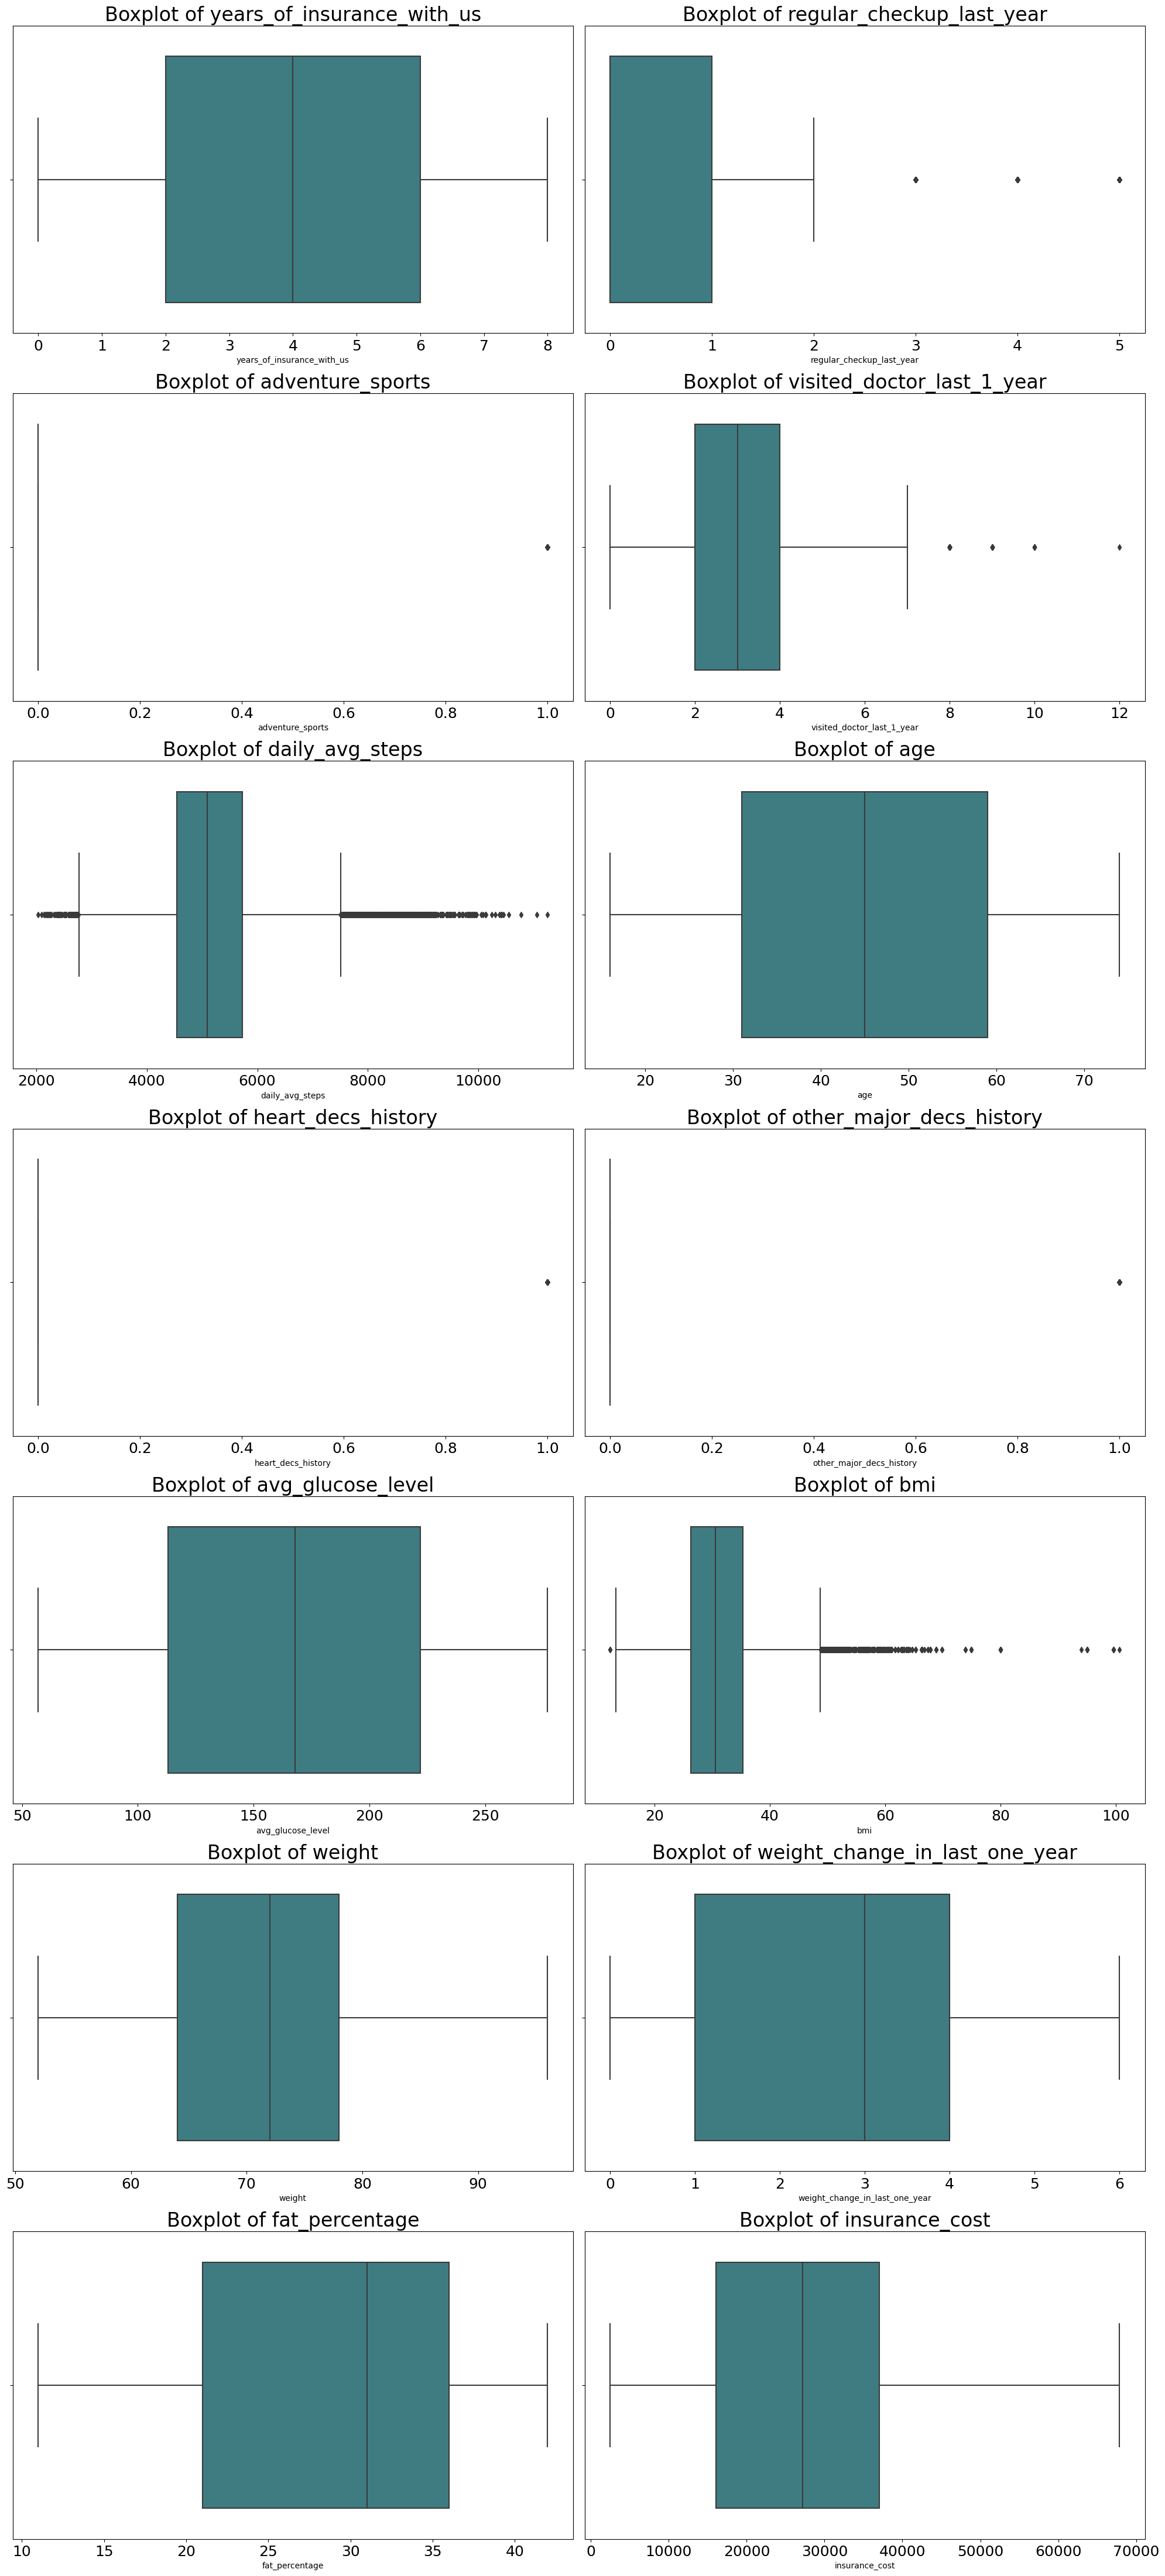

In [52]:
plt.figure(figsize=(20,75))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num,x=df_num.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

In [53]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    upperrange=Q3+(1.5*IQR)
    lowerrange=Q1-(1.5*IQR)
    return upperrange,lowerrange

In [54]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [55]:
### UNIVARIATE
((df_num > UL) | (df_num < LL)).sum()

years_of_insurance_with_us           0
regular_checkup_last_year         2943
adventure_sports                  2043
visited_doctor_last_1_year          96
daily_avg_steps                    952
age                                  0
heart_decs_history                1366
other_major_decs_history          2454
avg_glucose_level                    0
bmi                                624
weight                               0
weight_change_in_last_one_year       0
fat_percentage                       0
insurance_cost                       0
dtype: int64

In [56]:
df_num[df_num.regular_checkup_last_year<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [57]:
df_num[df_num.visited_doctor_last_1_year<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [58]:
df_num[df_num.daily_avg_steps<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [59]:
df_num[df_num.bmi<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [60]:
df_num[df_num.bmi==100.6]

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
7389                           5                          0                 0   

      visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
7389                           4             5101   38                   0   

      other_major_decs_history  avg_glucose_level    bmi  weight  \
7389                         1                165  100.6      95   

      weight_change_in_last_one_year  fat_percentage  insurance_cost  
7389                               2              35           57998

In [61]:
df_num[df_num.bmi>75]

years_of_insurance_with_us  regular_checkup_last_year  \
430                             3                          0   
1757                            4                          0   
2859                            4                          0   
3513                            4                          0   
6084                            6                          0   
7389                            5                          0   
8385                            1                          0   
9376                            2                          0   
11127                           3                          2   
15398                           4                          0   
20244                           3                          1   
22150                           8                          0   
23924                           5                          1   
24327                           6                          3   
24902                           0                          0   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
430                   0                           4             4159   18   
1757                  0                           2             6210   27   
2859                  0                           3             4600   59   
3513                  1                           1             4360   39   
6084                  0                           2             6027   26   
7389                  0                           4             5101   38   
8385                  0                           2             4962   22   
9376                  0                           4             5278   59   
11127                 0                           5             4639   66   
15398                 0                           4             5576   38   
20244                 0                           2             6560   18   
22150                 0                           3             5091   28   
23924                 0                           4             5116   59   
24327                 0                           2             5313   44   
24902                 0                           2             5357   67   

       heart_decs_history  other_major_decs_history  avg_glucose_level    bmi  \
430                     0                         1                253   99.6   
1757                    0                         1                 99   80.0   
2859                    0                         1                 94   95.0   
3513                    0                         1                132   95.0   
6084                    0                         1                 73   94.0   
7389                    0                         1                165  100.6   
8385                    0                         1                155   99.6   
9376                    0                         1                 77   80.0   
11127                   0                         1                208   99.6   
15398                   0                         1                232   80.0   
20244                   0                         1                212   99.6   
22150                   0                         1                140   80.0   
23924                   0                         1                 97   80.0   
24327                   0                         1                101   95.0   
24902                   0                         1                145   95.0   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  
430        69                               2              24           25914  
1757       75                               1              18           34552  
2859       72                               1              20           29616  
3513       65                               5              39           22212  
6084       87                               4       

In [62]:
df.daily_avg_steps.max()

11255

In [63]:
ur,lr=remove_outlier(df_num.bmi)
df_num.bmi=np.where(df_num.bmi>ur,ur,df_num.bmi)
df_num.bmi=np.where(df_num.bmi<lr,lr,df_num.bmi)

In [64]:
ur,lr

(48.79999999999999, 12.800000000000006)

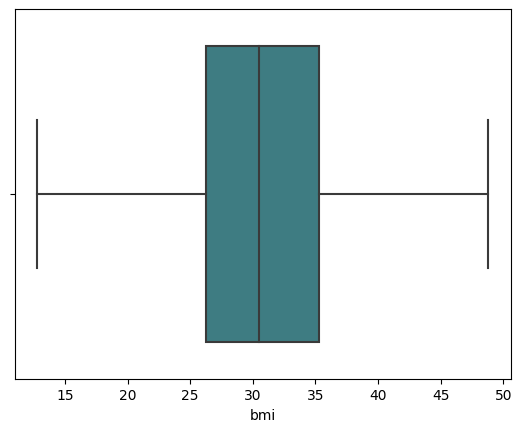

In [65]:
sns.boxplot(data=df_num,x=df_num.bmi,palette='crest');

In [66]:
((df_num > UL) | (df_num < LL)).sum()

years_of_insurance_with_us           0
regular_checkup_last_year         2943
adventure_sports                  2043
visited_doctor_last_1_year          96
daily_avg_steps                    952
age                                  0
heart_decs_history                1366
other_major_decs_history          2454
avg_glucose_level                    0
bmi                                  0
weight                               0
weight_change_in_last_one_year       0
fat_percentage                       0
insurance_cost                       0
dtype: int64

In [67]:
df_cat.columns

Index(['occupation', 'cholesterol_level', 'gender', 'smoking_status',
       'location', 'covered_by_any_other_company', 'alcohol', 'exercise'],
      dtype='object')

In [68]:
df_cat.covered_by_any_other_company.value_counts()

N    17418
Y     7582
Name: covered_by_any_other_company, dtype: int64

In [69]:
df_cat['covered_by_any_other_company']=np.where(df_cat['covered_by_any_other_company']=='N',0,df_cat['covered_by_any_other_company'])
df_cat['covered_by_any_other_company']=np.where(df_cat['covered_by_any_other_company']=='Y',1,df_cat['covered_by_any_other_company'])

In [70]:
df_cat['alcohol']=np.where(df_cat['alcohol']=='No',0,df_cat['alcohol'])
df_cat['alcohol']=np.where(df_cat['alcohol']=='Rare',1,df_cat['alcohol'])
df_cat['alcohol']=np.where(df_cat['alcohol']=='Daily',2,df_cat['alcohol'])

In [71]:
df_cat.exercise.value_counts()

Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64

In [72]:
df_cat['exercise']=np.where(df_cat['exercise']=='No',0,df_cat['exercise'])
df_cat['exercise']=np.where(df_cat['exercise']=='Moderate',1,df_cat['exercise'])
df_cat['exercise']=np.where(df_cat['exercise']=='Extreme',2,df_cat['exercise'])

In [73]:
df_cat.head()

occupation cholesterol_level  gender   smoking_status   location  \
0   Salaried        125 to 150    Male          Unknown    Chennai   
1    Student        150 to 175    Male  formerly smoked     Jaipur   
2   Business        200 to 225  Female  formerly smoked     Jaipur   
3   Business        175 to 200  Female          Unknown    Chennai   
4    Student        150 to 175    Male     never smoked  Bangalore   

  covered_by_any_other_company alcohol exercise  
0                            0       1        1  
1                            0       1        1  
2                            0       2        2  
3                            1       1        0  
4                            0       0        2

In [74]:
df_cat.cholesterol_level.value_counts()

150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64

In [75]:
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='125 to 150',1,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='150 to 175',2,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='175 to 200',3,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='200 to 225',4,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='225 to 250',5,df_cat['cholesterol_level'])

In [76]:
df_cat

occupation cholesterol_level  gender   smoking_status     location  \
0       Salaried                 1    Male          Unknown      Chennai   
1        Student                 2    Male  formerly smoked       Jaipur   
2       Business                 4  Female  formerly smoked       Jaipur   
3       Business                 3  Female          Unknown      Chennai   
4        Student                 2    Male     never smoked    Bangalore   
...          ...               ...     ...              ...          ...   
24995   Salaried                 5    Male           smokes       Kanpur   
24996   Business                 4    Male     never smoked       Kanpur   
24997    Student                 2    Male          Unknown  Bhubaneswar   
24998   Salaried                 5    Male          Unknown        Surat   
24999   Business                 2    Male  formerly smoked      Chennai   

      covered_by_any_other_company alcohol exercise  
0                                0       1        1  
1                                0       1        1  
2                                0       2        2  
3                                1       1        0  
4                                0       0        2  
...                            ...     ...      ...  
24995                            1       1        1  
24996                            0       1        1  
24997                            0       1        1  
24998                            0       1        1  
24999                            0       0        0  

[25000 rows x 8 columns]

In [77]:
df_num['cholesterol_level']=df_cat['cholesterol_level']

In [78]:
df_num['covered_by_any_other_company']=df_cat['covered_by_any_other_company']

In [79]:
df_num['alcohol_intake']=df_cat['alcohol']

In [80]:
df_num['exercise_frequency']=df_cat['exercise']

In [81]:
df_num

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  \
0          67                               1              25           20978   
1          58                               3              27            6170   
2          73                               0              32           28382   
3          71                               3              37           27148   
4          74                               0              34           29616   
...       ...                             ...             ...             ...   
24995      79                               4              40           39488   
24996      66                               2              28           14808   
24997      76                               1              35           33318   
24998      74                               0              40           30850   
24999      57                               4              21            6170   

      cholesterol_level covered_by_any_other_company alcohol_intake  \
0                     1                            0              1   
1                     2                            0              1   
2                     4                            0              2   
3                     3                            1              1   
4                     2 

### DF_NUM is ok till here

In [82]:
df_cat.drop(['alcohol','exercise','cholesterol_level','covered_by_any_other_company'],axis=1,inplace=True)

In [83]:
df_cat

occupation  gender   smoking_status     location
0       Salaried    Male          Unknown      Chennai
1        Student    Male  formerly smoked       Jaipur
2       Business  Female  formerly smoked       Jaipur
3       Business  Female          Unknown      Chennai
4        Student    Male     never smoked    Bangalore
...          ...     ...              ...          ...
24995   Salaried    Male           smokes       Kanpur
24996   Business    Male     never smoked       Kanpur
24997    Student    Male          Unknown  Bhubaneswar
24998   Salaried    Male          Unknown        Surat
24999   Business    Male  formerly smoked      Chennai

[25000 rows x 4 columns]

In [84]:
df_cat['zone']=df_cat['location']
df_cat['zone']=np.where((df_cat['zone']=='Chennai')|(df_cat['zone']=='Bangalore')|(df_cat['zone']=='Mangalore'),'South',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Bhubaneswar')|(df_cat['zone']=='Guwahati')|(df_cat['zone']=='Kolkata'),'East',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Jaipur')|(df_cat['zone']=='Kanpur')|(df_cat['zone']=='Delhi')|(df_cat['zone']=='Ahmedabad')|(df_cat['zone']=='Lucknow'),'North',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Mumbai')|(df_cat['zone']=='Nagpur')|(df_cat['zone']=='Surat')|(df_cat['zone']=='Pune'),'West',df_cat['zone'])

In [85]:
df_cat_zonal=df_cat.drop(['location'],axis=1)

In [86]:
df_cat_zonal.columns

Index(['occupation', 'gender', 'smoking_status', 'zone'], dtype='object')

In [87]:
df_cat_encoded=pd.get_dummies(df_cat_zonal,columns=df_cat_zonal.columns,dtype=int)

In [88]:
df_cat_encoded

occupation_Business  occupation_Salaried  occupation_Student  \
0                        0                    1                   0   
1                        0                    0                   1   
2                        1                    0                   0   
3                        1                    0                   0   
4                        0                    0                   1   
...                    ...                  ...                 ...   
24995                    0                    1                   0   
24996                    1                    0                   0   
24997                    0                    0                   1   
24998                    0                    1                   0   
24999                    1                    0                   0   

       gender_Female  gender_Male  smoking_status_Unknown  \
0                  0            1                       1   
1                  0            1                       0   
2                  1            0                       0   
3                  1            0                       1   
4                  0            1                       0   
...              ...          ...                     ...   
24995              0            1                       0   
24996              0            1                       0   
24997              0            1                       1   
24998              0            1                       1   
24999              0            1                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                          ...   
24995                               0                            0   
24996                               0                            1   
24997                               0                            0   
24998                               0                            0   
24999                               1                            0   

       smoking_status_smokes  zone_East  zone_North  zone_South  zone_West  
0                          0          0           0           1          0  
1                          0          0           1           0          0  
2                          0          0           1           0          0  
3                          0          0           0           1          0  
4                          0          0           0           1          0  
...                      ...        ...         ...         ...        ...  
24995                      1          0           1           0          0  
24996                      0          0           1           0          0  
24997                      0          1           0           0          0  
24998                      0          0           0           0          1  
24999                      0          0           0           1          0  

[25000 rows x 13 columns]

In [89]:
df_cat_encoded.columns

Index(['occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [90]:
df_cat_encoded.drop(['gender_Male'],axis=1,inplace=True)
df_cat_encoded.head()

occupation_Business  occupation_Salaried  occupation_Student  \
0                    0                    1                   0   
1                    0                    0                   1   
2                    1                    0                   0   
3                    1                    0                   0   
4                    0                    0                   1   

   gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
0              0                       1                               0   
1              0                       0                               1   
2              1                       0                               1   
3              1                       1                               0   
4              0                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  zone_East  zone_North  \
0                            0                      0          0           0   
1                            0                      0          0           1   
2                            0                      0          0           1   
3                            0                      0          0           0   
4                            1                      0          0           0   

   zone_South  zone_West  
0           1          0  
1           0          0  
2           0          0  
3           1          0  
4           1          0

In [91]:
df_num

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  \
0          67                               1              25           20978   
1          58                               3              27            6170   
2          73                               0              32           28382   
3          71                               3              37           27148   
4          74                               0              34           29616   
...       ...                             ...             ...             ...   
24995      79                               4              40           39488   
24996      66                               2              28           14808   
24997      76                               1              35           33318   
24998      74                               0              40           30850   
24999      57                               4              21            6170   

      cholesterol_level covered_by_any_other_company alcohol_intake  \
0                     1                            0              1   
1                     2                            0              1   
2                     4                            0              2   
3                     3                            1              1   
4                     2 

### df_new starts here

In [92]:
df_new=pd.concat([df_num,df_cat_encoded],axis=1,join='inner')

In [93]:
df_new.head()

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
0                           3                          1                 1   
1                           0                          0                 0   
2                           1                          0                 0   
3                           7                          4                 0   
4                           3                          1                 0   

   visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
0                           2             4866   28                   1   
1                           4             6411   50                   0   
2                           4             4509   68                   0   
3                           2             6214   51                   0   
4                           2             4938   44                   0   

   other_major_decs_history  avg_glucose_level   bmi  ...  occupation_Student  \
0                         0                 97  31.2  ...                   0   
1                         0                212  34.2  ...                   1   
2                         0                166  40.4  ...                   0   
3                         0                109  22.9  ...                   0   
4                         1                118  26.5  ...                   1   

   gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
0              0                       1                               0   
1              0                       0                               1   
2              1                       0                               1   
3              1                       1                               0   
4              0                       0                               0   

  smoking_status_never smoked smoking_status_smokes zone_East zone_North  \
0                           0                     0         0          0   
1                           0                     0         0          1   
2                           0                     0         0          1   
3                           0                     0         0          0   
4                           1                     0         0          0   

   zone_South  zone_West  
0           1          0  
1           0          0  
2           0          0  
3           1          0  
4           1          0  

[5 rows x 30 columns]

In [94]:
df_new.shape

(25000, 30)

In [95]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [96]:
df_new.cholesterol_level=df_new.cholesterol_level.astype('int64')

In [97]:
df_new.alcohol_intake=df_new.alcohol_intake.astype('int64')

In [98]:
df_new.exercise_frequency=df_new.exercise_frequency.astype('int64')

In [99]:
df_new.covered_by_any_other_company=df_new.covered_by_any_other_company.astype('int64')

In [100]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [101]:
df_cat=df.select_dtypes(['object'])

In [102]:
df_cat.columns

Index(['occupation', 'cholesterol_level', 'gender', 'smoking_status',
       'location', 'covered_by_any_other_company', 'alcohol', 'exercise'],
      dtype='object')

In [103]:
for c in df_cat.columns:
    print(f"{c}:\n{df_cat[c].value_counts(normalize=True)}\n")

occupation:
Student     0.40676
Business    0.40080
Salaried    0.19244
Name: occupation, dtype: float64

cholesterol_level:
150 to 175    0.35052
125 to 150    0.33356
200 to 225    0.11852
175 to 200    0.11524
225 to 250    0.08216
Name: cholesterol_level, dtype: float64

gender:
Male      0.65688
Female    0.34312
Name: gender, dtype: float64

smoking_status:
never smoked       0.36996
Unknown            0.30220
formerly smoked    0.17316
smokes             0.15468
Name: smoking_status, dtype: float64

location:
Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: location, dtype: float64

covered_by_any_other_company:
N    0.69672
Y    0.30328
Name: covered_by_any_other_company, dtype: fl

In [104]:
### clustering
#from sklearn.preprocessing import StandardScaler
#X=StandardScaler()

In [105]:
#scaler=StandardScaler().fit(df_new)
#scaled_df=scaler.transform(df_new)
#scaled_df=pd.DataFrame(scaled_df,columns=df_new.columns)
#scaled_df.describe()

In [106]:
#from sklearn.cluster import KMeans

In [107]:
#wss=[]
#for i in range(5,26):
#    KM=KMeans(n_clusters=i)
#    KM.fit(scaled_df)
#    wss.append(KM.inertia_)

In [108]:
#wss

In [109]:
#plt.plot(range(5,26), wss);

In [110]:
#k_means=KMeans(n_clusters=15)
#k_means.fit(scaled_df)
#labels=k_means.labels_

In [111]:
#df_new["kmeans_clusters"]=labels
#df_new.head(5)

In [112]:
#id_df=pd.read_csv("Data.csv")

In [113]:
#id_df=id_df['applicant_id']

In [114]:
#clustered_df=pd.concat([id_df,df_new],axis=1,join='inner')

In [115]:
#clustered_df

In [116]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [117]:
#silhouette_score(scaled_df,labels)

In [118]:
#sil_width=silhouette_samples(scaled_df,labels)
#sil_width.min()

In [119]:
#clustered_df.to_csv('insurance_data_cleaned+clustered.csv')

In [120]:
### k-means algorithm has clustered the data primarily using the location feature.
### It has given 15 clusters, which matches the total number of locations within the dataset, which is also 15.

In [121]:
#data_further=pd.read_csv("Data.csv")

In [122]:
#data_further

In [123]:
#sns.barplot(data=data_further,x=data_further.Alcohol,y=data_further.insurance_cost);

In [124]:
#sns.barplot(data=data_further,x=data_further.exercise,y=data_further.insurance_cost);

In [125]:
#sns.barplot(data=data_further,x=data_further.Occupation,y=data_further.insurance_cost);

In [126]:
#sns.barplot(data=data_further,x=data_further.smoking_status,y=data_further.insurance_cost);

In [127]:
#sns.barplot(data=data_further,x=data_further.Location,y=data_further.insurance_cost)
#plt.xticks(rotation=45);

In [128]:
#sns.barplot(data=data_further,x=data_further.covered_by_any_other_company,y=data_further.insurance_cost);

In [129]:
#sns.barplot(data=data_further,x=data_further.cholesterol_level,y=data_further.insurance_cost);

In [130]:
#sns.barplot(data=data_further,x=data_further.Gender,y=data_further.insurance_cost);

In [131]:
#df_new.to_csv("life_cost_insurance_cleaned.csv")

In [132]:
#!pip install notebook

In [133]:
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [134]:
df_new.exercise_frequency.value_counts()

1    14638
2     5248
0     5114
Name: exercise_frequency, dtype: int64

In [135]:
df_new.alcohol_intake.value_counts()

1    13752
0     8541
2     2707
Name: alcohol_intake, dtype: int64

In [136]:
df_new.cholesterol_level.value_counts()

2    8763
1    8339
4    2963
3    2881
5    2054
Name: cholesterol_level, dtype: int64

In [137]:
df_new.covered_by_any_other_company.value_counts()

0    17418
1     7582
Name: covered_by_any_other_company, dtype: int64

In [138]:
#df_new.drop(['kmeans_clusters'],axis=1,inplace=True)

### Model Building Starts Here:

In [139]:
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [140]:
df_cat.location.unique()

array(['Chennai', 'Jaipur', 'Bangalore', 'Bhubaneswar', 'Guwahati',
       'Mumbai', 'Nagpur', 'Surat', 'Pune', 'Kanpur', 'Mangalore',
       'Kolkata', 'Delhi', 'Ahmedabad', 'Lucknow'], dtype=object)

In [141]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [142]:
df_cat['zone']=df_cat['location']

In [143]:
df_cat['zone']=np.where((df_cat['zone']=='Chennai')|(df_cat['zone']=='Bangalore')|(df_cat['zone']=='Mangalore'),'South',df_cat['zone'])

In [144]:
df_cat['zone']=np.where((df_cat['zone']=='Bhubaneswar')|(df_cat['zone']=='Guwahati')|(df_cat['zone']=='Kolkata'),'East',df_cat['zone'])

In [145]:
df_cat['zone']=np.where((df_cat['zone']=='Jaipur')|(df_cat['zone']=='Kanpur')|(df_cat['zone']=='Delhi')|(df_cat['zone']=='Ahmedabad')|(df_cat['zone']=='Lucknow'),'North',df_cat['zone'])

In [146]:
df_cat['zone']=np.where((df_cat['zone']=='Mumbai')|(df_cat['zone']=='Nagpur')|(df_cat['zone']=='Surat')|(df_cat['zone']=='Pune'),'West',df_cat['zone'])

In [147]:
df_cat.groupby(['location'])['zone'].value_counts()

location     zone 
Ahmedabad    North    1677
Bangalore    South    1742
Bhubaneswar  East     1704
Chennai      South    1669
Delhi        North    1680
Guwahati     East     1672
Jaipur       North    1706
Kanpur       North    1664
Kolkata      East     1620
Lucknow      North    1637
Mangalore    South    1697
Mumbai       West     1658
Nagpur       West     1663
Pune         West     1622
Surat        West     1589
Name: zone, dtype: int64

In [148]:
### 15 locations have been reduced to four zones - south, east, north, west
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [149]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [150]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [151]:
df_new.describe().T

count         mean           std     min  \
years_of_insurance_with_us      25000.0      4.08904      2.606612     0.0   
regular_checkup_last_year       25000.0      0.77368      1.199449     0.0   
adventure_sports                25000.0      0.08172      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.10420      1.141663     0.0   
daily_avg_steps                 25000.0   5215.88932   1053.179748  2034.0   
age                             25000.0     44.91832     16.107492    16.0   
heart_decs_history              25000.0      0.05464      0.227281     0.0   
other_major_decs_history        25000.0      0.09816      0.297537     0.0   
avg_glucose_level               25000.0    167.53000     62.729712    57.0   
bmi                             25000.0     31.18408      7.135348    12.8   
weight                          25000.0     71.61048      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.51796      1.690335     0.0   
fat_percentage                  25000.0     28.81228      8.632382    11.0   
insurance_cost                  25000.0  27147.40768  14323.691832  2468.0   
cholesterol_level               25000.0      2.26520      1.261766     1.0   
covered_by_any_other_company    25000.0      0.30328      0.459684     0.0   
alcohol_intake                  25000.0      0.76664      0.628871     0.0   
exercise_frequency              25000.0      1.00536      0.643792     0.0   
occupation_Business             25000.0      0.40080      0.490070     0.0   
occupation_Salaried             25000.0      0.19244      0.394225     0.0   
occupation_Student              25000.0      0.40676      0.491239     0.0   
gender_Female                   25000.0      0.34312      0.474761     0.0   
smoking_status_Unknown          25000.0      0.30220      0.459221     0.0   
smoking_status_formerly smoked  25000.0      0.17316      0.378393     0.0   
smoking_status_never smoked     25000.0      0.36996      0.482803     0.0   
smoking_status_smokes           25000.0      0.15468      0.361607     0.0   
zone_East                       25000.0      0.19984      0.399888     0.0   
zone_North                      25000.0      0.33456      0.471846     0.0   
zone_South                      25000.0      0.20432      0.403212     0.0   
zone_West                       25000.0      0.26128      0.439341     0.0   

                                    25%      50%      75%      max  
years_of_insurance_with_us          2.0      4.0      6.0      8.0  
regular_checkup_last_year           0.0      0.0      1.0      5.0  
adventure_sports                    0.0      0.0      0.0      1.0  
visited_doctor_last_1_year          2.0      3.0      4.0     12.0  
daily_avg_steps                  4543.0   5089.0   5730.0  11255.0  
age                                31.0     45.0     59.0     74.0  
heart_decs_history                  0.0      0.0      0.0      1.0  
other_major_decs_history            0.0      0.0      0.0      1.0  
avg_glucose_level                 113.0    168.0    222.0    277.0  
bmi                                26.3     30.5     35.3     48.8  
weight                             64.0     72.0     78.0     96.0  
weight_change_in_last_one_year      1.0      3.0      4.0      6.0  
fat_percentage                     21.0     31.0     36.0     42.0  
insurance_cost                  16042.0  27148.0  37020.0  67870.0  
cholesterol_level                   1.0      2.0      3.0      5.0  
covered_by_any_other_company        0.0      0.0      1.0      1.0  
alcohol_intake                      0.0      1.0      1.0      2.0  
exercise_frequency                  1.0      1.0      1.0      2.0  
occupation_Business                 0.0      0.0      1.0      1.0  
occupation_Salaried                 0.0      0.0      0.0      1.0  
occupation_Student                  0.0      0.0      1.0      1.0  
gender_Female                       0.0      0.0      1.0      1.0  
smoking_status_Unknown      

### DF_NEW is ok till here

In [152]:
# independent variables
X=df_new.drop(["insurance_cost"],axis=1)
# dependent variable
y=df_new[["insurance_cost"]]

In [153]:
X.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Business',
       'occupation_Salaried', 'occupation_Student', 'gender_Female',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East',
       'zone_North', 'zone_South', 'zone_West'],
      dtype='object')

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [155]:
# constant added to X
X=sm.add_constant(X)

### 1st checkpoint for VIF

In [156]:
def calc_vif(X):
    # Calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25000 non-null  float64
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   daily_avg_steps                 25000 non-null  int64  
 6   age                             25000 non-null  int64  
 7   heart_decs_history              25000 non-null  int64  
 8   other_major_decs_history        25000 non-null  int64  
 9   avg_glucose_level               25000 non-null  int64  
 10  bmi                             25000 non-null  float64
 11  weight                          25000 non-null  int64  
 12  weight_change_in_last_one_year  

In [158]:
X.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Business',
       'occupation_Salaried', 'occupation_Student', 'gender_Female',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East',
       'zone_North', 'zone_South', 'zone_West'],
      dtype='object')

In [159]:
#contX=X.drop(['regular_checkup_last_year','adventure_sports','visited_doctor_last_1_year','heart_decs_history','other_major_decs_history','cholesterol_level','covered_by_any_other_company','alcohol_intake','exercise_frequency','occupation_Business','occupation_Salaried','occupation_Student','gender_Female','smoking_status_Unknown', 'smoking_status_formerly smoked',
#       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East','zone_North', 'zone_South', 'zone_West'],axis=1)

In [160]:
X_VIF_1=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_1.variables[0]],axis=1,inplace=True)
X_VIF_1

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      29                       zone_West       inf
1      24     smoking_status_never smoked       inf
2      20              occupation_Student       inf
3      18             occupation_Business       inf
4      23  smoking_status_formerly smoked       inf
5      22          smoking_status_Unknown       inf
6      25           smoking_status_smokes       inf
7      26                       zone_East       inf
8      27                      zone_North       inf
9      28                      zone_South       inf
10     19             occupation_Salaried       inf
11     14               cholesterol_level  1.427476
12     21                   gender_Female  1.253960
13     11                          weight  1.198452
14     10                             bmi  1.195893
15     12  weight_change_in_last_one_year  1.168321
16     13                  fat_percentage  1.099266
17     15    covered_by_any_other_company  1.081412
18      1      years_of_insurance_with_us  1.074975
19      8        other_major_decs_history  1.054029
20      5                 daily_avg_steps  1.046913
21      4      visited_doctor_last_1_year  1.030828
22      2       regular_checkup_last_year  1.030054
23      7              heart_decs_history  1.026413
24     16                  alcohol_intake  1.020610
25     17              exercise_frequency  1.012635
26      3                adventure_sports  1.007382
27      9               avg_glucose_level  1.001146
28      6                             age  1.000711
29      0                           const  0.000000

In [161]:
X_VIF_2=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_2.variables[0]],axis=1,inplace=True)
X_VIF_2

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      18             occupation_Business       inf
1      25           smoking_status_smokes       inf
2      24     smoking_status_never smoked       inf
3      23  smoking_status_formerly smoked       inf
4      22          smoking_status_Unknown       inf
5      20              occupation_Student       inf
6      19             occupation_Salaried       inf
7      27                      zone_North  1.518298
8      14               cholesterol_level  1.427476
9      28                      zone_South  1.421142
10     26                       zone_East  1.413553
11     21                   gender_Female  1.253960
12     11                          weight  1.198452
13     10                             bmi  1.195893
14     12  weight_change_in_last_one_year  1.168321
15     13                  fat_percentage  1.099266
16     15    covered_by_any_other_company  1.081412
17      1      years_of_insurance_with_us  1.074975
18      8        other_major_decs_history  1.054029
19      5                 daily_avg_steps  1.046913
20      4      visited_doctor_last_1_year  1.030828
21      2       regular_checkup_last_year  1.030054
22      7              heart_decs_history  1.026413
23     16                  alcohol_intake  1.020610
24     17              exercise_frequency  1.012635
25      3                adventure_sports  1.007382
26      9               avg_glucose_level  1.001146
27      6                             age  1.000711
28      0                           const  0.000000

In [162]:
X_VIF_3=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_3.variables[0]],axis=1,inplace=True)
X_VIF_3

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      24           smoking_status_smokes       inf
1      23     smoking_status_never smoked       inf
2      22  smoking_status_formerly smoked       inf
3      21          smoking_status_Unknown       inf
4      19              occupation_Student  1.645449
5      26                      zone_North  1.518298
6      14               cholesterol_level  1.427476
7      27                      zone_South  1.421142
8      25                       zone_East  1.413553
9      18             occupation_Salaried  1.317571
10     20                   gender_Female  1.253960
11     11                          weight  1.198452
12     10                             bmi  1.195893
13     12  weight_change_in_last_one_year  1.168321
14     13                  fat_percentage  1.099266
15     15    covered_by_any_other_company  1.081412
16      1      years_of_insurance_with_us  1.074975
17      8        other_major_decs_history  1.054029
18      5                 daily_avg_steps  1.046913
19      4      visited_doctor_last_1_year  1.030828
20      2       regular_checkup_last_year  1.030054
21      7              heart_decs_history  1.026413
22     16                  alcohol_intake  1.020610
23     17              exercise_frequency  1.012635
24      3                adventure_sports  1.007382
25      9               avg_glucose_level  1.001146
26      6                             age  1.000711
27      0                           const  0.000000

In [163]:
#X_VIF_4=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
#X.drop([X_VIF_4.variables[0]],axis=1,inplace=True)
#X_VIF_4
calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()

index                       variables         VIF
0       0                           const  202.622911
1      21          smoking_status_Unknown    2.249410
2      23     smoking_status_never smoked    2.145540
3      22  smoking_status_formerly smoked    1.756488
4      19              occupation_Student    1.645449
5      25                      zone_North    1.518298
6      14               cholesterol_level    1.427476
7      26                      zone_South    1.421142
8      24                       zone_East    1.413553
9      18             occupation_Salaried    1.317571
10     20                   gender_Female    1.253960
11     11                          weight    1.198452
12     10                             bmi    1.195893
13     12  weight_change_in_last_one_year    1.168321
14     13                  fat_percentage    1.099266
15     15    covered_by_any_other_company    1.081412
16      1      years_of_insurance_with_us    1.074975
17      8        other_major_decs_history    1.054029
18      5                 daily_avg_steps    1.046913
19      4      visited_doctor_last_1_year    1.030828
20      2       regular_checkup_last_year    1.030054
21      7              heart_decs_history    1.026413
22     16                  alcohol_intake    1.020610
23     17              exercise_frequency    1.012635
24      3                adventure_sports    1.007382
25      9               avg_glucose_level    1.001146
26      6                             age    1.000711

##### temp_checkpoint for VIF
##### don't run the below

X_VIF_5=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_5.variables[1]],axis=1,inplace=True)
X_VIF_5

X_VIF_6=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_6.variables[1]],axis=1,inplace=True)
X_VIF_6

X_VIF_7=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_7.variables[1]],axis=1,inplace=True)
X_VIF_7

X_VIF_8=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_8.variables[1]],axis=1,inplace=True)
X_VIF_8

X_VIF_9=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_9.variables[1]],axis=1,inplace=True)
X_VIF_9

X_VIF_10=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_10.variables[1]],axis=1,inplace=True)
X_VIF_10

X_VIF_11=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_11.variables[1]],axis=1,inplace=True)
X_VIF_11

In [164]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25000 non-null  float64
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   daily_avg_steps                 25000 non-null  int64  
 6   age                             25000 non-null  int64  
 7   heart_decs_history              25000 non-null  int64  
 8   other_major_decs_history        25000 non-null  int64  
 9   avg_glucose_level               25000 non-null  int64  
 10  bmi                             25000 non-null  float64
 11  weight                          25000 non-null  int64  
 12  weight_change_in_last_one_year  

In [165]:
X.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Salaried',
       'occupation_Student', 'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [166]:
X_train_1,X_test_1,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [167]:
#X_train=X_train.astype((float))
X_train_1

const  years_of_insurance_with_us  regular_checkup_last_year  \
4913     1.0                           8                          0   
9338     1.0                           8                          0   
24211    1.0                           6                          1   
18791    1.0                           7                          0   
16066    1.0                           6                          5   
...      ...                         ...                        ...   
21575    1.0                           6                          0   
5390     1.0                           0                          1   
860      1.0                           7                          1   
15795    1.0                           1                          0   
23654    1.0                           2                          0   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
4913                  0                           4             5301   53   
9338                  0                           4             5472   51   
24211                 0                           3             4882   45   
18791                 0                           2             6678   29   
16066                 0                           3             5478   59   
...                 ...                         ...              ...  ...   
21575                 0                           4             4564   52   
5390                  0                           4             7240   26   
860                   1                           3             5029   24   
15795                 0                           2             5157   66   
23654                 0                           3             7508   63   

       heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
4913                    0                         0                 71  ...   
9338                    0                         0                106  ...   
24211                   0                         0                152  ...   
18791                   0                         1                 98  ...   
16066                   0                         0                277  ...   
...                   ...                       ...                ...  ...   
21575                   0                         0                 58  ...   
5390                    0                         0                231  ...   
860                     0                         0                189  ...   
15795                   0                         0                229  ...   
23654                   0                         0                191  ...   

       exercise_frequency  occupation_Salaried  occupation_Student  \
4913                    0                    0                   1   
9338                    0                    1                   0   
24211                   1                    0                   1   
18791                   1                    0                   0   
16066                   2                    0                   1   
...                   ...                  ...                 ...   
21575                   1                    0                   0   
5390                    0                    0                   1   
860                     0                    0                   0   
15795                   0                    0                   0   
23654                   1                    0                   1   

       gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
4913               0                       0                               0   
9338               1                       1                               0   
24211              0                       0                               0   
18791              0                       0                               1   
16066              0                   

In [168]:
X_test_1

const  years_of_insurance_with_us  regular_checkup_last_year  \
6868     1.0                           3                          3   
24016    1.0                           6                          0   
9668     1.0                           3                          2   
13640    1.0                           1                          0   
14018    1.0                           1                          0   
...      ...                         ...                        ...   
21156    1.0                           6                          0   
24654    1.0                           6                          0   
14592    1.0                           4                          0   
20160    1.0                           3                          0   
4731     1.0                           7                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
6868                  0                           3             5207   51   
24016                 0                           3             5000   67   
9668                  0                           7             4570   38   
13640                 0                           4             6515   32   
14018                 0                           2             6859   69   
...                 ...                         ...              ...  ...   
21156                 0                           2             4697   29   
24654                 0                           4             4628   46   
14592                 0                           2             4459   56   
20160                 0                           2             6175   48   
4731                  1                           2             5849   20   

       heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
6868                    0                         0                 93  ...   
24016                   0                         0                267  ...   
9668                    0                         0                 90  ...   
13640                   0                         0                228  ...   
14018                   0                         0                133  ...   
...                   ...                       ...                ...  ...   
21156                   0                         0                225  ...   
24654                   0                         0                139  ...   
14592                   0                         0                229  ...   
20160                   0                         0                264  ...   
4731                    0                         0                251  ...   

       exercise_frequency  occupation_Salaried  occupation_Student  \
6868                    1                    0                   1   
24016                   2                    0                   1   
9668                    1                    1                   0   
13640                   0                    0                   0   
14018                   1                    0                   0   
...                   ...                  ...                 ...   
21156                   1                    0                   0   
24654                   2                    0                   0   
14592                   0                    0                   0   
20160                   0                    0                   1   
4731                    1                    0                   1   

       gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
6868               0                       0                               1   
24016              0                       0                               0   
9668               1                       1                               0   
13640              1                       0                               1   
14018              0                   

In [169]:
y_train

insurance_cost
4913            55530
9338            38254
24211           35786
18791           20978
16066           33318
...               ...
21575           32084
5390            24680
860             32084
15795           28382
23654           27148

[17500 rows x 1 columns]

In [170]:
y_test

insurance_cost
6868             7404
24016           20978
9668            13574
13640           38254
14018           20978
...               ...
21156            8638
24654           34552
14592            8638
20160            7404
4731            22212

[7500 rows x 1 columns]

In [171]:
olsmod_1=sm.OLS(y_train,X_train_1.astype((float)))
olsres_1=olsmod_1.fit()
olsres_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:10   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17473   BIC:                         3.342e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    362.340   -220.580      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8636     10.143     -1.071      0.284     -30.745       9.018
regular_checkup_last_year       -449.3523     21.550    -20.852      0.000    -491.592    -407.113
adventure_sports                 203.6273     93.118      2.187      0.029      21.107     386.147
visited_doctor_last_1_year       -56.2333     22.810     -2.465      0.014    -100.944     -11.523
daily_avg_steps                   -0.0077      0.025     -0.311      0.756      -0.057       0.041
age                                3.7702      1.588      2.375      0.018       0.658       6.882
heart_decs_history               296.7094    112.971      2.626      0.009      75.274     518.144
other_major_decs_history          22.0491     86.970      0.254      0.800    -148.421     192.519
avg_glucose_level                  0.1781      0.406      0.438      0.661      -0.618       0.974
bmi                               -4.9184      3.907     -1.259      0.208     -12.576       2.739
weight                          1488.9188      2.986    498.569      0.000    1483.065    1494.772
weight_change_in_last_one_year   164.0383     16.345     10.036      0.000     132.000     196.077
fat_percentage                    -0.9071      3.097     -0.293      0.770      -6.978       5.163
cholesterol_level                 34.1096     24.163      1.412      0.158     -13.252      81.471
covered_by_any_other_company    1259.2300     57.857     21.765      0.000    1145.825    1372.635
alcohol_intake                    -3.1401     40.927     -0.077      0.939     -83.360      77.080
exercise_frequency               -12.2701     40.046     -0.306      0.759     -90.763      66.223
occupation_Salaried              145.9151     74.348      1.963      0.050       0.186     291.644
occupation_Student                76.9692     66.504      1.157      0.247     -53.385     207.324
gender_Female                    -30.2098     60.135     -0.502      0.615    -148.080      87.660
smoking_status_Unknown            89.6952     82.863      1.082      0.279     -72.725     252.115
smoking_status_formerly smoked    69.1641     89.096      0.776      0.438    -105.472     243.800
smoking_status_never smoked      101.7969     77.073      1.321      0.187     -49.274     252.868
zone_East                        -18.6994     75.369     -0.248      0.804    -166.431     129.032
zone_North                        10.0008     66.506      0.150      0.880    -120.357     140.359
zone_South                        67.8451     75.338      0.901      0.368     -79.825     215.515
==============================================================================
Omnibus:                      380.

In [172]:
## The r-sq and r-adj are too high (mention this in the report)
## Therefore, variables with high p values need to be removed one by one

In [173]:
# removing the insignificant variables one at a time
X_train_2=X_train_1.drop(['alcohol_intake'],axis=1)

In [174]:
olsmod_2=sm.OLS(y_train,X_train_2.astype((float)))
olsres_2=olsmod_2.fit()
olsres_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.197e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:10   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17474   BIC:                         3.342e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    361.442   -221.133      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8648     10.143     -1.071      0.284     -30.746       9.016
regular_checkup_last_year       -449.3300     21.547    -20.853      0.000    -491.565    -407.095
adventure_sports                 203.6191     93.115      2.187      0.029      21.105     386.134
visited_doctor_last_1_year       -56.2335     22.810     -2.465      0.014    -100.943     -11.524
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7709      1.588      2.375      0.018       0.659       6.883
heart_decs_history               296.7835    112.964      2.627      0.009      75.363     518.204
other_major_decs_history          21.9119     86.949      0.252      0.801    -148.517     192.341
avg_glucose_level                  0.1782      0.406      0.439      0.661      -0.618       0.974
bmi                               -4.9165      3.906     -1.259      0.208     -12.573       2.740
weight                          1488.9199      2.986    498.590      0.000    1483.067    1494.773
weight_change_in_last_one_year   164.0384     16.345     10.036      0.000     132.001     196.076
fat_percentage                    -0.9102      3.097     -0.294      0.769      -6.980       5.160
cholesterol_level                 34.1454     24.158      1.413      0.158     -13.206      81.497
covered_by_any_other_company    1259.2192     57.855     21.765      0.000    1145.818    1372.621
exercise_frequency               -12.3322     40.036     -0.308      0.758     -90.807      66.143
occupation_Salaried              145.2545     73.845      1.967      0.049       0.510     289.999
occupation_Student                76.5718     66.300      1.155      0.248     -53.383     206.527
gender_Female                    -30.2007     60.133     -0.502      0.616    -148.067      87.666
smoking_status_Unknown            89.6649     82.860      1.082      0.279     -72.749     252.079
smoking_status_formerly smoked    69.2321     89.089      0.777      0.437    -105.391     243.855
smoking_status_never smoked      101.7807     77.071      1.321      0.187     -49.285     252.847
zone_East                        -18.7038     75.367     -0.248      0.804    -166.431     129.023
zone_North                         9.9857     66.504      0.150      0.881    -120.368     140.339
zone_South                        67.7521     75.326      0.899      0.368     -79.895     215.399
==============================================================================
Omnibus:                      380.743   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [175]:
# removing the insignificant variables one at a time
X_train_3=X_train_2.drop(['zone_North'],axis=1)

In [176]:
olsmod_3=sm.OLS(y_train,X_train_3.astype((float)))
olsres_3=olsmod_3.fit()
olsres_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:10   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17475   BIC:                         3.342e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    359.785   -222.137      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8673     10.143     -1.071      0.284     -30.748       9.013
regular_checkup_last_year       -449.2958     21.545    -20.853      0.000    -491.527    -407.065
adventure_sports                 203.5970     93.112      2.187      0.029      21.088     386.106
visited_doctor_last_1_year       -56.2157     22.809     -2.465      0.014    -100.923     -11.508
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7707      1.588      2.375      0.018       0.659       6.882
heart_decs_history               296.7329    112.960      2.627      0.009      75.319     518.146
other_major_decs_history          21.9514     86.946      0.252      0.801    -148.472     192.375
avg_glucose_level                  0.1785      0.406      0.440      0.660      -0.618       0.975
bmi                               -4.9130      3.906     -1.258      0.209     -12.570       2.744
weight                          1488.9190      2.986    498.605      0.000    1483.066    1494.772
weight_change_in_last_one_year   164.0257     16.344     10.036      0.000     131.989     196.062
fat_percentage                    -0.9094      3.097     -0.294      0.769      -6.979       5.160
cholesterol_level                 34.1647     24.157      1.414      0.157     -13.185      81.514
covered_by_any_other_company    1259.1124     57.849     21.766      0.000    1145.723    1372.502
exercise_frequency               -12.2501     40.031     -0.306      0.760     -90.716      66.215
occupation_Salaried              145.3584     73.840      1.969      0.049       0.624     290.093
occupation_Student                76.6696     66.295      1.156      0.247     -53.275     206.614
gender_Female                    -30.0557     60.123     -0.500      0.617    -147.904      87.792
smoking_status_Unknown            89.5934     82.856      1.081      0.280     -72.813     252.000
smoking_status_formerly smoked    69.2039     89.086      0.777      0.437    -105.414     243.821
smoking_status_never smoked      101.8287     77.068      1.321      0.186     -49.232     252.889
zone_East                        -24.2636     65.642     -0.370      0.712    -152.929     104.402
zone_South                        62.1896     65.585      0.948      0.343     -66.364     190.744
==============================================================================
Omnibus:                      380.662   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.398
Skew:                           0.344   Prob(JB):                     3.81

In [177]:
from sklearn.metrics import mean_absolute_percentage_error

### MAPE CAN BE CHECKED WITH Y_TRUE and Y_PRED VALUES ONCE THE PREDICTIONS HAVE BEEN MADE

In [178]:
# removing the insignificant variables one at a time
X_train_4=X_train_3.drop(['other_major_decs_history'],axis=1)

# model 4
olsmod_4=sm.OLS(y_train,X_train_4.astype((float)))
olsres_4=olsmod_4.fit()
olsres_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.302e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:10   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17476   BIC:                         3.342e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    359.774   -222.145      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8920     10.142     -1.074      0.283     -30.771       8.987
regular_checkup_last_year       -449.3325     21.544    -20.856      0.000    -491.562    -407.103
adventure_sports                 203.7533     93.108      2.188      0.029      21.253     386.254
visited_doctor_last_1_year       -56.1598     22.807     -2.462      0.014    -100.864     -11.456
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7747      1.587      2.378      0.017       0.663       6.886
heart_decs_history               299.1363    112.555      2.658      0.008      78.516     519.756
avg_glucose_level                  0.1787      0.406      0.440      0.660      -0.617       0.975
bmi                               -4.8193      3.888     -1.239      0.215     -12.441       2.802
weight                          1488.9155      2.986    498.623      0.000    1483.063    1494.768
weight_change_in_last_one_year   163.9906     16.343     10.034      0.000     131.956     196.025
fat_percentage                    -0.9045      3.096     -0.292      0.770      -6.974       5.165
cholesterol_level                 34.1557     24.156      1.414      0.157     -13.192      81.504
covered_by_any_other_company    1259.0680     57.847     21.765      0.000    1145.682    1372.454
exercise_frequency               -12.2581     40.030     -0.306      0.759     -90.722      66.205
occupation_Salaried              145.4436     73.837      1.970      0.049       0.715     290.172
occupation_Student                76.6697     66.293      1.157      0.247     -53.272     206.611
gender_Female                    -31.3977     59.886     -0.524      0.600    -148.781      85.986
smoking_status_Unknown            88.6677     82.773      1.071      0.284     -73.575     250.911
smoking_status_formerly smoked    69.3590     89.082      0.779      0.436    -105.250     243.968
smoking_status_never smoked      102.1093     77.058      1.325      0.185     -48.931     253.150
zone_East                        -24.1231     65.638     -0.368      0.713    -152.780     104.534
zone_South                        62.2929     65.582      0.950      0.342     -66.255     190.841
==============================================================================
Omnibus:                      380.894   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.701
Skew:                           0.344   Prob(JB):                     3.27e-91
Kurtosis:                       3.315   Cond. No.                     7.55e+04
===============

In [179]:
# removing the insignificant variables one at a time
X_train_5=X_train_4.drop(['fat_percentage'],axis=1)

# model 5
olsmod_5=sm.OLS(y_train,X_train_5.astype((float)))
olsres_5=olsmod_5.fit()
olsres_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17477   BIC:                         3.342e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    350.162   -228.311      0.000   -8.06e+04   -7.93e+04
years_of_insurance_with_us       -10.8695     10.141     -1.072      0.284     -30.747       9.008
regular_checkup_last_year       -449.3361     21.544    -20.857      0.000    -491.564    -407.108
adventure_sports                 203.8739     93.104      2.190      0.029      21.380     386.368
visited_doctor_last_1_year       -55.9596     22.796     -2.455      0.014    -100.642     -11.277
daily_avg_steps                   -0.0083      0.025     -0.333      0.739      -0.057       0.040
age                                3.7778      1.587      2.380      0.017       0.667       6.889
heart_decs_history               299.3324    112.551      2.660      0.008      78.722     519.943
avg_glucose_level                  0.1785      0.406      0.440      0.660      -0.618       0.974
bmi                               -4.8156      3.888     -1.238      0.216     -12.437       2.806
weight                          1488.9191      2.986    498.641      0.000    1483.066    1494.772
weight_change_in_last_one_year   163.9475     16.342     10.032      0.000     131.915     195.980
cholesterol_level                 33.3978     24.016      1.391      0.164     -13.675      80.471
covered_by_any_other_company    1258.9205     57.843     21.764      0.000    1145.542    1372.299
exercise_frequency               -12.4685     40.023     -0.312      0.755     -90.917      65.980
occupation_Salaried              151.2254     71.133      2.126      0.034      11.798     290.653
occupation_Student                77.1938     66.267      1.165      0.244     -52.697     207.084
gender_Female                    -31.3019     59.884     -0.523      0.601    -148.680      86.077
smoking_status_Unknown            88.4341     82.767      1.068      0.285     -73.797     250.665
smoking_status_formerly smoked    69.6146     89.075      0.782      0.435    -104.981     244.210
smoking_status_never smoked      102.1296     77.056      1.325      0.185     -48.907     253.166
zone_East                        -24.0170     65.635     -0.366      0.714    -152.669     104.635
zone_South                        62.3409     65.580      0.951      0.342     -66.203     190.885
==============================================================================
Omnibus:                      381.319   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.233
Skew:                           0.344   Prob(JB):                     2.51e-91
Kurtosis:                       3.315   Cond. No.                     7.35e+04
==============================================================================

Notes:
[1] Standard Errors assume 

In [180]:
# removing the insignificant variables one at a time
X_train_6=X_train_5.drop(['exercise_frequency'],axis=1)

# model 6
olsmod_6=sm.OLS(y_train,X_train_6.astype((float)))
olsres_6=olsmod_6.fit()
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.426e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17478   BIC:                         3.341e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.996e+04    346.641   -230.675      0.000   -8.06e+04   -7.93e+04
years_of_insurance_with_us       -10.8531     10.141     -1.070      0.285     -30.730       9.024
regular_checkup_last_year       -449.3285     21.543    -20.857      0.000    -491.555    -407.102
adventure_sports                 204.1918     93.096      2.193      0.028      21.714     386.670
visited_doctor_last_1_year       -56.0410     22.794     -2.459      0.014    -100.720     -11.362
daily_avg_steps                   -0.0075      0.025     -0.305      0.760      -0.056       0.041
age                                3.7749      1.587      2.378      0.017       0.664       6.886
heart_decs_history               299.2733    112.547      2.659      0.008      78.669     519.878
avg_glucose_level                  0.1776      0.406      0.437      0.662      -0.618       0.974
bmi                               -4.8207      3.888     -1.240      0.215     -12.442       2.801
weight                          1488.9160      2.986    498.656      0.000    1483.063    1494.769
weight_change_in_last_one_year   163.9135     16.341     10.031      0.000     131.883     195.944
cholesterol_level                 33.2942     24.013      1.387      0.166     -13.773      80.361
covered_by_any_other_company    1258.8925     57.842     21.764      0.000    1145.517    1372.268
occupation_Salaried              151.2586     71.131      2.126      0.033      11.835     290.682
occupation_Student                77.6728     66.248      1.172      0.241     -52.179     207.525
gender_Female                    -31.1891     59.881     -0.521      0.602    -148.562      86.184
smoking_status_Unknown            88.3992     82.765      1.068      0.285     -73.828     250.626
smoking_status_formerly smoked    69.3041     89.067      0.778      0.437    -105.276     243.884
smoking_status_never smoked      102.1174     77.054      1.325      0.185     -48.915     253.150
zone_East                        -23.8362     65.631     -0.363      0.716    -152.480     104.807
zone_South                        62.6712     65.570      0.956      0.339     -65.853     191.195
==============================================================================
Omnibus:                      381.163   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.045
Skew:                           0.344   Prob(JB):                     2.75e-91
Kurtosis:                       3.315   Cond. No.                     7.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,

In [181]:
# removing the insignificant variables one at a time
X_train_7=X_train_6.drop(['daily_avg_steps'],axis=1)

# model 7
olsmod_7=sm.OLS(y_train,X_train_7.astype((float)))
olsres_7=olsmod_7.fit()
olsres_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17479   BIC:                         3.341e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              -8e+04    316.364   -252.888      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8662     10.141     -1.072      0.284     -30.743       9.010
regular_checkup_last_year       -449.2895     21.542    -20.856      0.000    -491.514    -407.064
adventure_sports                 203.9350     93.090      2.191      0.028      21.469     386.401
visited_doctor_last_1_year       -54.9126     22.492     -2.441      0.015     -98.999     -10.826
age                                3.7763      1.587      2.379      0.017       0.665       6.887
heart_decs_history               299.1445    112.544      2.658      0.008      78.548     519.742
avg_glucose_level                  0.1774      0.406      0.437      0.662      -0.619       0.973
bmi                               -4.8092      3.888     -1.237      0.216     -12.430       2.812
weight                          1488.9180      2.986    498.671      0.000    1483.066    1494.770
weight_change_in_last_one_year   163.8609     16.340     10.028      0.000     131.833     195.889
cholesterol_level                 33.3219     24.012      1.388      0.165     -13.744      80.387
covered_by_any_other_company    1258.8759     57.840     21.765      0.000    1145.503    1372.249
occupation_Salaried              149.9348     70.997      2.112      0.035      10.774     289.096
occupation_Student                78.0286     66.236      1.178      0.239     -51.800     207.857
gender_Female                    -31.3181     59.878     -0.523      0.601    -148.685      86.049
smoking_status_Unknown            88.5076     82.762      1.069      0.285     -73.713     250.729
smoking_status_formerly smoked    69.5525     89.061      0.781      0.435    -105.016     244.121
smoking_status_never smoked      102.2303     77.051      1.327      0.185     -48.797     253.257
zone_East                        -23.8021     65.629     -0.363      0.717    -152.442     104.838
zone_South                        62.8067     65.567      0.958      0.338     -65.711     191.325
==============================================================================
Omnibus:                      380.775   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.576
Skew:                           0.344   Prob(JB):                     3.48e-91
Kurtosis:                       3.315   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

In [182]:
# removing the insignificant variables one at a time
X_train_8=X_train_7.drop(['zone_East'],axis=1)

# model 8
olsmod_8=sm.OLS(y_train,X_train_8.astype((float)))
olsres_8=olsmod_8.fit()
olsres_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17480   BIC:                         3.341e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -8.001e+04    316.151   -253.072      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8424     10.140     -1.069      0.285     -30.718       9.033
regular_checkup_last_year       -449.2136     21.541    -20.854      0.000    -491.436    -406.992
adventure_sports                 203.9431     93.088      2.191      0.028      21.482     386.404
visited_doctor_last_1_year       -54.8880     22.491     -2.440      0.015     -98.973     -10.803
age                                3.7761      1.587      2.379      0.017       0.665       6.887
heart_decs_history               299.0344    112.541      2.657      0.008      78.444     519.625
avg_glucose_level                  0.1756      0.406      0.433      0.665      -0.620       0.971
bmi                               -4.8205      3.888     -1.240      0.215     -12.441       2.800
weight                          1488.9005      2.985    498.742      0.000    1483.049    1494.752
weight_change_in_last_one_year   163.7637     16.337     10.024      0.000     131.741     195.787
cholesterol_level                 33.2344     24.010      1.384      0.166     -13.828      80.296
covered_by_any_other_company    1258.9813     57.838     21.767      0.000    1145.613    1372.350
occupation_Salaried              150.3660     70.985      2.118      0.034      11.228     289.504
occupation_Student                78.1285     66.234      1.180      0.238     -51.696     207.953
gender_Female                    -31.3355     59.877     -0.523      0.601    -148.700      86.029
smoking_status_Unknown            88.6568     82.759      1.071      0.284     -73.558     250.872
smoking_status_formerly smoked    69.3244     89.057      0.778      0.436    -105.235     243.884
smoking_status_never smoked      102.4659     77.046      1.330      0.184     -48.552     253.484
zone_South                        68.8296     63.427      1.085      0.278     -55.495     193.154
==============================================================================
Omnibus:                      380.487   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.196
Skew:                           0.343   Prob(JB):                     4.21e-91
Kurtosis:                       3.315   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
# removing the insignificant variables one at a time
X_train_9=X_train_8.drop(['avg_glucose_level'],axis=1)

# model 9
olsmod_9=sm.OLS(y_train,X_train_9.astype((float)))
olsres_9=olsmod_9.fit()
olsres_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.664e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17481   BIC:                         3.341e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.998e+04    307.943   -259.717      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8414     10.140     -1.069      0.285     -30.716       9.034
regular_checkup_last_year       -449.1281     21.539    -20.852      0.000    -491.347    -406.909
adventure_sports                 203.7925     93.085      2.189      0.029      21.337     386.248
visited_doctor_last_1_year       -54.7892     22.489     -2.436      0.015     -98.871     -10.708
age                                3.7715      1.587      2.376      0.017       0.661       6.882
heart_decs_history               298.7586    112.536      2.655      0.008      78.177     519.341
bmi                               -4.8523      3.887     -1.248      0.212     -12.471       2.766
weight                          1488.8948      2.985    498.757      0.000    1483.044    1494.746
weight_change_in_last_one_year   163.7812     16.337     10.025      0.000     131.759     195.803
cholesterol_level                 33.0943     24.007      1.379      0.168     -13.962      80.151
covered_by_any_other_company    1259.1296     57.836     21.771      0.000    1145.766    1372.493
occupation_Salaried              150.2034     70.982      2.116      0.034      11.071     289.336
occupation_Student                77.8805     66.229      1.176      0.240     -51.936     207.697
gender_Female                    -31.5139     59.874     -0.526      0.599    -148.873      85.845
smoking_status_Unknown            88.8231     82.756      1.073      0.283     -73.386     251.033
smoking_status_formerly smoked    69.5573     89.053      0.781      0.435    -104.995     244.110
smoking_status_never smoked      102.5160     77.044      1.331      0.183     -48.498     253.530
zone_South                        68.6650     63.425      1.083      0.279     -55.654     192.984
==============================================================================
Omnibus:                      381.043   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.879
Skew:                           0.344   Prob(JB):                     2.99e-91
Kurtosis:                       3.315   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
# removing the insignificant variables one at a time
X_train_10=X_train_9.drop(['gender_Female'],axis=1)

# model 10
olsmod_10=sm.OLS(y_train,X_train_10.astype((float)))
olsres_10=olsmod_10.fit()
olsres_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17482   BIC:                         3.341e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -8.001e+04    303.419   -263.680      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8319     10.140     -1.068      0.285     -30.707       9.043
regular_checkup_last_year       -449.2238     21.538    -20.857      0.000    -491.441    -407.007
adventure_sports                 203.4741     93.081      2.186      0.029      21.026     385.922
visited_doctor_last_1_year       -54.7747     22.489     -2.436      0.015     -98.855     -10.694
age                                3.7779      1.587      2.381      0.017       0.667       6.889
heart_decs_history               303.9526    112.100      2.711      0.007      84.225     523.680
bmi                               -4.2653      3.723     -1.146      0.252     -11.563       3.033
weight                          1488.8991      2.985    498.770      0.000    1483.048    1494.750
weight_change_in_last_one_year   163.8401     16.336     10.029      0.000     131.819     195.861
cholesterol_level                 33.1565     24.006      1.381      0.167     -13.899      80.212
covered_by_any_other_company    1258.9434     57.833     21.768      0.000    1145.584    1372.303
occupation_Salaried              150.1257     70.981      2.115      0.034      10.996     289.255
occupation_Student                78.2144     66.225      1.181      0.238     -51.593     208.022
smoking_status_Unknown            80.6621     81.289      0.992      0.321     -78.672     239.996
smoking_status_formerly smoked    71.3076     88.989      0.801      0.423    -103.120     245.735
smoking_status_never smoked      101.2507     77.005      1.315      0.189     -49.687     252.188
zone_South                        68.6746     63.424      1.083      0.279     -55.642     192.991
==============================================================================
Omnibus:                      381.341   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.247
Skew:                           0.344   Prob(JB):                     2.49e-91
Kurtosis:                       3.315   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
# removing the insignificant variables one at a time
X_train_11=X_train_10.drop(['smoking_status_formerly smoked'],axis=1)

# model 11
olsmod_11=sm.OLS(y_train,X_train_11.astype((float)))
olsres_11=olsmod_11.fit()
olsres_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.872e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17483   BIC:                         3.341e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.997e+04    300.204   -266.387      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.7619     10.139     -1.061      0.289     -30.636       9.112
regular_checkup_last_year       -449.3171     21.538    -20.862      0.000    -491.533    -407.101
adventure_sports                 203.5074     93.080      2.186      0.029      21.061     385.954
visited_doctor_last_1_year       -54.6898     22.489     -2.432      0.015     -98.770     -10.610
age                                3.7718      1.587      2.377      0.017       0.661       6.882
heart_decs_history               304.4827    112.097      2.716      0.007      84.761     524.204
bmi                               -4.2252      3.723     -1.135      0.256     -11.523       3.072
weight                          1488.9058      2.985    498.780      0.000    1483.055    1494.757
weight_change_in_last_one_year   163.8767     16.336     10.032      0.000     131.856     195.897
cholesterol_level                 33.1769     24.006      1.382      0.167     -13.878      80.231
covered_by_any_other_company    1258.7623     57.832     21.766      0.000    1145.405    1372.120
occupation_Salaried              150.0954     70.980      2.115      0.034      10.967     289.223
occupation_Student                78.1051     66.224      1.179      0.238     -51.701     207.911
smoking_status_Unknown            43.4922     66.753      0.652      0.515     -87.351     174.336
smoking_status_never smoked       63.9059     61.300      1.043      0.297     -56.248     184.060
zone_South                        68.7731     63.423      1.084      0.278     -55.542     193.088
==============================================================================
Omnibus:                      381.415   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.312
Skew:                           0.344   Prob(JB):                     2.41e-91
Kurtosis:                       3.315   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
# removing the insignificant variables one at a time
X_train_12=X_train_11.drop(['smoking_status_Unknown'],axis=1)

# model 12
olsmod_12=sm.OLS(y_train,X_train_12.astype((float)))
olsres_12=olsmod_12.fit()
olsres_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.997e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:11   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17484   BIC:                         3.341e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    294.023   -271.852      0.000   -8.05e+04   -7.94e+04
years_of_insurance_with_us       -10.7166     10.139     -1.057      0.291     -30.590       9.156
regular_checkup_last_year       -449.3033     21.537    -20.862      0.000    -491.518    -407.088
adventure_sports                 203.2812     93.078      2.184      0.029      20.839     385.723
visited_doctor_last_1_year       -54.8461     22.487     -2.439      0.015     -98.923     -10.770
age                                3.7764      1.587      2.380      0.017       0.666       6.887
heart_decs_history               298.8045    111.756      2.674      0.008      79.751     517.858
bmi                               -4.8652      3.591     -1.355      0.175     -11.904       2.174
weight                          1488.9291      2.985    498.831      0.000    1483.079    1494.780
weight_change_in_last_one_year   163.9259     16.336     10.035      0.000     131.907     195.945
cholesterol_level                 33.0906     24.005      1.378      0.168     -13.962      80.144
covered_by_any_other_company    1258.7090     57.831     21.765      0.000    1145.354    1372.064
occupation_Salaried              150.0936     70.979      2.115      0.034      10.968     289.219
occupation_Student                77.8016     66.222      1.175      0.240     -51.999     207.602
smoking_status_never smoked       44.0652     53.200      0.828      0.408     -60.213     148.343
zone_South                        68.5646     63.421      1.081      0.280     -55.747     192.876
==============================================================================
Omnibus:                      382.017   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.103
Skew:                           0.344   Prob(JB):                     1.62e-91
Kurtosis:                       3.316   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
# removing the insignificant variables one at a time
X_train_13=X_train_12.drop(['smoking_status_never smoked'],axis=1)

# model 13
olsmod_13=sm.OLS(y_train,X_train_13.astype((float)))
olsres_13=olsmod_13.fit()
olsres_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.139e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17485   BIC:                         3.341e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    293.989   -271.872      0.000   -8.05e+04   -7.94e+04
years_of_insurance_with_us       -10.8075     10.138     -1.066      0.286     -30.679       9.064
regular_checkup_last_year       -449.2728     21.537    -20.861      0.000    -491.487    -407.058
adventure_sports                 203.2408     93.077      2.184      0.029      20.800     385.681
visited_doctor_last_1_year       -54.7555     22.486     -2.435      0.015     -98.831     -10.680
age                                3.7691      1.587      2.375      0.018       0.659       6.880
heart_decs_history               296.2707    111.713      2.652      0.008      77.302     515.240
bmi                               -4.5191      3.567     -1.267      0.205     -11.510       2.472
weight                          1488.9567      2.985    498.876      0.000    1483.107    1494.807
weight_change_in_last_one_year   164.2146     16.332     10.055      0.000     132.203     196.226
cholesterol_level                 32.9538     24.005      1.373      0.170     -14.098      80.005
covered_by_any_other_company    1259.0298     57.830     21.771      0.000    1145.678    1372.382
occupation_Salaried              149.7392     70.977      2.110      0.035      10.617     288.861
occupation_Student                77.6139     66.221      1.172      0.241     -52.185     207.413
zone_South                        68.7802     63.420      1.085      0.278     -55.529     193.089
==============================================================================
Omnibus:                      382.001   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.084
Skew:                           0.344   Prob(JB):                     1.64e-91
Kurtosis:                       3.316   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
# removing the insignificant variables one at a time
X_train_14=X_train_13.drop(['years_of_insurance_with_us'],axis=1)

# model 14
olsmod_14=sm.OLS(y_train,X_train_14.astype((float)))
olsres_14=olsmod_14.fit()
olsres_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.304e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17486   BIC:                         3.341e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.997e+04    290.892   -274.922      0.000   -8.05e+04   -7.94e+04
regular_checkup_last_year       -449.5743     21.535    -20.876      0.000    -491.785    -407.363
adventure_sports                 202.0446     93.071      2.171      0.030      19.617     384.472
visited_doctor_last_1_year       -54.6984     22.486     -2.433      0.015     -98.774     -10.623
age                                3.7620      1.587      2.371      0.018       0.652       6.872
heart_decs_history               297.6879    111.706      2.665      0.008      78.734     516.642
bmi                               -4.4295      3.566     -1.242      0.214     -11.418       2.559
weight                          1489.0029      2.984    498.942      0.000    1483.153    1494.852
weight_change_in_last_one_year   164.0972     16.331     10.048      0.000     132.086     196.108
cholesterol_level                 33.1479     24.004      1.381      0.167     -13.902      80.198
covered_by_any_other_company    1242.6489     55.751     22.289      0.000    1133.371    1351.926
occupation_Salaried              150.6608     70.972      2.123      0.034      11.549     289.773
occupation_Student                78.0574     66.220      1.179      0.239     -51.739     207.854
zone_South                        68.4059     63.419      1.079      0.281     -55.902     192.714
==============================================================================
Omnibus:                      377.984   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.920
Skew:                           0.343   Prob(JB):                     2.17e-90
Kurtosis:                       3.311   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
# removing the insignificant variables one at a time
X_train_15=X_train_14.drop(['zone_South'],axis=1)

# model 15
olsmod_15=sm.OLS(y_train,X_train_15.astype((float)))
olsres_15=olsmod_15.fit()
olsres_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.496e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17487   BIC:                         3.341e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.996e+04    290.701   -275.064      0.000   -8.05e+04   -7.94e+04
regular_checkup_last_year       -448.6058     21.517    -20.849      0.000    -490.780    -406.431
adventure_sports                 201.8113     93.071      2.168      0.030      19.383     384.239
visited_doctor_last_1_year       -54.9340     22.485     -2.443      0.015     -99.008     -10.860
age                                3.7666      1.587      2.374      0.018       0.656       6.877
heart_decs_history               297.2456    111.706      2.661      0.008      78.292     516.200
bmi                               -4.4459      3.566     -1.247      0.212     -11.435       2.543
weight                          1489.0416      2.984    498.989      0.000    1483.192    1494.891
weight_change_in_last_one_year   164.1195     16.331     10.049      0.000     132.108     196.131
cholesterol_level                 33.1276     24.004      1.380      0.168     -13.923      80.178
covered_by_any_other_company    1243.2168     55.749     22.300      0.000    1133.944    1352.490
occupation_Salaried              149.8007     70.968      2.111      0.035      10.697     288.905
occupation_Student                78.0207     66.220      1.178      0.239     -51.777     207.818
==============================================================================
Omnibus:                      377.359   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.027
Skew:                           0.343   Prob(JB):                     3.38e-90
Kurtosis:                       3.309   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
# removing the insignificant variables one at a time
X_train_16=X_train_15.drop(['occupation_Student'],axis=1)

# model 16
olsmod_16=sm.OLS(y_train,X_train_16.astype((float)))
olsres_16=olsmod_16.fit()
olsres_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.723e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17488   BIC:                         3.341e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.989e+04    283.702   -281.586      0.000   -8.04e+04   -7.93e+04
regular_checkup_last_year       -448.7687     21.516    -20.857      0.000    -490.943    -406.594
adventure_sports                 199.6200     93.053      2.145      0.032      17.226     382.014
visited_doctor_last_1_year       -55.9285     22.470     -2.489      0.013     -99.972     -11.885
age                                3.7568      1.587      2.367      0.018       0.646       6.867
heart_decs_history               295.3936    111.696      2.645      0.008      76.459     514.328
bmi                               -4.3917      3.565     -1.232      0.218     -11.380       2.597
weight                          1489.0238      2.984    498.984      0.000    1483.175    1494.873
weight_change_in_last_one_year   164.1051     16.332     10.048      0.000     132.093     196.117
cholesterol_level                 18.4752     20.532      0.900      0.368     -21.769      58.719
covered_by_any_other_company    1242.6807     55.747     22.291      0.000    1133.410    1351.951
occupation_Salaried              118.4889     65.805      1.801      0.072     -10.495     247.473
==============================================================================
Omnibus:                      378.255   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.057
Skew:                           0.343   Prob(JB):                     2.02e-90
Kurtosis:                       3.309   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
# removing the insignificant variables one at a time
X_train_17=X_train_16.drop(['cholesterol_level'],axis=1)

# model 17
olsmod_17=sm.OLS(y_train,X_train_17.astype((float)))
olsres_17=olsmod_17.fit()
olsres_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.995e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17489   BIC:                         3.340e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.984e+04    279.408   -285.755      0.000   -8.04e+04   -7.93e+04
regular_checkup_last_year       -448.7554     21.516    -20.857      0.000    -490.929    -406.581
adventure_sports                 198.8941     93.049      2.138      0.033      16.508     381.280
visited_doctor_last_1_year       -56.8224     22.448     -2.531      0.011    -100.822     -12.823
age                                3.7510      1.587      2.364      0.018       0.641       6.861
heart_decs_history               294.6571    111.692      2.638      0.008      75.730     513.585
bmi                               -4.4001      3.565     -1.234      0.217     -11.388       2.588
weight                          1489.0135      2.984    498.987      0.000    1483.164    1494.863
weight_change_in_last_one_year   164.0172     16.331     10.043      0.000     132.006     196.028
covered_by_any_other_company    1242.6973     55.747     22.292      0.000    1133.427    1351.967
occupation_Salaried              128.6509     64.828      1.984      0.047       1.581     255.720
==============================================================================
Omnibus:                      377.758   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.446
Skew:                           0.343   Prob(JB):                     2.74e-90
Kurtosis:                       3.309   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# removing the insignificant variables one at a time
X_train_18=X_train_17.drop(['bmi'],axis=1)

# model 18
olsmod_18=sm.OLS(y_train,X_train_18.astype((float)))
olsres_18=olsmod_18.fit()
olsres_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.327e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17490   BIC:                         3.340e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.998e+04    256.122   -312.273      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.4774     21.515    -20.844      0.000    -490.650    -406.305
adventure_sports                 198.8551     93.051      2.137      0.033      16.466     381.244
visited_doctor_last_1_year       -56.6450     22.448     -2.523      0.012    -100.645     -12.645
age                                3.7737      1.587      2.378      0.017       0.663       6.884
heart_decs_history               288.8000    111.593      2.588      0.010      70.067     507.533
weight                          1489.0112      2.984    498.979      0.000    1483.162    1494.860
weight_change_in_last_one_year   163.7847     16.330     10.029      0.000     131.775     195.794
covered_by_any_other_company    1242.6576     55.748     22.291      0.000    1133.386    1351.929
occupation_Salaried              127.7940     64.825      1.971      0.049       0.730     254.858
==============================================================================
Omnibus:                      376.804   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.268
Skew:                           0.343   Prob(JB):                     4.95e-90
Kurtosis:                       3.308   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
# removing the insignificant variables one at a time
X_train_19=X_train_18.drop(['occupation_Salaried'],axis=1)

# model 19
olsmod_19=sm.OLS(y_train,X_train_19.astype((float)))
olsres_19=olsmod_19.fit()
olsres_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    255.817   -312.546      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.0684     21.516    -20.825      0.000    -490.242    -405.895
adventure_sports                 197.8003     93.057      2.126      0.034      15.400     380.201
visited_doctor_last_1_year       -56.3654     22.449     -2.511      0.012    -100.368     -12.363
age                                3.7650      1.587      2.373      0.018       0.654       6.875
heart_decs_history               286.2358    111.595      2.565      0.010      67.499     504.972
weight                          1488.9844      2.984    498.934      0.000    1483.135    1494.834
weight_change_in_last_one_year   163.8253     16.332     10.031      0.000     131.813     195.837
covered_by_any_other_company    1243.0843     55.752     22.297      0.000    1133.804    1352.364
==============================================================================
Omnibus:                      378.047   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.698
Skew:                           0.343   Prob(JB):                     2.42e-90
Kurtosis:                       3.308   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
olsmod_19_test=sm.OLS(y_train,X_train_19.astype((float)))
olsres_19=olsmod_19.fit()
olsres_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:12   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    255.817   -312.546      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.0684     21.516    -20.825      0.000    -490.242    -405.895
adventure_sports                 197.8003     93.057      2.126      0.034      15.400     380.201
visited_doctor_last_1_year       -56.3654     22.449     -2.511      0.012    -100.368     -12.363
age                                3.7650      1.587      2.373      0.018       0.654       6.875
heart_decs_history               286.2358    111.595      2.565      0.010      67.499     504.972
weight                          1488.9844      2.984    498.934      0.000    1483.135    1494.834
weight_change_in_last_one_year   163.8253     16.332     10.031      0.000     131.813     195.837
covered_by_any_other_company    1243.0843     55.752     22.297      0.000    1133.804    1352.364
==============================================================================
Omnibus:                      378.047   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.698
Skew:                           0.343   Prob(JB):                     2.42e-90
Kurtosis:                       3.308   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [196]:
X_train_19.covered_by_any_other_company.value_counts()

0    12228
1     5272
Name: covered_by_any_other_company, dtype: int64

In [197]:
df_pred=pd.DataFrame()

df_pred["Actual Values"]=y_train.values.flatten()  # actual values
df_pred["Fitted Values"]=olsres_19.fittedvalues.values  # predicted values
df_pred["Residuals"]=olsres_19.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0          55530   55435.038698    94.961302
1          38254   35155.277671  3098.722329
2          35786   34413.334101  1372.665899
3          20978   22535.927456 -1557.927456
4          33318   26717.832510  6600.167490

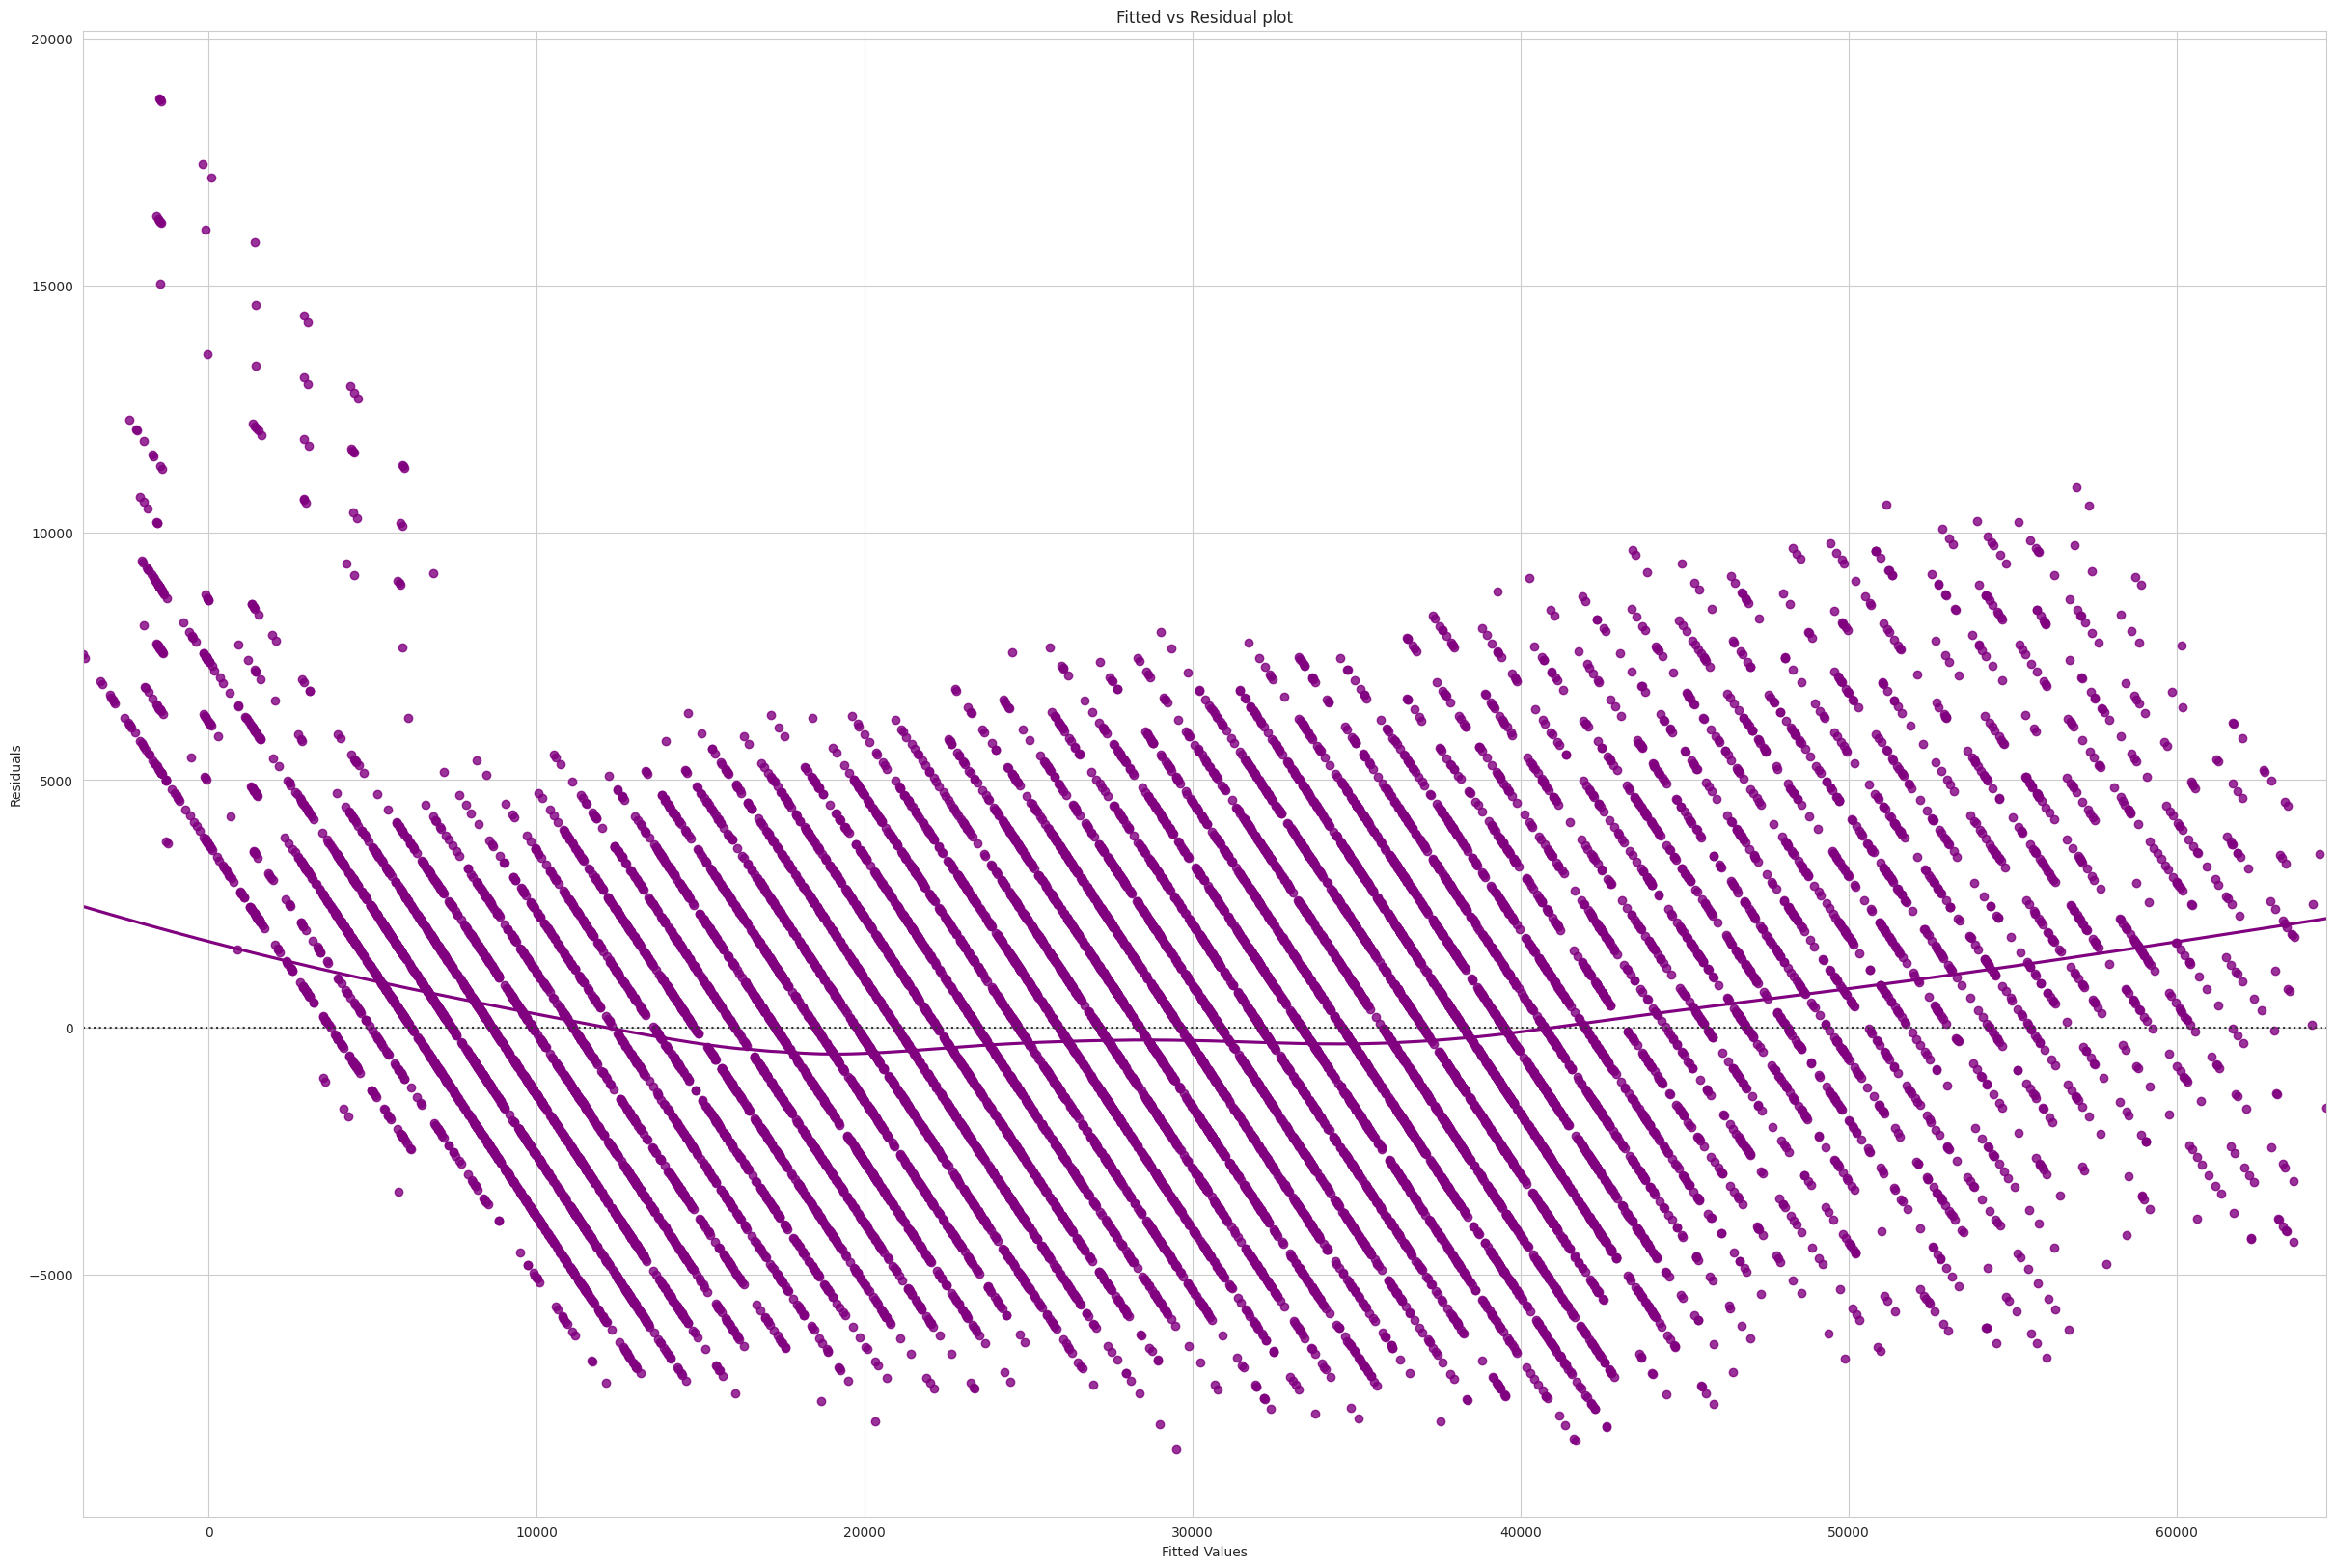

In [198]:
# let us plot the fitted values vs residuals
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred,x="Fitted Values",y="Residuals",color="purple",lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### The plot is not showing any non-linear pattern and the curve is almost straight.

#### This is the test for linearity between residuals and fitted values. This is the first assumption of linear regression.

<Figure size 2000x2000 with 0 Axes>

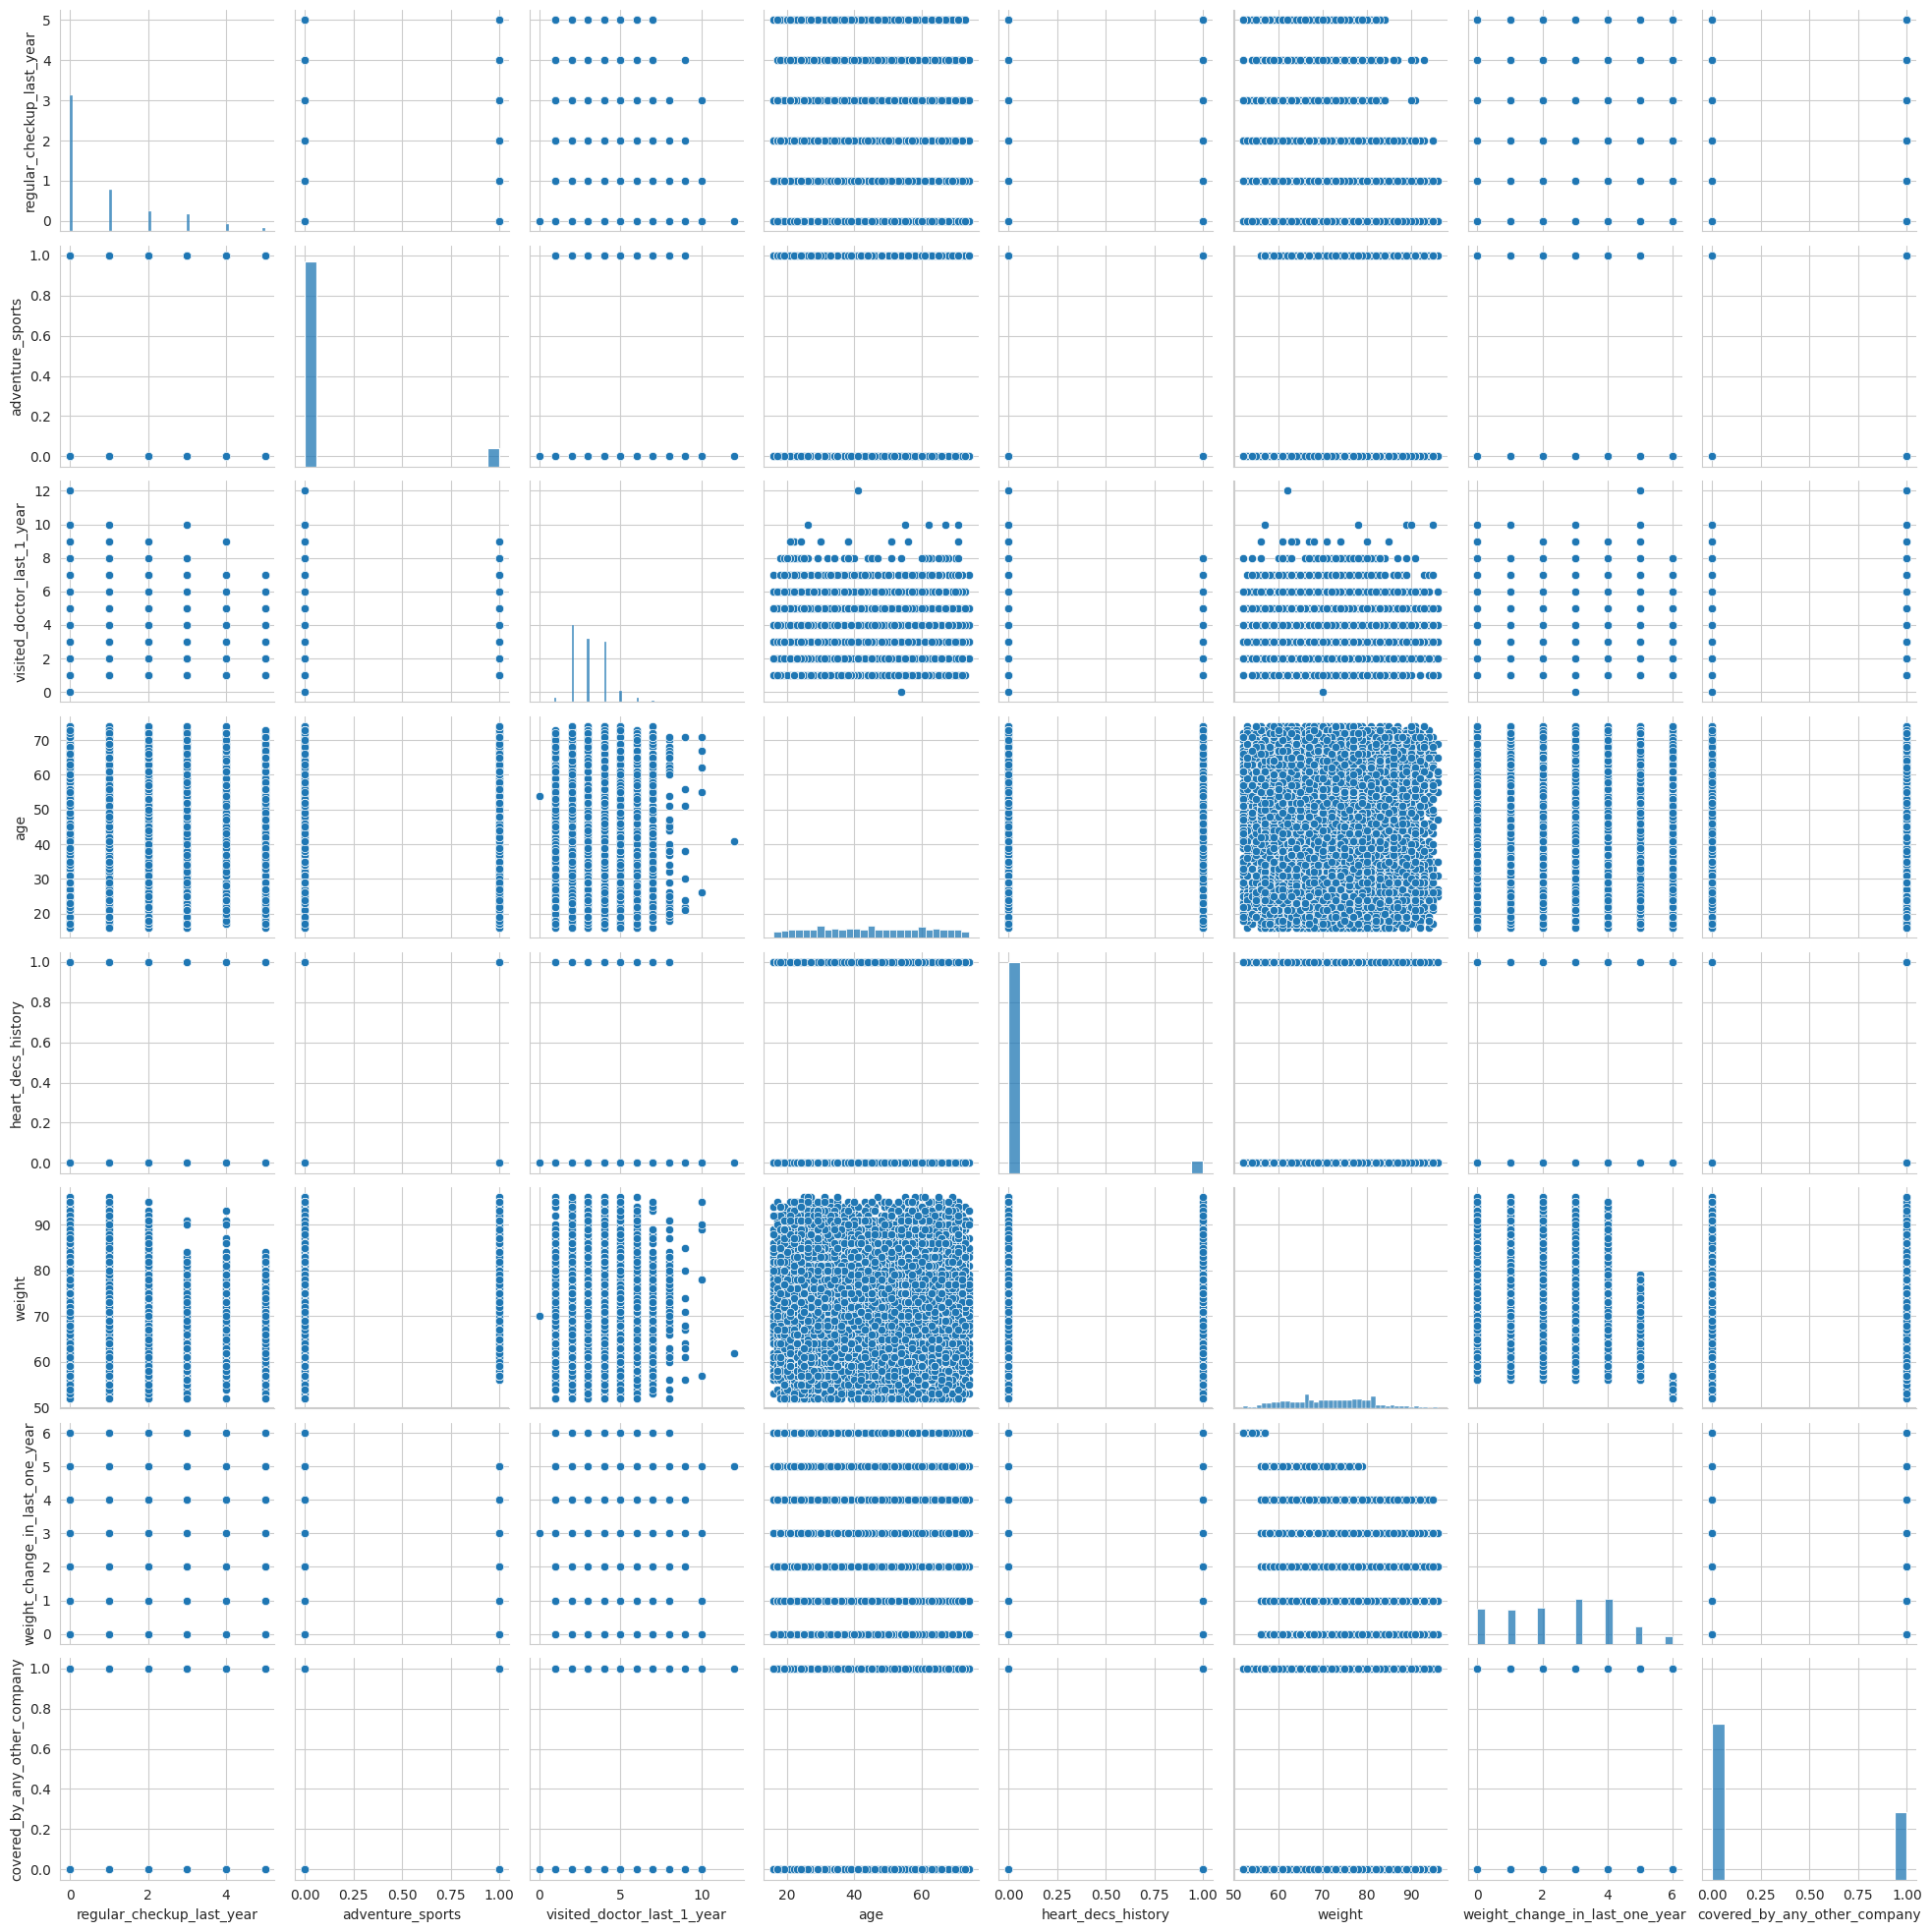

In [199]:
### checking for any non-linear pattern present
plt.figure(figsize=(20,20))
pairplot_train19=X_train_19.drop(['const'],axis=1)
sns.pairplot(data=pairplot_train19);

#### No non-linear pattern present

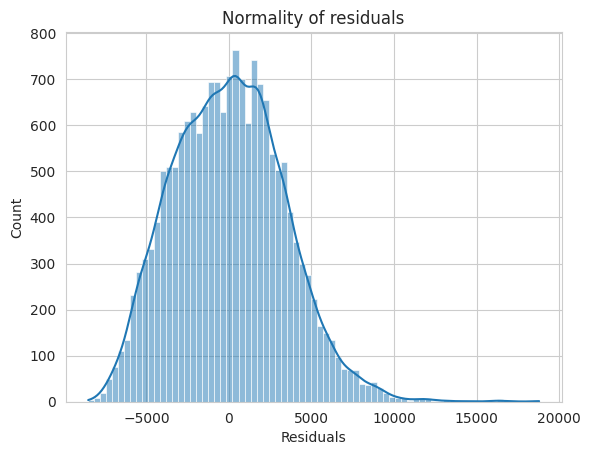

In [200]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals");

#### The distribution of residuals is normal with skewness on the right.

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

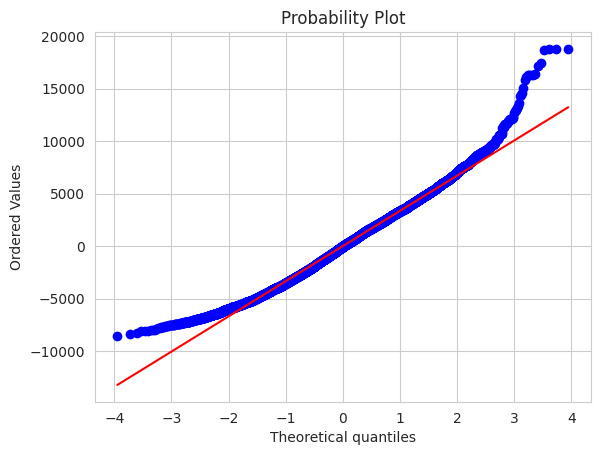

In [201]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

#### Most of the points are on the straight line of the QQ plot.

In [202]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [203]:
name=["F statistic","p-value"]
test=sms.het_goldfeldquandt(df_pred["Residuals"],X_train_19.astype(('float')))
lzip(name,test)

[('F statistic', 1.0086457698965705), ('p-value', 0.34369057487401594)]

###### The null and alternate hypotheses of the goldfeldquandt test are as follows:

###### Null hypothesis : Residuals are homoscedastic
###### Alternate hypothesis : Residuals have hetroscedasticity

#### The p-value is more than 0.05, hence the residuals are homoscedastic.

In [204]:
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:27:59   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insert Inferences from the Coef here

In [205]:
olsres_19.params

const                            -79954.550831
regular_checkup_last_year          -448.068404
adventure_sports                    197.800282
visited_doctor_last_1_year          -56.365366
age                                   3.764978
heart_decs_history                  286.235819
weight                             1488.984417
weight_change_in_last_one_year      163.825331
covered_by_any_other_company       1243.084316
dtype: float64

In [206]:
# Let us write the equation of linear regression
Equation="insurance cost ="
print(Equation,end=" ")
for i in range(len(X_train_19.columns)):
    if i == 0:
        print(olsres_19.params[i], "+", end=" ")
    elif i != len(X_train_19.columns) - 1:
        print(
            olsres_19.params[i],
            "* (",
            X_train_19.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_19.params[i], "* (", X_train_19.columns[i], ")")

insurance cost = -79954.5508306181 + -448.06840434262267 * ( regular_checkup_last_year ) +  197.80028245712333 * ( adventure_sports ) +  -56.365366059930345 * ( visited_doctor_last_1_year ) +  3.7649780876247 * ( age ) +  286.23581898771937 * ( heart_decs_history ) +  1488.9844167405122 * ( weight ) +  163.82533141422576 * ( weight_change_in_last_one_year ) +  1243.0843158180267 * ( covered_by_any_other_company )


insurance cost = -79954.55083061793 + -448.06840434262756 * ( regular_checkup_last_year ) +  197.80028245711242 * ( adventure_sports ) +  -56.3653660599313 * ( visited_doctor_last_1_year ) +  3.764978087623719 * ( age ) +  286.2358189877085 * ( heart_decs_history ) +  1488.9844167405124 * ( weight ) +  163.82533141421987 * ( weight_change_in_last_one_year ) +  1243.0843158180355 * ( covered_by_any_other_company )

In [207]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [208]:
X_test_1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Salaried',
       'occupation_Student', 'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [209]:
X_test_2=X_test_1.drop(['alcohol_intake','zone_North','other_major_decs_history','fat_percentage','exercise_frequency','daily_avg_steps','zone_East','avg_glucose_level','gender_Female','smoking_status_formerly smoked','smoking_status_Unknown','smoking_status_never smoked','years_of_insurance_with_us','zone_South','occupation_Student','cholesterol_level','bmi','occupation_Salaried'],
              axis=1)

In [210]:
X_test_2.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [211]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [212]:
y_pred=olsres_19.predict(X_test_2)

In [213]:
y_pred_train=olsres_19.predict(X_train_19)

In [214]:
# let's check the RMSE on the train data
rmse1=np.sqrt(mean_squared_error(y_train,df_pred["Fitted Values"]))
rmse1

3368.411445263934

In [215]:
# let's check the RMSE on the test data
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))
rmse2

3374.4577210832717

In [216]:
mape1=mean_absolute_percentage_error(y_train,df_pred["Fitted Values"])
mape1

0.1518031323149391

In [217]:
mape2=mean_absolute_percentage_error(y_test,y_pred)
mape2

0.1553824698033414

In [218]:
olsres_19.rsquared

0.9448079307698716

#### RIDGE, LASSO, ELASTIC NET

In [219]:
import sklearn
from sklearn.linear_model import ElasticNet,Ridge,Lasso

In [220]:
### ridge on X_train_1
ridge=Ridge(alpha=10)
ridge_1=ridge.fit(X_train_1,y_train)

In [221]:
# train
y_pred_ridge_1_train=ridge_1.predict(X_train_1)

In [222]:
# train
y_pred_ridge_1_train

array([[55443.92727185],
       [35181.97657164],
       [34502.80815895],
       ...,
       [28981.35019217],
       [32622.08355818],
       [31778.62939276]])

In [223]:
# test
y_pred_ridge_1=ridge_1.predict(X_test_1)

In [224]:
# test
y_pred_ridge_1

array([[ 7025.12766267],
       [18733.48029103],
       [14366.35549252],
       ...,
       [ 5633.74887819],
       [ 7106.07112338],
       [17951.83387405]])

In [225]:
ridge_1.coef_

array([[ 0.00000000e+00, -1.06934383e+01, -4.49140012e+02,
         2.02116923e+02, -5.61931898e+01, -7.71168213e-03,
         3.77012678e+00,  2.93436818e+02,  2.21111535e+01,
         1.78081450e-01, -4.91803695e+00,  1.48892279e+03,
         1.63942719e+02, -9.14028153e-01,  3.40113703e+01,
         1.25554696e+03, -3.07211944e+00, -1.22543156e+01,
         1.45050753e+02,  7.63378454e+01, -3.01653210e+01,
         8.83933209e+01,  6.79999149e+01,  1.00601621e+02,
        -1.88261129e+01,  9.79515466e+00,  6.74830205e+01]])

In [226]:
ridge_1.intercept_

array([-79922.71988496])

In [227]:
# test
rmse1_ridge_1=np.sqrt(mean_squared_error(y_test,y_pred_ridge_1))
rmse1_ridge_1

3375.9462923169926

In [228]:
# train
rmse2_ridge_1=np.sqrt(mean_squared_error(y_train,y_pred_ridge_1_train))
rmse2_ridge_1

3367.196507029226

In [229]:
# test
mape1_ridge_1=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_ridge_1))
mape1_ridge_1

0.3942773760394959

In [230]:
# train
mape2_ridge_1=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_ridge_1_train))
mape2_ridge_1

0.3894731113943453

In [231]:
# test
r2_ridge_1=ridge_1.score(X_test_1,y_test)
r2_ridge_1

0.9441824552260321

In [232]:
# train
rsq2_ridge_1=ridge_1.score(X_train_1,y_train)
rsq2_ridge_1

0.9448477375828838

In [233]:
### ridge on X_train_19
ridge=Ridge(alpha=10)
ridge_19=ridge.fit(X_train_19,y_train)

In [234]:
# test pred
y_pred_ridge_19=ridge_19.predict(X_test_2)

In [235]:
# test pred
y_pred_ridge_19

array([[ 7067.40982984],
       [18730.40322163],
       [14272.95883041],
       ...,
       [ 5671.8827426 ],
       [ 7045.19463298],
       [18074.15590571]])

In [236]:
# train
mse2_ridge_1=mean_squared_error(y_train,y_pred_ridge_1_train)
mse2_ridge_1

11338012.31694982

In [237]:
# train pred
y_pred_ridge_19_train=ridge_19.predict(X_train_19)

# train pred
y_pred_ridge_19_train

array([[55433.03211893],
       [35156.42521792],
       [34414.83996418],
       ...,
       [29067.39048115],
       [32511.29981014],
       [31952.4961263 ]])

In [238]:
ridge_19.coef_

array([[   0.        , -447.85699033,  196.3797486 ,  -56.3209287 ,
           3.76517217,  283.18530299, 1488.98696366,  163.72907954,
        1239.70418821]])

In [239]:
X_test_2.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [240]:
ridge_19.intercept_

array([-79953.49828821])

In [241]:
# test
mse1_ridge_19=mean_squared_error(y_test,y_pred_ridge_19)
mse1_ridge_19

11386596.064704217

In [242]:
# train
mse2_ridge_19=mean_squared_error(y_train,y_pred_ridge_19_train)
mse2_ridge_19

11346198.774491291

In [243]:
# test
mape1_ridge_19=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_ridge_19))
mape1_ridge_19

0.39417544983869823

In [244]:
# train
mape2_ridge_19=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_ridge_19_train))
mape2_ridge_19

0.3896139011012958

In [245]:
# test
rmse1_ridge_19=np.sqrt(mean_squared_error(y_test,y_pred_ridge_19))
rmse1_ridge_19

3374.403067907599

In [246]:
# train
rmse2_ridge_19=np.sqrt(mean_squared_error(y_train,y_pred_ridge_19_train))
rmse2_ridge_19

3368.4119068919244

In [247]:
# test
r2_ridge_19=ridge_19.score(X_test_2,y_test)
r2_ridge_19

0.9442334745859569

In [248]:
# train
rsq2_ridge_19=ridge_19.score(X_train_19,y_train)
rsq2_ridge_19

0.9448079156421438

Lasso regression:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [249]:
### lasso on train_1
lasso=Lasso(alpha=10)
lasso_1=lasso.fit(X_train_1,y_train)

In [250]:
# test
y_pred_lasso_1=lasso_1.predict(X_test_1)

In [251]:
# test
y_pred_lasso_1

array([ 7086.18370554, 18733.11439016, 14364.60073656, ...,
        5689.48070865,  6998.21996531, 17867.9360447 ])

In [252]:
# train
y_pred_lasso_1_train=lasso_1.predict(X_train_1)

In [253]:
# train
y_pred_lasso_1_train

array([55354.0738756 , 35211.78876148, 34467.62991845, ...,
       28940.82016512, 32558.32973693, 31901.71056915])

In [254]:
# test
mse1_lasso_1=mean_squared_error(y_test,y_pred_lasso_1)
mse1_lasso_1

11379997.08194143

In [255]:
# train
mse2_lasso_1=mean_squared_error(y_train,y_pred_lasso_1_train)
mse2_lasso_1

11345819.141992617

In [256]:
# test
mape1_lasso_1=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_lasso_1))
mape1_lasso_1

0.393995007999088

In [257]:
# train
mape2_lasso_1=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_lasso_1_train))
mape2_lasso_1

0.3895283196236599

In [258]:
# test
rmse1_lasso_1=np.sqrt(mean_squared_error(y_test,y_pred_lasso_1))
rmse1_lasso_1

3373.425126179834

In [259]:
# train
rmse2_lasso_1=np.sqrt(mean_squared_error(y_train,y_pred_lasso_1_train))
rmse2_lasso_1

3368.355554568522

In [260]:
# test
r2_lasso_1=lasso_1.score(X_test_1,y_test)
r2_lasso_1

0.9442657934930171

In [261]:
# train
rsq2_lasso_1=lasso_1.score(X_train_1,y_train)
rsq2_lasso_1

0.9448097623142592

In [262]:
lasso_1.coef_

array([ 0.00000000e+00, -7.03933068e+00, -4.40538551e+02,  6.71250394e+01,
       -4.89128428e+01, -3.71781079e-03,  3.69971267e+00,  1.01795601e+02,
        0.00000000e+00,  1.61532873e-01, -3.91804221e+00,  1.48909814e+03,
        1.59448617e+02, -1.61260125e+00,  1.68868398e+01,  1.20612206e+03,
        0.00000000e+00, -0.00000000e+00,  4.39585163e+01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.15581920e+00])

In [263]:
lasso_1.intercept_

array([-79803.44558155])

Checkpoint

In [264]:
### lasso on X_train_19
lasso=Lasso(alpha=10)
lasso_19=lasso.fit(X_train_19,y_train)

In [265]:
# test
y_pred_lasso_19=lasso_19.predict(X_test_2)

In [266]:
# test
y_pred_lasso_19

array([ 7114.05523773, 18758.49802801, 14306.02545148, ...,
        5682.00085727,  7006.93552663, 17976.31239259])

In [267]:
# train
y_pred_lasso_19_train=lasso_19.predict(X_train_19)

In [268]:
# train
y_pred_lasso_19_train

array([55433.53206828, 35190.15943127, 34457.97499403, ...,
       28965.82395772, 32523.0567416 , 31986.62767069])

In [269]:
# test
mse1_lasso_19=mean_squared_error(y_test,y_pred_lasso_19)
mse1_lasso_19

11378999.352129623

In [270]:
# train
mse2_lasso_19=mean_squared_error(y_train,y_pred_lasso_19_train)
mse2_lasso_19

11350110.307123758

In [271]:
# test
mape1_lasso_19=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_lasso_19))
mape1_lasso_19

0.39401008773144536

In [272]:
# train
mape2_lasso_19=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_lasso_19_train))
mape2_lasso_19

0.38960013976585545

In [273]:
# test
rmse1_lasso_19=np.sqrt(mean_squared_error(y_test,y_pred_lasso_19))
rmse1_lasso_19

3373.27724210887

In [274]:
# train
rmse2_lasso_19=np.sqrt(mean_squared_error(y_train,y_pred_lasso_19_train))
rmse2_lasso_19

3368.992476560872

In [275]:
# test
r2_lasso_19=lasso_19.score(X_test_2,y_test)
r2_lasso_19

0.9442706799335819

In [276]:
# train
rsq2_lasso_19=lasso_19.score(X_train_19,y_train)
rsq2_lasso_19

0.9447888885086244

In [277]:
lasso_19.coef_

array([   0.        , -440.12190507,   65.09227556,  -48.23410202,
          3.7083304 ,   95.78353249, 1489.1095878 ,  159.0233259 ,
       1195.57798665])

In [278]:
lasso_19.intercept_

array([-79944.53724904])

Elastic Net:
**1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2**

In [279]:
from sklearn.model_selection import GridSearchCV

In [280]:
param_grid4={
    'alpha':[0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]
}

In [281]:
r_enet=ElasticNet()
grid_search4=GridSearchCV(r_enet,param_grid4,cv=5,scoring='neg_mean_squared_error')

In [282]:
grid_search4.fit(X_train_1,y_train)
grid_search4.best_params_

{'alpha': 0.01, 'l1_ratio': 0.3}

In [283]:
### Elastic Net on X_train_1
enet=ElasticNet(alpha=0.01,l1_ratio=0.3)
enet_1=enet.fit(X_train_1,y_train)

In [284]:
enet_1.coef_

array([ 0.00000000e+00, -8.84535533e+00, -4.46786464e+02,  1.86533568e+02,
       -5.57433987e+01, -7.43678284e-03,  3.76978948e+00,  2.61093333e+02,
        2.24763644e+01,  1.78286038e-01, -4.90737918e+00,  1.48896032e+03,
        1.62882901e+02, -9.85727906e-01,  3.29900480e+01,  1.21551994e+03,
       -2.34925913e+00, -1.20716063e+01,  1.36017604e+02,  6.97801540e+01,
       -2.96181936e+01,  7.57691849e+01,  5.68534909e+01,  8.90392247e+01,
       -1.99914723e+01,  7.71675444e+00,  6.37260002e+01])

In [285]:
enet_1.intercept_

array([-79900.66761258])

In [286]:
# test
y_pred_enet_1=enet_1.predict(X_test_1)
y_pred_enet_1

array([ 7040.15394154, 18747.15573048, 14338.42003248, ...,
        5646.81394978,  7069.45810214, 17955.70418799])

In [287]:
# train
y_pred_enet_1_train=enet_1.predict(X_train_1)
y_pred_enet_1_train

array([55421.83441147, 35199.29903995, 34519.94115162, ...,
       28987.95628707, 32626.89206324, 31801.00234827])

In [288]:
# test
mse1_enet_1=mean_squared_error(y_test,y_pred_enet_1)
mse1_enet_1

11392316.695561059

In [289]:
# train
mse2_enet_1=mean_squared_error(y_train,y_pred_enet_1_train)
mse2_enet_1

11338512.942427382

In [290]:
# test
mape1_enet_1=mean_absolute_percentage_error(y_test,y_pred_enet_1)
mape1_enet_1

0.15535466328264258

In [291]:
# train
mape2_enet_1=mean_absolute_percentage_error(y_train,y_pred_enet_1_train)
mape2_enet_1

0.15165013481016568

In [292]:
# test
rmse1_enet_1=np.sqrt(mean_squared_error(y_test,y_pred_enet_1))
rmse1_enet_1

3375.250612259934

In [293]:
# train
rmse2_enet_1=np.sqrt(mean_squared_error(y_train,y_pred_enet_1_train))
rmse2_enet_1

3367.270844827808

In [294]:
# test
r2_enet_1=enet_1.score(X_test_1,y_test)
r2_enet_1

0.9442054574591308

In [295]:
# train
rsq2_enet_1=enet_1.score(X_train_1,y_train)
rsq2_enet_1

0.9448453023564137

In [296]:
#df_new.to_csv("df_new.csv")
#X_train_19.to_csv("X_train_19.csv")
#X_test_2.to_csv("X_test_2.csv")

In [297]:
### Elastic Net on X_train_19
enet=ElasticNet(alpha=0.01,l1_ratio=0.3)
enet_19=enet.fit(X_train_19,y_train)

In [298]:
# test
y_pred_enet_19=enet_19.predict(X_test_2)
y_pred_enet_19

array([ 7085.76494919, 18742.9836971 , 14255.23482807, ...,
        5681.61073178,  7017.01058903, 18075.06889053])

In [299]:
# train
y_pred_enet_19_train=enet_19.predict(X_train_19)
y_pred_enet_19_train

array([55410.85299198, 35168.64584299, 34431.02696181, ...,
       29065.55556785, 32521.46151757, 31966.33571604])

In [300]:
enet_19.coef_



array([   0.        , -445.51138806,  181.69209384,  -55.82806309,
          3.76759931,  252.85730361, 1489.00971071,  162.66498017,
       1202.87567155])

In [301]:
enet_19.intercept_

array([-79941.93213428])

In [302]:
# test
mse1_enet_19=mean_squared_error(y_test,y_pred_enet_19)
mse1_enet_19

11383037.193174666

In [303]:
# train
mse2_enet_19=mean_squared_error(y_train,y_pred_enet_19_train)
mse2_enet_19

11346623.317132981

In [304]:
# test
mape1_enet_19=mean_absolute_percentage_error(y_test,y_pred_enet_19)
mape1_enet_19

0.1552869173057495

In [305]:
# train
mape2_enet_19=mean_absolute_percentage_error(y_train,y_pred_enet_19_train)
mape2_enet_19

0.15175539351289224

In [306]:
# test
rmse1_enet_19=np.sqrt(mean_squared_error(y_test,y_pred_enet_19))
rmse1_enet_19

3373.8756932013166

In [307]:
# train
rmse2_enet_19=np.sqrt(mean_squared_error(y_train,y_pred_enet_19_train))
rmse2_enet_19

3368.474924521924

In [308]:
# test
r2_enet_19=enet_19.score(X_test_2,y_test)
r2_enet_19

0.9442509043690518

In [309]:
# train
rsq2_enet_19=enet_19.score(X_train_19,y_train)
rsq2_enet_19

0.9448058505105734

### ENSEMBLE ORIGINAL

In [310]:
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor

In [311]:
param_grid5 = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators': [50, 100, 120],
    'learning_rate': [0.1, 0.5],
}
r_gbr = GradientBoostingRegressor()
grid_search5 = GridSearchCV(r_gbr, param_grid5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [312]:
grid_search5.fit(X_train_19, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [50, 100, 120]},
             scoring='neg_mean_squared_error')

In [313]:
grid_search5.best_params_

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}

In [314]:
# X_train_19 BOOSTING
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
gbr19=GradientBoostingRegressor(loss='huber',n_estimators=100,random_state=42)
gbr19=gbr19.fit(X_train_19,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [315]:
# test
y_pred_gbr_19=gbr19.predict(X_test_2)
y_pred_gbr_19

array([ 7534.29750663, 18382.6211019 , 13539.32302349, ...,
        7064.5071078 ,  7500.84945666, 18087.2209096 ])

In [316]:
X_train_19_=X_train_19.drop('const',axis=1)

In [317]:
gbr19.feature_importances_[1:]

array([1.51052835e-03, 4.82252481e-05, 8.48023538e-05, 2.22432500e-04,
       2.83903387e-05, 9.95486667e-01, 5.10875678e-04, 2.10807891e-03])

In [318]:
fi_df=pd.DataFrame(gbr19.feature_importances_[1:],columns=["Imp"],index=X_train_19_.columns)
fi_df

Imp
regular_checkup_last_year       0.001511
adventure_sports                0.000048
visited_doctor_last_1_year      0.000085
age                             0.000222
heart_decs_history              0.000028
weight                          0.995487
weight_change_in_last_one_year  0.000511
covered_by_any_other_company    0.002108

In [319]:
fi_df.sort_values(by='Imp',ascending=False)

Imp
weight                          0.995487
covered_by_any_other_company    0.002108
regular_checkup_last_year       0.001511
weight_change_in_last_one_year  0.000511
age                             0.000222
visited_doctor_last_1_year      0.000085
adventure_sports                0.000048
heart_decs_history              0.000028

In [320]:
gbr19.feature_importances_

array([0.00000000e+00, 1.51052835e-03, 4.82252481e-05, 8.48023538e-05,
       2.22432500e-04, 2.83903387e-05, 9.95486667e-01, 5.10875678e-04,
       2.10807891e-03])

In [321]:
# train
y_pred_gbr_19_train=gbr19.predict(X_train_19)
y_pred_gbr_19_train

array([58778.47202577, 35040.29006372, 34486.67686005, ...,
       28381.46021851, 31610.76854051, 31557.45587715])

In [322]:
# test
mape1_gbr_19=mean_absolute_percentage_error(y_test,y_pred_gbr_19)
mape1_gbr_19

0.1212865996624879

In [323]:
# train
mape2_gbr_19=mean_absolute_percentage_error(y_train,y_pred_gbr_19_train)
mape2_gbr_19

0.12060962479031935

In [324]:
# test
rmse1_gbr_19=np.sqrt(mean_squared_error(y_test,y_pred_gbr_19))
rmse1_gbr_19

3025.526821160601

In [325]:
# train
rmse2_gbr_19=np.sqrt(mean_squared_error(y_train,y_pred_gbr_19_train))
rmse2_gbr_19

3012.8535109311483

In [326]:
# test
r2_gbr_19=gbr19.score(X_test_2,y_test)
r2_gbr_19

0.9551686634832128

In [327]:
# train
rsq2_gbr_19=gbr19.score(X_train_19,y_train)
rsq2_gbr_19

0.9558447406068408

##### GridSearch Bagging

In [328]:
param_grid6 = {
    'n_estimators': [50, 100, 150],
#    'max_samples': [0.5, 0.7, 1.0],
    'bootstrap_features': [True,False],
    'max_features': [3, 4, 5, 7],
}
r_br = BaggingRegressor()
grid_search6 = GridSearchCV(r_br, param_grid6, cv=5, scoring='neg_mean_squared_error')

In [329]:
grid_search6.fit(X_train_19,np.ravel(y_train,order='C'))
grid_search6.best_params_

{'bootstrap_features': False, 'max_features': 7, 'n_estimators': 50}

In [330]:
# X_train_19 BAGGING
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
br19=BaggingRegressor(n_estimators=150,random_state=42)
br19=br19.fit(X_train_19,np.ravel(y_train,order='C'))

In [331]:
# test
y_pred_br_19=br19.predict(X_test_2)
y_pred_br_19

array([ 6293.4       , 18863.74666667, 13080.4       , ...,
        7486.26666667,  6842.94133333, 19554.78666667])

In [332]:
# train
y_pred_br_19_train=br19.predict(X_train_19)
y_pred_br_19_train

array([56624.14666667, 37738.46222222, 35358.89888889, ...,
       30529.16      , 30262.47888889, 30113.71333333])

In [333]:
# test
mape1_br_19=mean_absolute_percentage_error(y_test,y_pred_br_19)
mape1_br_19

0.13111995719902136

In [334]:
# train
mape2_br_19=mean_absolute_percentage_error(y_train,y_pred_br_19_train)
mape2_br_19

0.052436322186272886

In [335]:
# test
rmse1_br_19=np.sqrt(mean_squared_error(y_test,y_pred_br_19))
rmse1_br_19

3320.4066251004283

In [336]:
# train
rmse2_br_19=np.sqrt(mean_squared_error(y_train,y_pred_br_19_train))
rmse2_br_19

1355.2395582372244

In [337]:
# test
r2_br_19=br19.score(X_test_2,y_test)
r2_br_19

0.946003922107294

In [338]:
# train
rsq2_br_19=br19.score(X_train_19,y_train)
rsq2_br_19

0.9910657408069237

In [339]:
X.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Salaried',
       'occupation_Student', 'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [340]:
X.isnull().sum()

const                             0
years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
cholesterol_level                 0
covered_by_any_other_company      0
alcohol_intake                    0
exercise_frequency                0
occupation_Salaried               0
occupation_Student                0
gender_Female                     0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
zone_East                         0
zone_North                        0
zone_South                        0
dtype: int64

In [341]:
X.describe()

const  years_of_insurance_with_us  regular_checkup_last_year  \
count  25000.0                25000.000000               25000.000000   
mean       1.0                    4.089040                   0.773680   
std        0.0                    2.606612                   1.199449   
min        1.0                    0.000000                   0.000000   
25%        1.0                    2.000000                   0.000000   
50%        1.0                    4.000000                   0.000000   
75%        1.0                    6.000000                   1.000000   
max        1.0                    8.000000                   5.000000   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  \
count      25000.000000                25000.000000     25000.000000   
mean           0.081720                    3.104200      5215.889320   
std            0.273943                    1.141663      1053.179748   
min            0.000000                    0.000000      2034.000000   
25%            0.000000                    2.000000      4543.000000   
50%            0.000000                    3.000000      5089.000000   
75%            0.000000                    4.000000      5730.000000   
max            1.000000                   12.000000     11255.000000   

                age  heart_decs_history  other_major_decs_history  \
count  25000.000000        25000.000000              25000.000000   
mean      44.918320            0.054640                  0.098160   
std       16.107492            0.227281                  0.297537   
min       16.000000            0.000000                  0.000000   
25%       31.000000            0.000000                  0.000000   
50%       45.000000            0.000000                  0.000000   
75%       59.000000            0.000000                  0.000000   
max       74.000000            1.000000                  1.000000   

       avg_glucose_level  ...  exercise_frequency  occupation_Salaried  \
count       25000.000000  ...        25000.000000         25000.000000   
mean          167.530000  ...            1.005360             0.192440   
std            62.729712  ...            0.643792             0.394225   
min            57.000000  ...            0.000000             0.000000   
25%           113.000000  ...            1.000000             0.000000   
50%           168.000000  ...            1.000000             0.000000   
75%           222.000000  ...            1.000000             0.000000   
max           277.000000  ...            2.000000             1.000000   

       occupation_Student  gender_Female  smoking_status_Unknown  \
count        25000.000000   25000.000000            25000.000000   
mean             0.406760       0.343120                0.302200   
std              0.491239       0.474761                0.459221   
min              0.000000       0.000000                0.000000   
25%              0.000000       0.000000                0.000000   
50%              0.000000       0.000000                0.000000   
75%              1.000000       1.000000                1.000000   
max              1.000000       1.000000                1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    25000.000000                 25000.000000   
mean                         0.173160                     0.369960   
std                          0.378393                     0.482803   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

          zone_East    zone_North    zone_South  
count  25000.000000  25000.000000  25000.000000  
mean       0.199840      0.334560      0.204320  
std        0.399888

In [342]:
X.duplicated().sum()

0

In [343]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 4913 to 23654
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           17500 non-null  float64
 1   years_of_insurance_with_us      17500 non-null  int64  
 2   regular_checkup_last_year       17500 non-null  int64  
 3   adventure_sports                17500 non-null  int64  
 4   visited_doctor_last_1_year      17500 non-null  int64  
 5   daily_avg_steps                 17500 non-null  int64  
 6   age                             17500 non-null  int64  
 7   heart_decs_history              17500 non-null  int64  
 8   other_major_decs_history        17500 non-null  int64  
 9   avg_glucose_level               17500 non-null  int64  
 10  bmi                             17500 non-null  float64
 11  weight                          17500 non-null  int64  
 12  weight_change_in_last_one_yea

In [344]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6868 to 4731
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           7500 non-null   float64
 1   years_of_insurance_with_us      7500 non-null   int64  
 2   regular_checkup_last_year       7500 non-null   int64  
 3   adventure_sports                7500 non-null   int64  
 4   visited_doctor_last_1_year      7500 non-null   int64  
 5   daily_avg_steps                 7500 non-null   int64  
 6   age                             7500 non-null   int64  
 7   heart_decs_history              7500 non-null   int64  
 8   other_major_decs_history        7500 non-null   int64  
 9   avg_glucose_level               7500 non-null   int64  
 10  bmi                             7500 non-null   float64
 11  weight                          7500 non-null   int64  
 12  weight_change_in_last_one_year 

In [345]:
y_train

insurance_cost
4913            55530
9338            38254
24211           35786
18791           20978
16066           33318
...               ...
21575           32084
5390            24680
860             32084
15795           28382
23654           27148

[17500 rows x 1 columns]

In [346]:
y_test

insurance_cost
6868             7404
24016           20978
9668            13574
13640           38254
14018           20978
...               ...
21156            8638
24654           34552
14592            8638
20160            7404
4731            22212

[7500 rows x 1 columns]

In [347]:
#X_train=X_train_1.drop('weight',axis=1)
#X_test=X_test_1.drop('weight',axis=1)

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [349]:
param_grid_6 = {
#    'base_estimator': [None,LinearRegression(),KNeighborsRegressor()],
    'n_estimators': [10, 20, 50],
    'max_samples': [0.3, 0.5, 0.7],
    'bootstrap_features': [True,False],
    'max_features': [0.5, 0.7, 1.0],
    'warm_start': [True,False],
    'bootstrap': [True,False],
}

In [350]:
br = BaggingRegressor()
grid_search_6 = GridSearchCV(br, param_grid_6, cv=7, n_jobs=-1,verbose=3)

grid_search_6.fit(X_train_1,y_train)
grid_search_6.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.3,
 'n_estimators': 50,
 'warm_start': False}

In [351]:
obr=BaggingRegressor(n_estimators=50,random_state=42,bootstrap_features=False,max_samples=0.3,max_features=1.0, warm_start=True)
obr=obr.fit(X_train_1,np.ravel(y_train,order='C'))

In [352]:
obr_ytrain_pred=obr.predict(X_train_1)
obr_ytrain_pred

array([57306.96, 35489.84, 35020.92, ..., 29319.84, 31220.2 , 31318.92])

In [353]:
obr_ytest_pred=obr.predict(X_test_1)
obr_ytest_pred

array([ 8243.12, 18534.68, 13919.52, ...,  7798.88,  7675.48, 17917.68])

In [354]:
r2train_obr=obr.score(X_train_1,y_train)
r2train_obr

0.9738112182852587

In [355]:
r2test_obr=obr.score(X_test_1,y_test)
r2test_obr

0.9537955390999242

In [356]:
obr

BaggingRegressor(max_samples=0.3, n_estimators=50, random_state=42,
                 warm_start=True)

In [357]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in obr.estimators_
], axis=0)

obr_fidf=pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train_1.columns)
obr_fidf.Imp.sort_values(ascending=False)

weight                            0.951763
daily_avg_steps                   0.005922
avg_glucose_level                 0.005603
bmi                               0.005367
age                               0.005093
fat_percentage                    0.003910
years_of_insurance_with_us        0.003037
regular_checkup_last_year         0.002680
weight_change_in_last_one_year    0.002589
covered_by_any_other_company      0.002295
visited_doctor_last_1_year        0.001752
cholesterol_level                 0.001432
exercise_frequency                0.001141
alcohol_intake                    0.001101
zone_North                        0.000644
smoking_status_never smoked       0.000638
zone_South                        0.000590
occupation_Student                0.000582
zone_East                         0.000580
gender_Female                     0.000579
smoking_status_Unknown            0.000542
smoking_status_formerly smoked    0.000529
other_major_decs_history          0.000448
occupation_

In [358]:
obr.score(X_train_1,y_train)

0.9738112182852587

In [359]:
obr.score(X_test_1,y_test)

0.9537955390999242

In [360]:
obr_mapetrain=mean_absolute_percentage_error(y_train,obr_ytrain_pred)
obr_mapetrain

0.09177813293822203

In [361]:
obr_mapetest=mean_absolute_percentage_error(y_test,obr_ytest_pred)
obr_mapetest

0.12247571189968734

In [362]:
obr_rmsetrain=np.sqrt(mean_squared_error(y_train,obr_ytrain_pred))
obr_rmsetrain

2320.301623432422

In [363]:
obr_rmsetest=np.sqrt(mean_squared_error(y_test,obr_ytest_pred))
obr_rmsetest

3071.5113029697154

In [364]:
obr_fidf=obr_fidf.Imp.sort_values(ascending=False)

In [365]:
obr_fidf

weight                            0.951763
daily_avg_steps                   0.005922
avg_glucose_level                 0.005603
bmi                               0.005367
age                               0.005093
fat_percentage                    0.003910
years_of_insurance_with_us        0.003037
regular_checkup_last_year         0.002680
weight_change_in_last_one_year    0.002589
covered_by_any_other_company      0.002295
visited_doctor_last_1_year        0.001752
cholesterol_level                 0.001432
exercise_frequency                0.001141
alcohol_intake                    0.001101
zone_North                        0.000644
smoking_status_never smoked       0.000638
zone_South                        0.000590
occupation_Student                0.000582
zone_East                         0.000580
gender_Female                     0.000579
smoking_status_Unknown            0.000542
smoking_status_formerly smoked    0.000529
other_major_decs_history          0.000448
occupation_

Elastic Net business insights

In [367]:
enet_coef=enet_19.coef_

In [373]:
enet_eq_X=X_train_19.drop('const',axis=1)

In [375]:
enet_eq_X.columns

Index(['regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [501]:
data = {'Feature': ['regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'weight',
       'weight_change_in_last_one_year'],
        'Coefficient': [-445.51,181.69,-55.83,3.77,1489,162.66],
        'starting_value':[1,1,1,18,40,1],
        'insurance_cost':[0,0,0,0,0,0]}
enet_viz_df=pd.DataFrame(data)

In [502]:
enet_viz_df

Feature  Coefficient  starting_value  insurance_cost
0       regular_checkup_last_year      -445.51               1               0
1                adventure_sports       181.69               1               0
2      visited_doctor_last_1_year       -55.83               1               0
3                             age         3.77              18               0
4                          weight      1489.00              40               0
5  weight_change_in_last_one_year       162.66               1               0

In [505]:
w_data={'insurance_cost':np.arange(1489*40,1489*81,1489),
      'weight':np.arange(40,81,1)
      }
weight_df=pd.DataFrame(w_data)

sns.scatterplot(data=weight_df,x='weight',y='insurance_cost');

In [506]:
weight_df.head()

insurance_cost  weight
0           59560      40
1           61049      41
2           62538      42
3           64027      43
4           65516      44

In [ ]:
color=sns.color_palette()

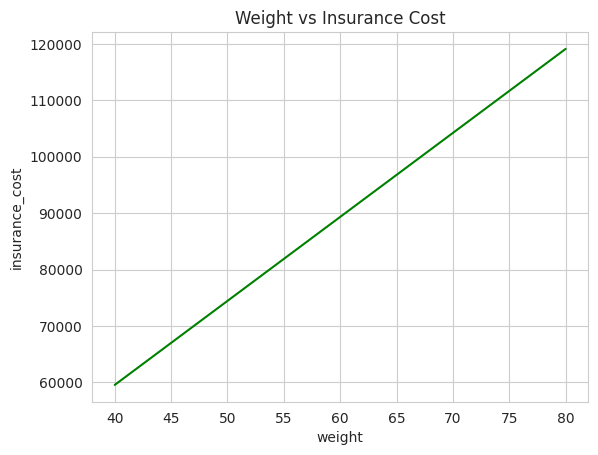

In [569]:
sns.lineplot(data=weight_df,x='weight',y='insurance_cost',color='green')
plt.title("Weight vs Insurance Cost");

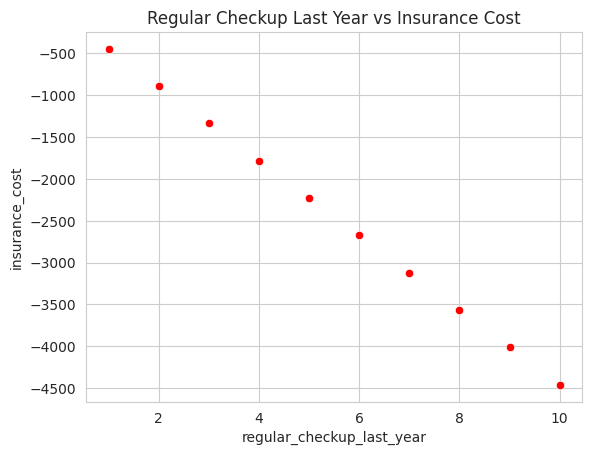

In [570]:
c_data={'insurance_cost':np.arange(-446,-446*11,-446),
      'regular_checkup_last_year':np.arange(1,11,1)
      }
checkup_df=pd.DataFrame(c_data)

sns.scatterplot(data=checkup_df,x='regular_checkup_last_year',y='insurance_cost',color='red')
plt.title("Regular Checkup Last Year vs Insurance Cost");

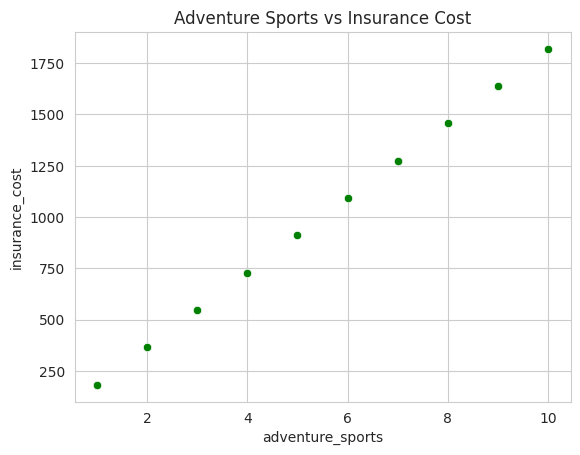

In [572]:
adv_data={'insurance_cost':np.arange(182,182*11,182),
      'adventure_sports':np.arange(1,11,1)
      }
adv_df=pd.DataFrame(adv_data)

sns.scatterplot(data=adv_df,x='adventure_sports',y='insurance_cost',color='green')
plt.title("Adventure Sports vs Insurance Cost");

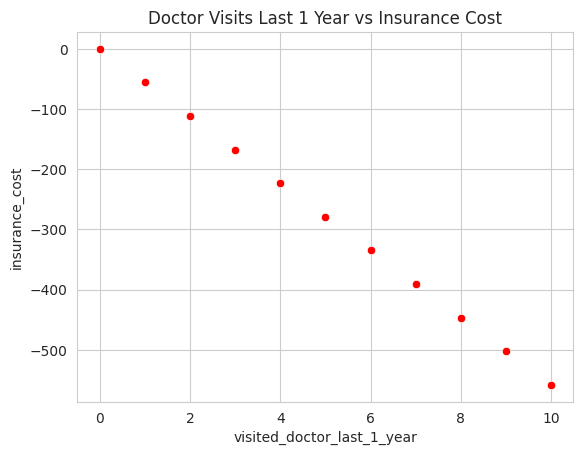

In [573]:
drv_data={'insurance_cost':np.arange(0,-55.83*11,-55.83),
      'visited_doctor_last_1_year':np.arange(0,11,1)
      }
drv_df=pd.DataFrame(drv_data)

sns.scatterplot(data=drv_df,x='visited_doctor_last_1_year',y='insurance_cost',color='red')
plt.title("Doctor Visits Last 1 Year vs Insurance Cost");

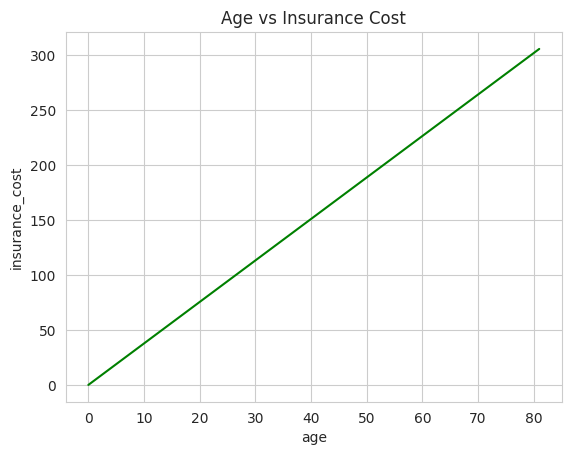

In [574]:
age_data={'insurance_cost':np.arange(0,3.77*82,3.77),
      'age':np.arange(0,82,1)
      }
age_df=pd.DataFrame(age_data)

sns.lineplot(data=age_df,x='age',y='insurance_cost',color='green')
plt.title("Age vs Insurance Cost");

In [543]:
enet_viz_df

Feature  Coefficient  starting_value  insurance_cost
0       regular_checkup_last_year      -445.51               1               0
1                adventure_sports       181.69               1               0
2      visited_doctor_last_1_year       -55.83               1               0
3                             age         3.77              18               0
4                          weight      1489.00              40               0
5  weight_change_in_last_one_year       162.66               1               0

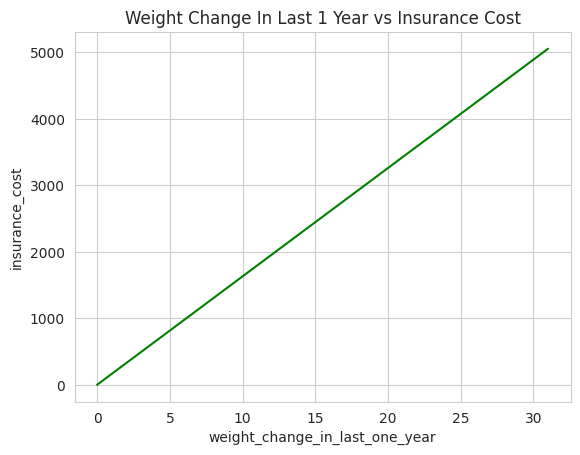

In [576]:
wc_data={'insurance_cost':np.arange(0,163*32,163),
      'weight_change_in_last_one_year':np.arange(0,32,1)
      }
wc_df=pd.DataFrame(wc_data)

sns.lineplot(data=wc_df,x='weight_change_in_last_one_year',y='insurance_cost',color='green')
plt.title("Weight Change In Last 1 Year vs Insurance Cost");

# END